# Analyzing my Amazon Halo Workout Data

I try to consolidate the number of times I have to import packages. Everything I need should be in the first code block.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings 
warnings.filterwarnings('ignore')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
from scipy import stats
sns.set()

rs = 123

I need to read my halo workout data in as a pandas dataframe

In [5]:
#amazon_data = pd.read_csv(r'C:\Users\coleb\OneDrive\Amazon Health Data 2\Activity\Activity_Workouts_1970-01-01--2022-06-03_1b219a29-93ce-467e-ad80-61b8d0868186.csv')

In [2]:
amazon_data = pd.read_csv(r'https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/Activity_Workouts_1970-01-01--2022-06-11_eaf57925-2a86-4062-ae48-8b7ec77167b6.csv')

In [3]:
amazon_data.head(5)

Start Time                  End Time Session Type  \
0  2022-06-10T21:25:00.000Z  2022-06-10T21:40:00.000Z      WORKOUT   
1  2022-06-10T16:57:16.288Z  2022-06-10T17:16:11.595Z      WORKOUT   
2  2022-06-10T12:34:13.628Z  2022-06-10T12:53:08.867Z      WORKOUT   
3  2022-06-10T11:30:31.296Z  2022-06-10T12:34:13.612Z      WORKOUT   
4  2022-06-08T04:11:34.259Z  2022-06-08T04:46:24.522Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset      Activity Score  \
0           OTHER       Automatic                    -5.0                 9.2   
1         WALKING       Automatic                    -5.0  0.7096625000000001   
2         WALKING       Automatic                    -5.0  17.822866666666666   
3         RUNNING       Automatic                    -5.0  123.25078666666667   
4         RUNNING       Automatic                    -5.0   58.17145083333333   

  Intense Duration (ms) Moderate Duration (ms)  Max Heart Rate (bpm)  \
0               No Data               540000.0                 118.0   
1               No Data                No Data                 105.0   
2               60000.0               946372.0                 142.0   
3             3600000.0               193612.0                 170.0   
4             1620000.0               240000.0                 140.0   

   Average Heart Rate (bpm)   Steps  Calories Software Version Software OS  \
0                     101.0   195.0      82.0       1.0.114475         ios   
1                      85.0  1140.0     112.0       1.0.114475         ios   
2                     116.0  1412.0     201.0       1.0.114475         ios   
3                     154.0  9843.0    1145.0       1.0.114475         ios   
4                     124.0  4611.0     457.0       1.0.114475         ios   

   Software OS Version  Active Time (ms)  Total Duration (ms)  Activity Pause  \
0                 15.6          900000.0             900000.0  Not Applicable   
1                 15.6         1135307.0            1135307.0  Not Applicable   
2                 15.6         1135239.0            1135239.0  Not Applicable   
3                 15.6         3822316.0            3822316.0  Not Applicable   
4                 15.6         2090263.0            2090263.0  Not Applicable   

  Session Source  
0    User Logged  
1    User Logged  
2    User Logged  
3    User Logged  
4    User Logged

In [6]:
#create a workable copy of the dataset
df = amazon_data
# df210 = df.groupby('Activity Score','Distance', 'Calories', 'Steps', 'Floors', 'Elevation Gain').count()
# df210.head(1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Start Time                299 non-null    object 
 1   End Time                  299 non-null    object 
 2   Session Type              299 non-null    object 
 3   Session Subtype           299 non-null    object 
 4   Creation Method           299 non-null    object 
 5   Local Time Zone Offset    299 non-null    float64
 6   Activity Score            299 non-null    object 
 7   Intense Duration (ms)     299 non-null    object 
 8   Moderate Duration (ms)    299 non-null    object 
 9   Max Heart Rate (bpm)      299 non-null    float64
 10  Average Heart Rate (bpm)  299 non-null    float64
 11  Steps                     299 non-null    float64
 12  Calories                  299 non-null    float64
 13  Software Version          299 non-null    object 
 14  Software O

In [8]:
df222 = df[df['Steps'] > 0]
df222.head(1)
df222.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Start Time                299 non-null    object 
 1   End Time                  299 non-null    object 
 2   Session Type              299 non-null    object 
 3   Session Subtype           299 non-null    object 
 4   Creation Method           299 non-null    object 
 5   Local Time Zone Offset    299 non-null    float64
 6   Activity Score            299 non-null    object 
 7   Intense Duration (ms)     299 non-null    object 
 8   Moderate Duration (ms)    299 non-null    object 
 9   Max Heart Rate (bpm)      299 non-null    float64
 10  Average Heart Rate (bpm)  299 non-null    float64
 11  Steps                     299 non-null    float64
 12  Calories                  299 non-null    float64
 13  Software Version          299 non-null    object 
 14  Software O

<AxesSubplot:xlabel='Start Time'>

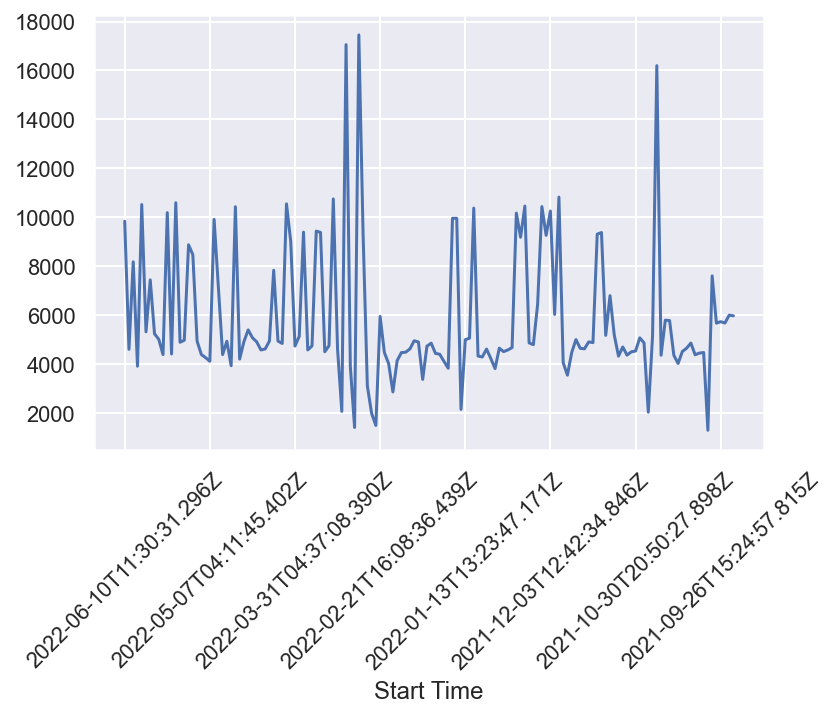

In [9]:
# show data with a mask filter (running only)
#I want to plot the old time to check my work later
mask1 = df['Session Subtype'] == 'RUNNING'
(
    df[mask1]
    .set_index('Start Time')
    ['Steps']
    .plot(rot = 45)
)

In [10]:
df.head(4)

Start Time                  End Time Session Type  \
0  2022-06-10T21:25:00.000Z  2022-06-10T21:40:00.000Z      WORKOUT   
1  2022-06-10T16:57:16.288Z  2022-06-10T17:16:11.595Z      WORKOUT   
2  2022-06-10T12:34:13.628Z  2022-06-10T12:53:08.867Z      WORKOUT   
3  2022-06-10T11:30:31.296Z  2022-06-10T12:34:13.612Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset      Activity Score  \
0           OTHER       Automatic                    -5.0                 9.2   
1         WALKING       Automatic                    -5.0  0.7096625000000001   
2         WALKING       Automatic                    -5.0  17.822866666666666   
3         RUNNING       Automatic                    -5.0  123.25078666666667   

  Intense Duration (ms) Moderate Duration (ms)  Max Heart Rate (bpm)  \
0               No Data               540000.0                 118.0   
1               No Data                No Data                 105.0   
2               60000.0               946372.0                 142.0   
3             3600000.0               193612.0                 170.0   

   Average Heart Rate (bpm)   Steps  Calories Software Version Software OS  \
0                     101.0   195.0      82.0       1.0.114475         ios   
1                      85.0  1140.0     112.0       1.0.114475         ios   
2                     116.0  1412.0     201.0       1.0.114475         ios   
3                     154.0  9843.0    1145.0       1.0.114475         ios   

   Software OS Version  Active Time (ms)  Total Duration (ms)  Activity Pause  \
0                 15.6          900000.0             900000.0  Not Applicable   
1                 15.6         1135307.0            1135307.0  Not Applicable   
2                 15.6         1135239.0            1135239.0  Not Applicable   
3                 15.6         3822316.0            3822316.0  Not Applicable   

  Session Source  
0    User Logged  
1    User Logged  
2    User Logged  
3    User Logged

## Converting Time

In [11]:
#I will use the datetime and pytz packages to convert my time/dates
from datetime import datetime
from pytz import timezone
import pytz
central = timezone('US/Central')
time_stamp = '2022-04-23T05:57:36.270Z'
published_time = datetime.strptime(time_stamp, '%Y-%m-%dT%H:%M:%S.%f%z')
published_cst = published_time.astimezone(central)
actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

print(time_stamp)
print(published_time)
print(published_cst)
print(actual_time_published)

2022-04-23T05:57:36.270Z
2022-04-23 05:57:36.270000+00:00
2022-04-23 00:57:36.270000-05:00
Sat, Apr 23 2022 at 12:57:36 AM CDT


In [12]:
list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z'), df['Start Time']))
pd.to_datetime(df['Start Time'], format='%Y-%m-%dT%H:%M:%S.%f%z')


def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert,
                                       '%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

df['Start Time DTG'] = df['Start Time'].apply(date_convert)
df['End Time DTG'] = df['End Time'].apply(date_convert)
df.head(2)

Start Time                  End Time Session Type  \
0  2022-06-10T21:25:00.000Z  2022-06-10T21:40:00.000Z      WORKOUT   
1  2022-06-10T16:57:16.288Z  2022-06-10T17:16:11.595Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset      Activity Score  \
0           OTHER       Automatic                    -5.0                 9.2   
1         WALKING       Automatic                    -5.0  0.7096625000000001   

  Intense Duration (ms) Moderate Duration (ms)  Max Heart Rate (bpm)  ...  \
0               No Data               540000.0                 118.0  ...   
1               No Data                No Data                 105.0  ...   

   Calories  Software Version  Software OS Software OS Version  \
0      82.0        1.0.114475          ios                15.6   
1     112.0        1.0.114475          ios                15.6   

  Active Time (ms)  Total Duration (ms)  Activity Pause  Session Source  \
0         900000.0             900000.0  Not Applicable     User Logged   
1        1135307.0            1135307.0  Not Applicable     User Logged   

                        Start Time DTG                         End Time DTG  
0  Fri, Jun 10 2022 at 09:25:00 PM UTC  Fri, Jun 10 2022 at 09:40:00 PM UTC  
1  Fri, Jun 10 2022 at 04:57:16 PM UTC  Fri, Jun 10 2022 at 05:16:11 PM UTC  

[2 rows x 22 columns]

In [14]:
# df['Local Start Time DTG'] = df['Local Start Time'].dt.tz_localize('CET').dt.tz_convert('US/Central')


In [13]:
df.set_index(pd.DatetimeIndex(df['Start Time DTG']).tz_convert('US/Central'), inplace = True, drop = True)
df.index.names = ['Local Start Time DTG']
df = df.reset_index()
df.set_index(pd.DatetimeIndex(df['End Time DTG']).tz_convert('US/Central'), inplace = True, drop = True)
df.index.names = ['Local End Time DTG']
df = df.reset_index()

In [14]:
df.head(2)

Local End Time DTG      Local Start Time DTG  \
0 2022-06-10 16:40:00-05:00 2022-06-10 16:25:00-05:00   
1 2022-06-10 12:16:11-05:00 2022-06-10 11:57:16-05:00   

                 Start Time                  End Time Session Type  \
0  2022-06-10T21:25:00.000Z  2022-06-10T21:40:00.000Z      WORKOUT   
1  2022-06-10T16:57:16.288Z  2022-06-10T17:16:11.595Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset      Activity Score  \
0           OTHER       Automatic                    -5.0                 9.2   
1         WALKING       Automatic                    -5.0  0.7096625000000001   

  Intense Duration (ms)  ... Calories  Software Version  Software OS  \
0               No Data  ...     82.0        1.0.114475          ios   
1               No Data  ...    112.0        1.0.114475          ios   

   Software OS Version  Active Time (ms) Total Duration (ms)  Activity Pause  \
0                 15.6          900000.0            900000.0  Not Applicable   
1                 15.6         1135307.0           1135307.0  Not Applicable   

   Session Source                       Start Time DTG  \
0     User Logged  Fri, Jun 10 2022 at 09:25:00 PM UTC   
1     User Logged  Fri, Jun 10 2022 at 04:57:16 PM UTC   

                          End Time DTG  
0  Fri, Jun 10 2022 at 09:40:00 PM UTC  
1  Fri, Jun 10 2022 at 05:16:11 PM UTC  

[2 rows x 24 columns]

In [15]:
list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z'), df['End Time']))
pd.to_datetime(df['End Time'], format='%Y-%m-%dT%H:%M:%S.%f%z')


def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert,
                                       '%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

In [16]:
df.head(3)

Local End Time DTG      Local Start Time DTG  \
0 2022-06-10 16:40:00-05:00 2022-06-10 16:25:00-05:00   
1 2022-06-10 12:16:11-05:00 2022-06-10 11:57:16-05:00   
2 2022-06-10 07:53:08-05:00 2022-06-10 07:34:13-05:00   

                 Start Time                  End Time Session Type  \
0  2022-06-10T21:25:00.000Z  2022-06-10T21:40:00.000Z      WORKOUT   
1  2022-06-10T16:57:16.288Z  2022-06-10T17:16:11.595Z      WORKOUT   
2  2022-06-10T12:34:13.628Z  2022-06-10T12:53:08.867Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset      Activity Score  \
0           OTHER       Automatic                    -5.0                 9.2   
1         WALKING       Automatic                    -5.0  0.7096625000000001   
2         WALKING       Automatic                    -5.0  17.822866666666666   

  Intense Duration (ms)  ... Calories  Software Version  Software OS  \
0               No Data  ...     82.0        1.0.114475          ios   
1               No Data  ...    112.0        1.0.114475          ios   
2               60000.0  ...    201.0        1.0.114475          ios   

   Software OS Version  Active Time (ms) Total Duration (ms)  Activity Pause  \
0                 15.6          900000.0            900000.0  Not Applicable   
1                 15.6         1135307.0           1135307.0  Not Applicable   
2                 15.6         1135239.0           1135239.0  Not Applicable   

   Session Source                       Start Time DTG  \
0     User Logged  Fri, Jun 10 2022 at 09:25:00 PM UTC   
1     User Logged  Fri, Jun 10 2022 at 04:57:16 PM UTC   
2     User Logged  Fri, Jun 10 2022 at 12:34:13 PM UTC   

                          End Time DTG  
0  Fri, Jun 10 2022 at 09:40:00 PM UTC  
1  Fri, Jun 10 2022 at 05:16:11 PM UTC  
2  Fri, Jun 10 2022 at 12:53:08 PM UTC  

[3 rows x 24 columns]

In [19]:
# #create a for loop with the updated timezone instructions. This will add a new column.\n",
# central = timezone('US/Central')
# time_stamp = '2022-04-23T05:57:36.270Z'
# published_time = datetime.strptime(df['Start Time'], '%Y-%m-%dT%H:%M:%S.%f%z')
# published_cst = published_time.astimezone(central)
# actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')
# df['Local Start Time'] = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')
    
# for item in df['End Time']:
#     central = timezone('US/Central'),
#     time_stamp = '2022-04-23T05:57:36.270Z',
#     published_time = datetime.strptime(time_stamp, '%Y-%m-%dT%H:%M:%S.%f%z'),
#     published_cst = published_time.astimezone(central),
#     actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z'),
#     df['Local End Time'] = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

In [20]:
# import pytz
# df['Local_Time'] = df.apply(lambda x: pytz.timezone("US/Central" if df['Time_Zone'] == 'CST' else x['Time_Zone']).normalize(x['CREATED_DT']), axis = 1)

In [17]:
#I want to pull just the day out of the start/end times
#df['Local Start Time DTG Only'] = pd.to_datetime(df['Local Start Time DTG'])
df['day_of_week_start']=df['Local Start Time DTG'].dt.day_name()
#df['Local End Time DTG Only'] = pd.to_datetime(df['Local End Time DTG'])
df['day_of_week_end']=df['Local End Time DTG'].dt.day_name()

In [18]:
#I plan on joining this with my Map My Run Data to get the mileage, so I will pull just the date
df['Workout_Date'] = df['Local Start Time DTG'].dt.date

In [19]:
df.head(1)

Local End Time DTG      Local Start Time DTG  \
0 2022-06-10 16:40:00-05:00 2022-06-10 16:25:00-05:00   

                 Start Time                  End Time Session Type  \
0  2022-06-10T21:25:00.000Z  2022-06-10T21:40:00.000Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset Activity Score  \
0           OTHER       Automatic                    -5.0            9.2   

  Intense Duration (ms)  ... Software OS Version  Active Time (ms)  \
0               No Data  ...                15.6          900000.0   

   Total Duration (ms)  Activity Pause  Session Source  \
0             900000.0  Not Applicable     User Logged   

                        Start Time DTG                         End Time DTG  \
0  Fri, Jun 10 2022 at 09:25:00 PM UTC  Fri, Jun 10 2022 at 09:40:00 PM UTC   

   day_of_week_start  day_of_week_end  Workout_Date  
0             Friday           Friday    2022-06-10  

[1 rows x 27 columns]

<AxesSubplot:xlabel='Local Start Time DTG'>

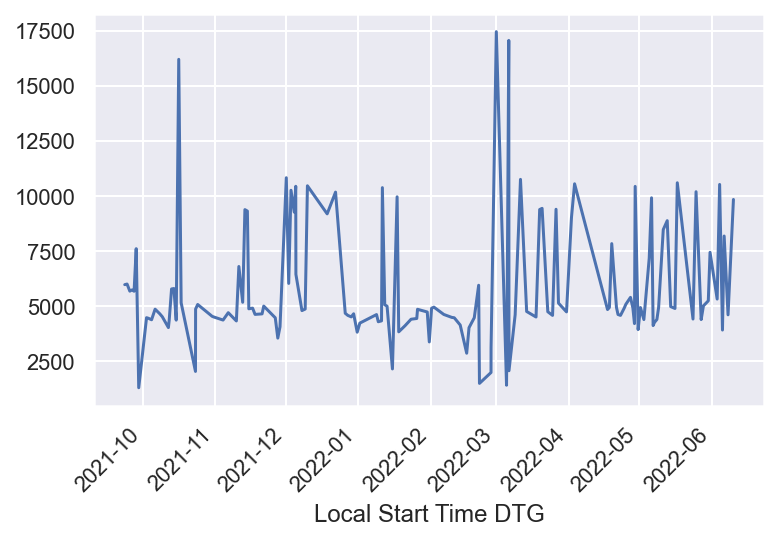

In [20]:
# show data with a mask filter (running only) - updated to include the accurate time data
#I want to plot the old time to check my work later
mask1 = df['Session Subtype'] == 'RUNNING'
(
    df[mask1]
    .set_index('Local Start Time DTG')
    ['Steps']
    .plot(rot = 45)
)

In [24]:
# df.info()

In [21]:
#some of my numbers are string objects so I need to convert them to floats
df['Activity Score'] = pd.to_numeric(df['Activity Score'],errors='coerce')
df['Intense Duration (ms)'] = pd.to_numeric(df['Intense Duration (ms)'],errors='coerce')
df['Moderate Duration (ms)'] = pd.to_numeric(df['Moderate Duration (ms)'],errors='coerce')

In [22]:
#I want the entire dataframe to be rounded to 2 places
df = df.round(2)

In [23]:
#check my work
df.head(2)

Local End Time DTG      Local Start Time DTG  \
0 2022-06-10 16:40:00-05:00 2022-06-10 16:25:00-05:00   
1 2022-06-10 12:16:11-05:00 2022-06-10 11:57:16-05:00   

                 Start Time                  End Time Session Type  \
0  2022-06-10T21:25:00.000Z  2022-06-10T21:40:00.000Z      WORKOUT   
1  2022-06-10T16:57:16.288Z  2022-06-10T17:16:11.595Z      WORKOUT   

  Session Subtype Creation Method  Local Time Zone Offset  Activity Score  \
0           OTHER       Automatic                    -5.0            9.20   
1         WALKING       Automatic                    -5.0            0.71   

   Intense Duration (ms)  ...  Software OS Version  Active Time (ms)  \
0                    NaN  ...                 15.6          900000.0   
1                    NaN  ...                 15.6         1135307.0   

   Total Duration (ms)  Activity Pause  Session Source  \
0             900000.0  Not Applicable     User Logged   
1            1135307.0  Not Applicable     User Logged   

                        Start Time DTG                         End Time DTG  \
0  Fri, Jun 10 2022 at 09:25:00 PM UTC  Fri, Jun 10 2022 at 09:40:00 PM UTC   
1  Fri, Jun 10 2022 at 04:57:16 PM UTC  Fri, Jun 10 2022 at 05:16:11 PM UTC   

   day_of_week_start  day_of_week_end  Workout_Date  
0             Friday           Friday    2022-06-10  
1             Friday           Friday    2022-06-10  

[2 rows x 27 columns]

In [24]:
df.columns

Index(['Local End Time DTG', 'Local Start Time DTG', 'Start Time', 'End Time',
       'Session Type', 'Session Subtype', 'Creation Method',
       'Local Time Zone Offset', 'Activity Score', 'Intense Duration (ms)',
       'Moderate Duration (ms)', 'Max Heart Rate (bpm)',
       'Average Heart Rate (bpm)', 'Steps', 'Calories', 'Software Version',
       'Software OS', 'Software OS Version', 'Active Time (ms)',
       'Total Duration (ms)', 'Activity Pause', 'Session Source',
       'Start Time DTG', 'End Time DTG', 'day_of_week_start',
       'day_of_week_end', 'Workout_Date'],
      dtype='object')

In [25]:
#I want to add month categories
import datetime
import calendar
df['Workout_Month'] = df['Local Start Time DTG'].dt.month
df['Workout_Month'] = df['Local Start Time DTG'].dt.month
df['Workout_Month_Name'] = df['Workout_Month'].apply(lambda x: calendar.month_name[x])


In [26]:
df.head(1)
df.columns

Index(['Local End Time DTG', 'Local Start Time DTG', 'Start Time', 'End Time',
       'Session Type', 'Session Subtype', 'Creation Method',
       'Local Time Zone Offset', 'Activity Score', 'Intense Duration (ms)',
       'Moderate Duration (ms)', 'Max Heart Rate (bpm)',
       'Average Heart Rate (bpm)', 'Steps', 'Calories', 'Software Version',
       'Software OS', 'Software OS Version', 'Active Time (ms)',
       'Total Duration (ms)', 'Activity Pause', 'Session Source',
       'Start Time DTG', 'End Time DTG', 'day_of_week_start',
       'day_of_week_end', 'Workout_Date', 'Workout_Month',
       'Workout_Month_Name'],
      dtype='object')

In [27]:
#I want to re-arrange my columns so I can focus on the important items.
df = df[['Workout_Date', 'Session Subtype', 'Activity Score', 'Intense Duration (ms)',
         'Moderate Duration (ms)','Active Time (ms)', 'Average Heart Rate (bpm)',
         'Max Heart Rate (bpm)','Steps', 'Calories',
         'Total Duration (ms)', 'Start Time DTG',
       'End Time DTG', 'day_of_week_start',
       'Workout_Month', 'Workout_Month_Name']]

In [28]:
#double check that I have all my columns still
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              299 non-null    object 
 1   Session Subtype           299 non-null    object 
 2   Activity Score            298 non-null    float64
 3   Intense Duration (ms)     162 non-null    float64
 4   Moderate Duration (ms)    268 non-null    float64
 5   Active Time (ms)          299 non-null    float64
 6   Average Heart Rate (bpm)  299 non-null    float64
 7   Max Heart Rate (bpm)      299 non-null    float64
 8   Steps                     299 non-null    float64
 9   Calories                  299 non-null    float64
 10  Total Duration (ms)       299 non-null    float64
 11  Start Time DTG            299 non-null    object 
 12  End Time DTG              299 non-null    object 
 13  day_of_week_start         299 non-null    object 
 14  Workout_Mo

## MS to Minutes and Seconds

In [29]:
df.head(2)

Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0   2022-06-10           OTHER            9.20                    NaN   
1   2022-06-10         WALKING            0.71                    NaN   

   Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0                540000.0          900000.0                     101.0   
1                     NaN         1135307.0                      85.0   

   Max Heart Rate (bpm)   Steps  Calories  Total Duration (ms)  \
0                 118.0   195.0      82.0             900000.0   
1                 105.0  1140.0     112.0            1135307.0   

                        Start Time DTG                         End Time DTG  \
0  Fri, Jun 10 2022 at 09:25:00 PM UTC  Fri, Jun 10 2022 at 09:40:00 PM UTC   
1  Fri, Jun 10 2022 at 04:57:16 PM UTC  Fri, Jun 10 2022 at 05:16:11 PM UTC   

  day_of_week_start  Workout_Month Workout_Month_Name  
0            Friday              6               June  
1            Friday              6               June

In [30]:
#seconds = (milliseconds / 1000) % 60 ;
#minutes = ((milliseconds / (1000*60)) % 60);
#hours   = ((milliseconds / (1000*60*60)) % 24);
df['Active Time (sec)'] = (df['Active Time (ms)'] / 1000) % 60
df['Active Time (min)'] = (df['Active Time (ms)'] / (1000*60)) % 60
df['Active Time (hour)'] = (df['Active Time (ms)'] / (1000*60*60) % 24)
df['Active Time (total min)'] = (df['Active Time (ms)'] / (1000*60))    

In [32]:
df = df.round(2)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              299 non-null    object 
 1   Session Subtype           299 non-null    object 
 2   Activity Score            298 non-null    float64
 3   Intense Duration (ms)     162 non-null    float64
 4   Moderate Duration (ms)    268 non-null    float64
 5   Active Time (ms)          299 non-null    float64
 6   Average Heart Rate (bpm)  299 non-null    float64
 7   Max Heart Rate (bpm)      299 non-null    float64
 8   Steps                     299 non-null    float64
 9   Calories                  299 non-null    float64
 10  Total Duration (ms)       299 non-null    float64
 11  Start Time DTG            299 non-null    object 
 12  End Time DTG              299 non-null    object 
 13  day_of_week_start         299 non-null    object 
 14  Workout_Mo

Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0   2022-06-10           OTHER            9.20                    NaN   
1   2022-06-10         WALKING            0.71                    NaN   
2   2022-06-10         WALKING           17.82                60000.0   

   Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0                540000.0          900000.0                     101.0   
1                     NaN         1135307.0                      85.0   
2                946372.0         1135239.0                     116.0   

   Max Heart Rate (bpm)   Steps  Calories  Total Duration (ms)  \
0                 118.0   195.0      82.0             900000.0   
1                 105.0  1140.0     112.0            1135307.0   
2                 142.0  1412.0     201.0            1135239.0   

                        Start Time DTG                         End Time DTG  \
0  Fri, Jun 10 2022 at 09:25:00 PM UTC  Fri, Jun 10 2022 at 09:40:00 PM UTC   
1  Fri, Jun 10 2022 at 04:57:16 PM UTC  Fri, Jun 10 2022 at 05:16:11 PM UTC   
2  Fri, Jun 10 2022 at 12:34:13 PM UTC  Fri, Jun 10 2022 at 12:53:08 PM UTC   

  day_of_week_start  Workout_Month Workout_Month_Name  Active Time (sec)  \
0            Friday              6               June               0.00   
1            Friday              6               June              55.31   
2            Friday              6               June              55.24   

   Active Time (min)  Active Time (hour)  Active Time (total min)  
0              15.00                0.25                    15.00  
1              18.92                0.32                    18.92  
2              18.92                0.32                    18.92

In [36]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              299 non-null    object 
 1   Session Subtype           299 non-null    object 
 2   Activity Score            298 non-null    float64
 3   Intense Duration (ms)     162 non-null    float64
 4   Moderate Duration (ms)    268 non-null    float64
 5   Active Time (ms)          299 non-null    float64
 6   Average Heart Rate (bpm)  299 non-null    float64
 7   Max Heart Rate (bpm)      299 non-null    float64
 8   Steps                     299 non-null    float64
 9   Calories                  299 non-null    float64
 10  Total Duration (ms)       299 non-null    float64
 11  Start Time DTG            299 non-null    object 
 12  End Time DTG              299 non-null    object 
 13  day_of_week_start         299 non-null    object 
 14  Workout_Mo

Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0   2022-06-10           OTHER             9.2                    NaN   

   Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0                540000.0          900000.0                     101.0   

   Max Heart Rate (bpm)  Steps  Calories  Total Duration (ms)  \
0                 118.0  195.0      82.0             900000.0   

                        Start Time DTG                         End Time DTG  \
0  Fri, Jun 10 2022 at 09:25:00 PM UTC  Fri, Jun 10 2022 at 09:40:00 PM UTC   

  day_of_week_start  Workout_Month Workout_Month_Name  Active Time (sec)  \
0            Friday              6               June                0.0   

   Active Time (min)  Active Time (hour)  Active Time (total min)  
0               15.0                0.25                     15.0

In [33]:
df['Miles'] = df['Steps'] / 1475
df.head(10)

Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0   2022-06-10           OTHER            9.20                    NaN   
1   2022-06-10         WALKING            0.71                    NaN   
2   2022-06-10         WALKING           17.82                60000.0   
3   2022-06-10         RUNNING          123.25              3600000.0   
4   2022-06-07         RUNNING           58.17              1620000.0   
5   2022-06-06           OTHER            6.24                    NaN   
6   2022-06-06         RUNNING          100.85              2940000.0   
7   2022-06-05           OTHER            7.70                    NaN   
8   2022-06-05         WALKING           33.62                    NaN   
9   2022-06-05         RUNNING           48.85              1378054.0   

   Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0                540000.0          900000.0                     101.0   
1                     NaN         1135307.0                      85.0   
2                946372.0         1135239.0                     116.0   
3                193612.0         3822316.0                     154.0   
4                240000.0         2090263.0                     124.0   
5                362184.0          662184.0                      96.0   
6                168263.0         3225077.0                     143.0   
7                420000.0         1740000.0                      86.0   
8               1984958.0         2630507.0                     107.0   
9                175040.0         1553094.0                     147.0   

   Max Heart Rate (bpm)   Steps  Calories  ...  \
0                 118.0   195.0      82.0  ...   
1                 105.0  1140.0     112.0  ...   
2                 142.0  1412.0     201.0  ...   
3                 170.0  9843.0    1145.0  ...   
4                 140.0  4611.0     457.0  ...   
5                 107.0   430.0      67.0  ...   
6                 156.0  8185.0     866.0  ...   
7                 130.0   753.0     147.0  ...   
8                 119.0  3936.0     428.0  ...   
9                 155.0  3921.0     439.0  ...   

                        Start Time DTG                         End Time DTG  \
0  Fri, Jun 10 2022 at 09:25:00 PM UTC  Fri, Jun 10 2022 at 09:40:00 PM UTC   
1  Fri, Jun 10 2022 at 04:57:16 PM UTC  Fri, Jun 10 2022 at 05:16:11 PM UTC   
2  Fri, Jun 10 2022 at 12:34:13 PM UTC  Fri, Jun 10 2022 at 12:53:08 PM UTC   
3  Fri, Jun 10 2022 at 11:30:31 AM UTC  Fri, Jun 10 2022 at 12:34:13 PM UTC   
4  Wed, Jun 08 2022 at 04:11:34 AM UTC  Wed, Jun 08 2022 at 04:46:24 AM UTC   
5  Mon, Jun 06 2022 at 01:11:57 PM UTC  Mon, Jun 06 2022 at 01:23:00 PM UTC   
6  Mon, Jun 06 2022 at 12:16:03 PM UTC  Mon, Jun 06 2022 at 01:09:48 PM UTC   
7  Sun, Jun 05 2022 at 09:33:00 PM UTC  Sun, Jun 05 2022 at 10:02:00 PM UTC   
8  Sun, Jun 05 2022 at 07:31:55 PM UTC  Sun, Jun 05 2022 at 08:15:45 PM UTC   
9  Sun, Jun 05 2022 at 07:06:01 PM UTC  Sun, Jun 05 2022 at 07:31:55 PM UTC   

  day_of_week_start Workout_Month  Workout_Month_Name Active Time (sec)  \
0            Friday             6                June              0.00   
1            Friday             6                June             55.31   
2            Friday             6                June             55.24   
3            Friday             6                June             42.32   
4           Tuesday             6                June             50.26   
5            Monday             6                June              2.18   
6            Monday             6                June             45.08   
7            Sunday             6                June              0.00   
8            Sunday             6                June             50.51   
9            Sunday             6                June             53.09   

   Active Time (min)  Active Time (hour)  Active Time (total min)     Miles  
0              15.00                0.25                    15.00  0.

In [34]:
df.corr()

Activity Score  Intense Duration (ms)  \
Activity Score                  1.000000               0.983304   
Intense Duration (ms)           0.983304               1.000000   
Moderate Duration (ms)         -0.294466              -0.363242   
Active Time (ms)                0.823231               0.858530   
Average Heart Rate (bpm)        0.799686               0.578934   
Max Heart Rate (bpm)            0.751775               0.373334   
Steps                           0.965211               0.950811   
Calories                        0.974355               0.946158   
Total Duration (ms)             0.823231               0.858530   
Workout_Month                  -0.039528               0.012151   
Active Time (sec)               0.310089               0.198965   
Active Time (min)               0.160363              -0.102648   
Active Time (hour)              0.823139               0.858725   
Active Time (total min)         0.823229               0.858533   
Miles                           0.965211               0.950811   

                          Moderate Duration (ms)  Active Time (ms)  \
Activity Score                         -0.294466          0.823231   
Intense Duration (ms)                  -0.363242          0.858530   
Moderate Duration (ms)                  1.000000          0.027562   
Active Time (ms)                        0.027562          1.000000   
Average Heart Rate (bpm)               -0.429887          0.464941   
Max Heart Rate (bpm)                   -0.349333          0.478382   
Steps                                  -0.306286          0.872313   
Calories                               -0.269752          0.870908   
Total Duration (ms)                     0.027562          1.000000   
Workout_Month                           0.068742         -0.011704   
Active Time (sec)                      -0.243130          0.200691   
Active Time (min)                       0.160953          0.283534   
Active Time (hour)                      0.027669          0.999959   
Active Time (total min)                 0.027554          1.000000   
Miles                                  -0.306286          0.872313   

                          Average Heart Rate (bpm)  Max Heart Rate (bpm)  \
Activity Score                            0.799686              0.751775   
Intense Duration (ms)                     0.578934              0.373334   
Moderate Duration (ms)                   -0.429887             -0.349333   
Active Time (ms)                          0.464941              0.478382   
Average Heart Rate (bpm)                  1.000000              0.944963   
Max Heart Rate (bpm)                      0.944963              1.000000   
Steps                                     0.718947              0.684214   
Calories                                  0.749155              0.715448   
Total Duration (ms)                       0.464941              0.478382   
Workout_Month                            -0.052401             -0.060504   
Active Time (sec)                         0.330127              0.278841   
Active Time (min)                         0.213734              0.228904   
Active Time (hour)                        0.464494              0.477775   
Active Time (total min)                   0.464938              0.478378   
Miles                                     0.718947              0.684214   

                             Steps  Calories  Total Duration (ms)  \
Activity Score            0.965211  0.974355             0.823231   
Intense Duration (ms)     0.950811  0.946158             0.858530   
Moderate Duration (ms)   -0.306286 -0.269752             0.027562   
Active Time (ms)          0.872313  0.870908             1.000000   
Average Heart Rate (bpm)  0.718947  0.749155             0.464941   
Max Heart Rate (bpm)      0.684214  0.715448             0.478382   
Steps                     1.000000  0.977355             0.872313   
Calories                  0.977355  1.000000             0.8709

In [35]:
df = df.round(2)
df.describe()

Activity Score  Intense Duration (ms)  Moderate Duration (ms)  \
count      298.000000           1.620000e+02            2.680000e+02   
mean        42.749765           1.945161e+06            4.802352e+05   
std         40.612201           1.173804e+06            4.981906e+05   
min          0.430000           6.000000e+04            4.389000e+03   
25%         10.392500           1.545097e+06            1.403780e+05   
50%         30.675000           1.740000e+06            3.000000e+05   
75%         60.992500           2.100000e+06            6.247625e+05   
max        229.120000           6.840000e+06            3.600000e+06   

       Active Time (ms)  Average Heart Rate (bpm)  Max Heart Rate (bpm)  \
count      2.990000e+02                299.000000            299.000000   
mean       1.931337e+06                118.655518            139.538462   
std        1.044940e+06                 28.049065             26.518849   
min        6.053420e+05                 63.000000             79.000000   
25%        1.214176e+06                 93.500000            115.000000   
50%        1.815740e+06                116.000000            143.000000   
75%        2.208982e+06                146.000000            165.000000   
max        6.949232e+06                165.000000            183.000000   

              Steps     Calories  Total Duration (ms)  Workout_Month  \
count    299.000000   299.000000         2.990000e+02     299.000000   
mean    3593.237458   389.632107         1.931337e+06       6.505017   
std     3063.928178   338.948342         1.044940e+06       3.894904   
min        4.000000    36.000000         6.053420e+05       1.000000   
25%     1062.500000   117.000000         1.214176e+06       3.000000   
50%     3131.000000   326.000000         1.815740e+06       5.000000   
75%     4892.000000   513.500000         2.208982e+06      10.000000   
max    17452.000000  2060.000000         6.949232e+06      12.000000   

       Active Time (sec)  Active Time (min)  Active Time (hour)  \
count         299.000000         299.000000          299.000000   
mean           25.183344          25.968595            0.536455   
std            21.108019          12.471444            0.290240   
min             0.000000           0.810000            0.170000   
25%             2.995000          14.000000            0.340000   
50%            22.830000          27.910000            0.500000   
75%            46.150000          33.855000            0.615000   
max            59.880000          58.770000            1.930000   

       Active Time (total min)       Miles  
count               299.000000  299.000000  
mean                 32.189331    2.436120  
std                  17.415593    2.076937  
min                  10.090000    0.000000  
25%                  20.235000    0.720000  
50%                  30.260000    2.120000  
75%                  36.820000    3.315000  
max                 115.820000   11.830000

array([[<AxesSubplot:title={'center':'Activity Score'}>,
        <AxesSubplot:title={'center':'Intense Duration (ms)'}>,
        <AxesSubplot:title={'center':'Moderate Duration (ms)'}>,
        <AxesSubplot:title={'center':'Active Time (ms)'}>],
       [<AxesSubplot:title={'center':'Average Heart Rate (bpm)'}>,
        <AxesSubplot:title={'center':'Max Heart Rate (bpm)'}>,
        <AxesSubplot:title={'center':'Steps'}>,
        <AxesSubplot:title={'center':'Calories'}>],
       [<AxesSubplot:title={'center':'Total Duration (ms)'}>,
        <AxesSubplot:title={'center':'Workout_Month'}>,
        <AxesSubplot:title={'center':'Active Time (sec)'}>,
        <AxesSubplot:title={'center':'Active Time (min)'}>],
       [<AxesSubplot:title={'center':'Active Time (hour)'}>,
        <AxesSubplot:title={'center':'Active Time (total min)'}>,
        <AxesSubplot:title={'center':'Miles'}>, <AxesSubplot:>]],
      dtype=object)

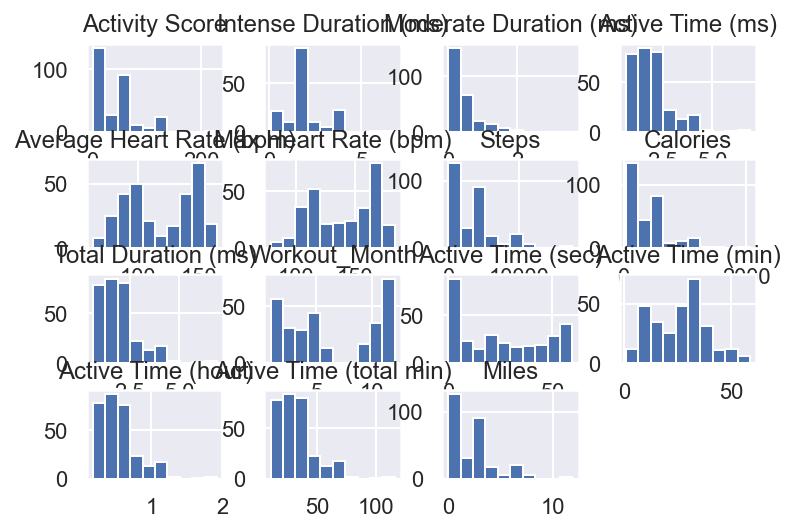

In [36]:
sns.set()
df.hist()

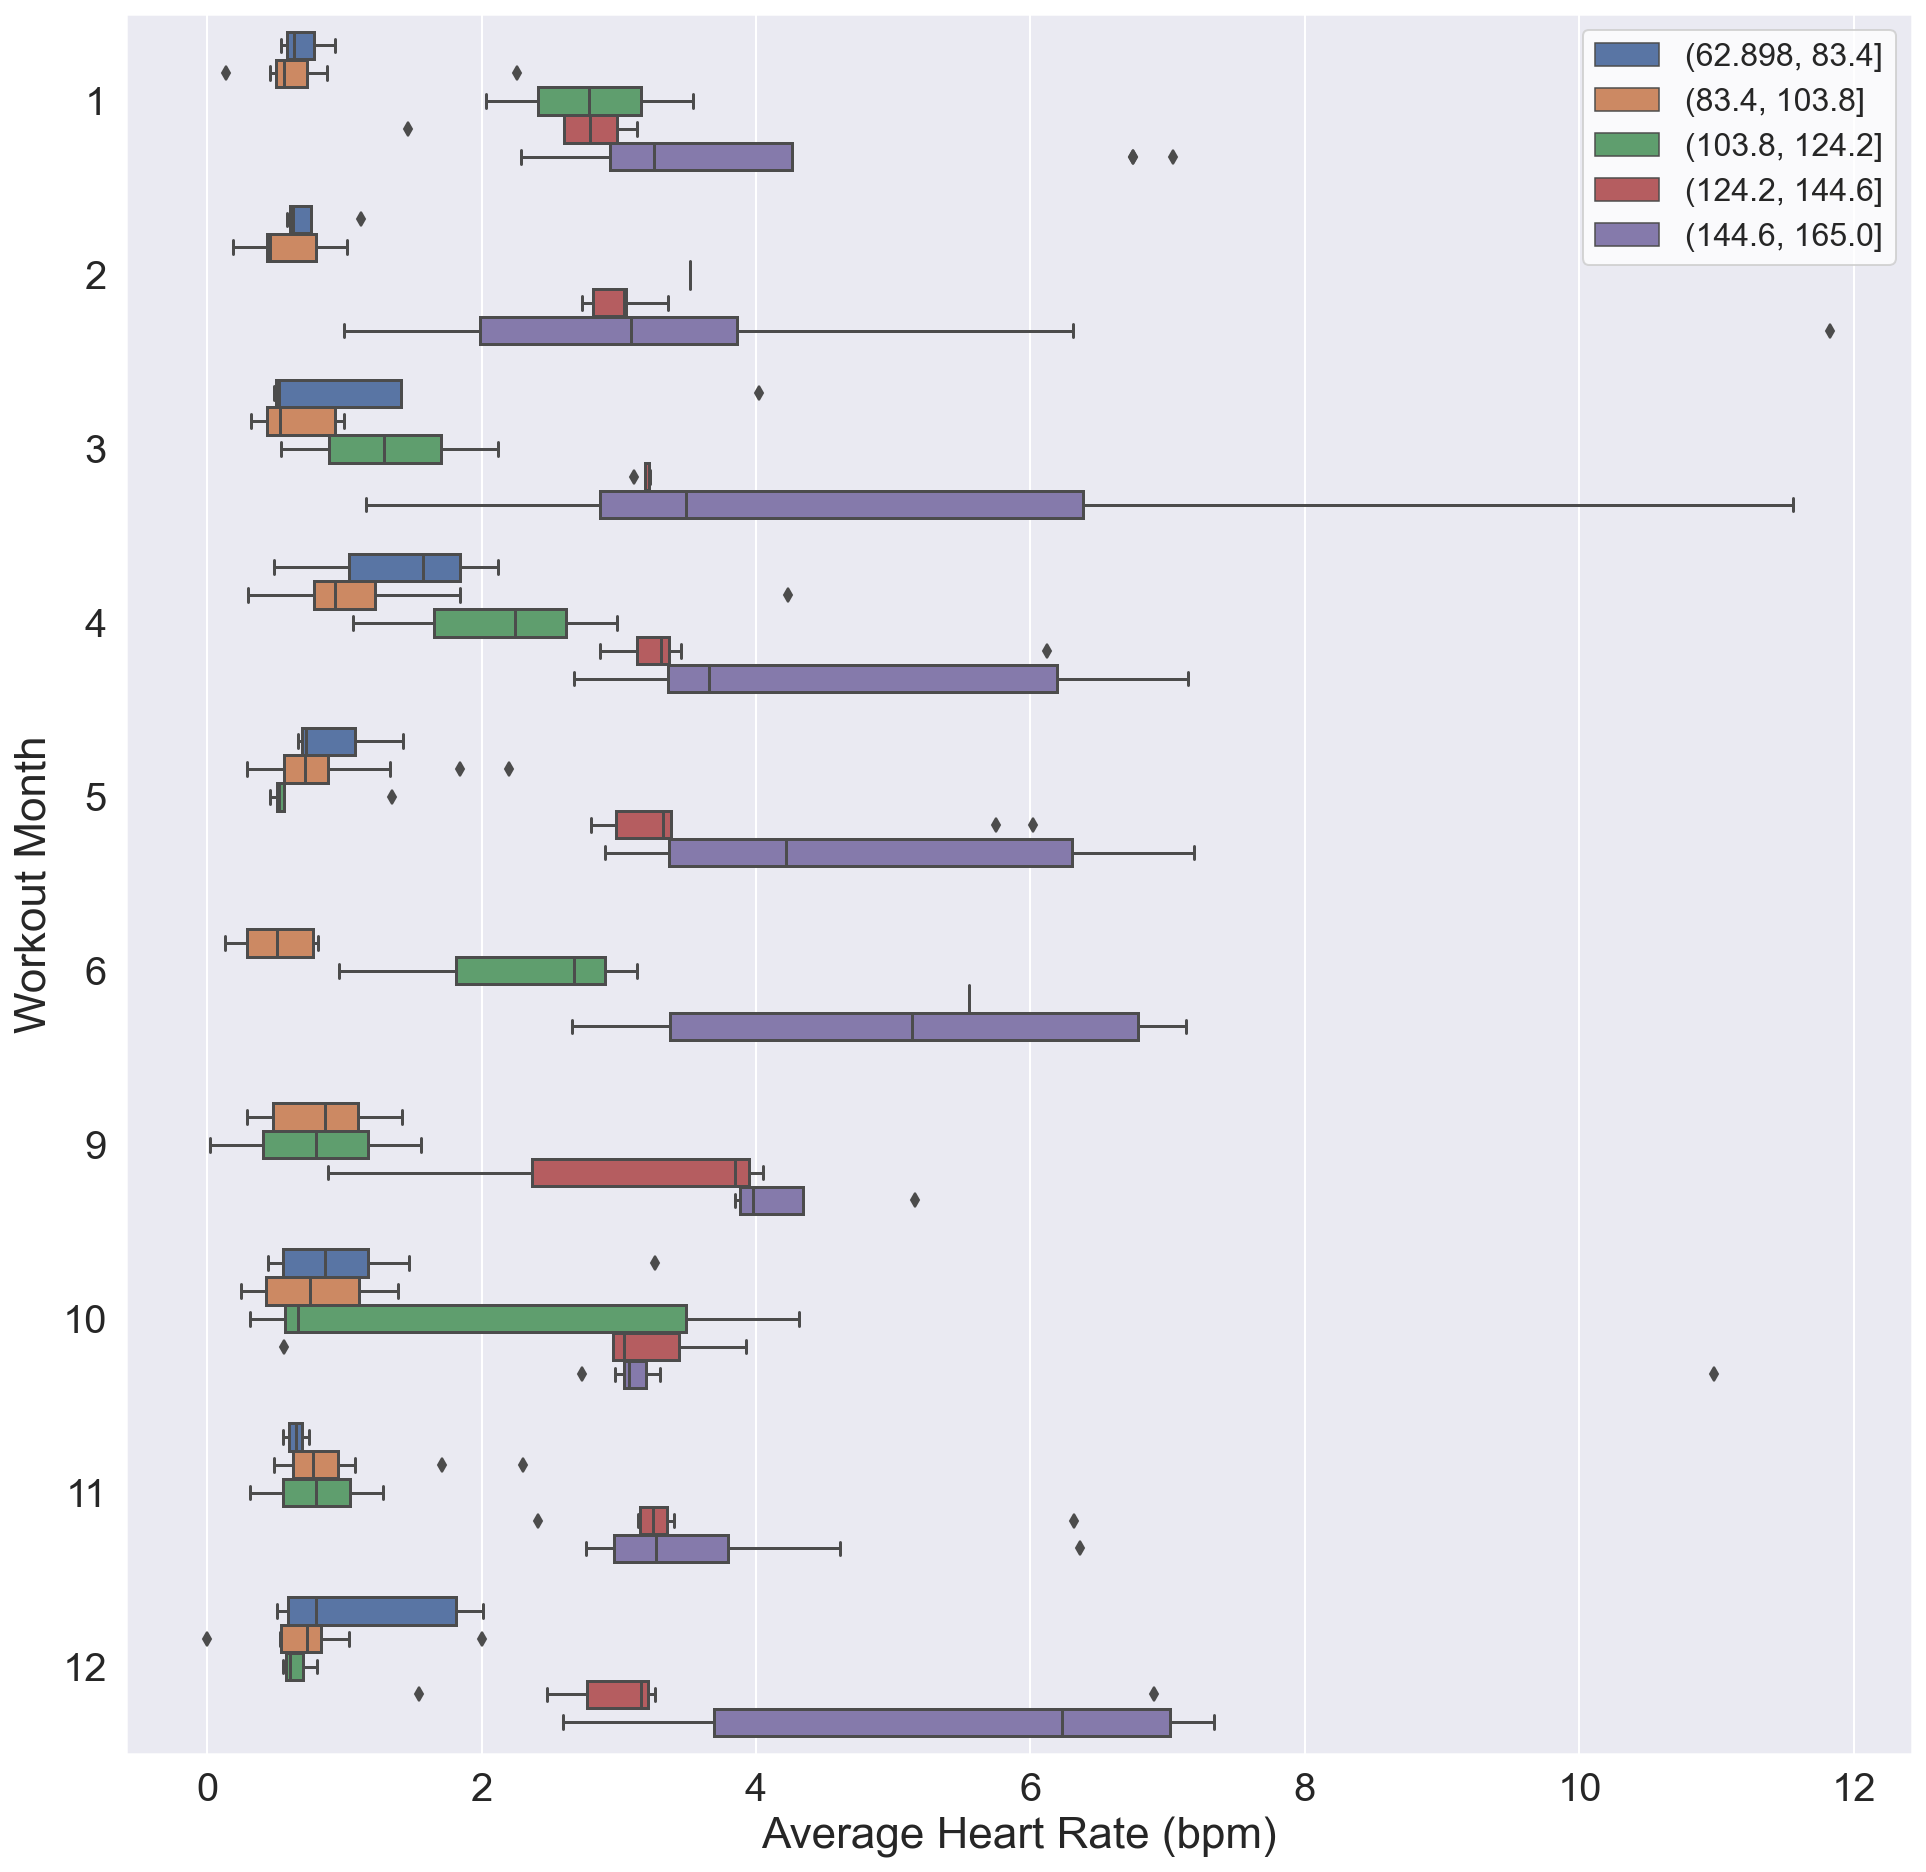

In [38]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4
jbox = sns.boxplot(x = 'Miles', y='Workout_Month', data=df, orient = 'h', hue = (pd.cut(df['Average Heart Rate (bpm)'], bins = 5)))
sns.set_theme(style="whitegrid")
plt.ylabel('Workout Month', fontsize=22)
plt.xlabel('Average Heart Rate (bpm)', fontsize=22)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 16)

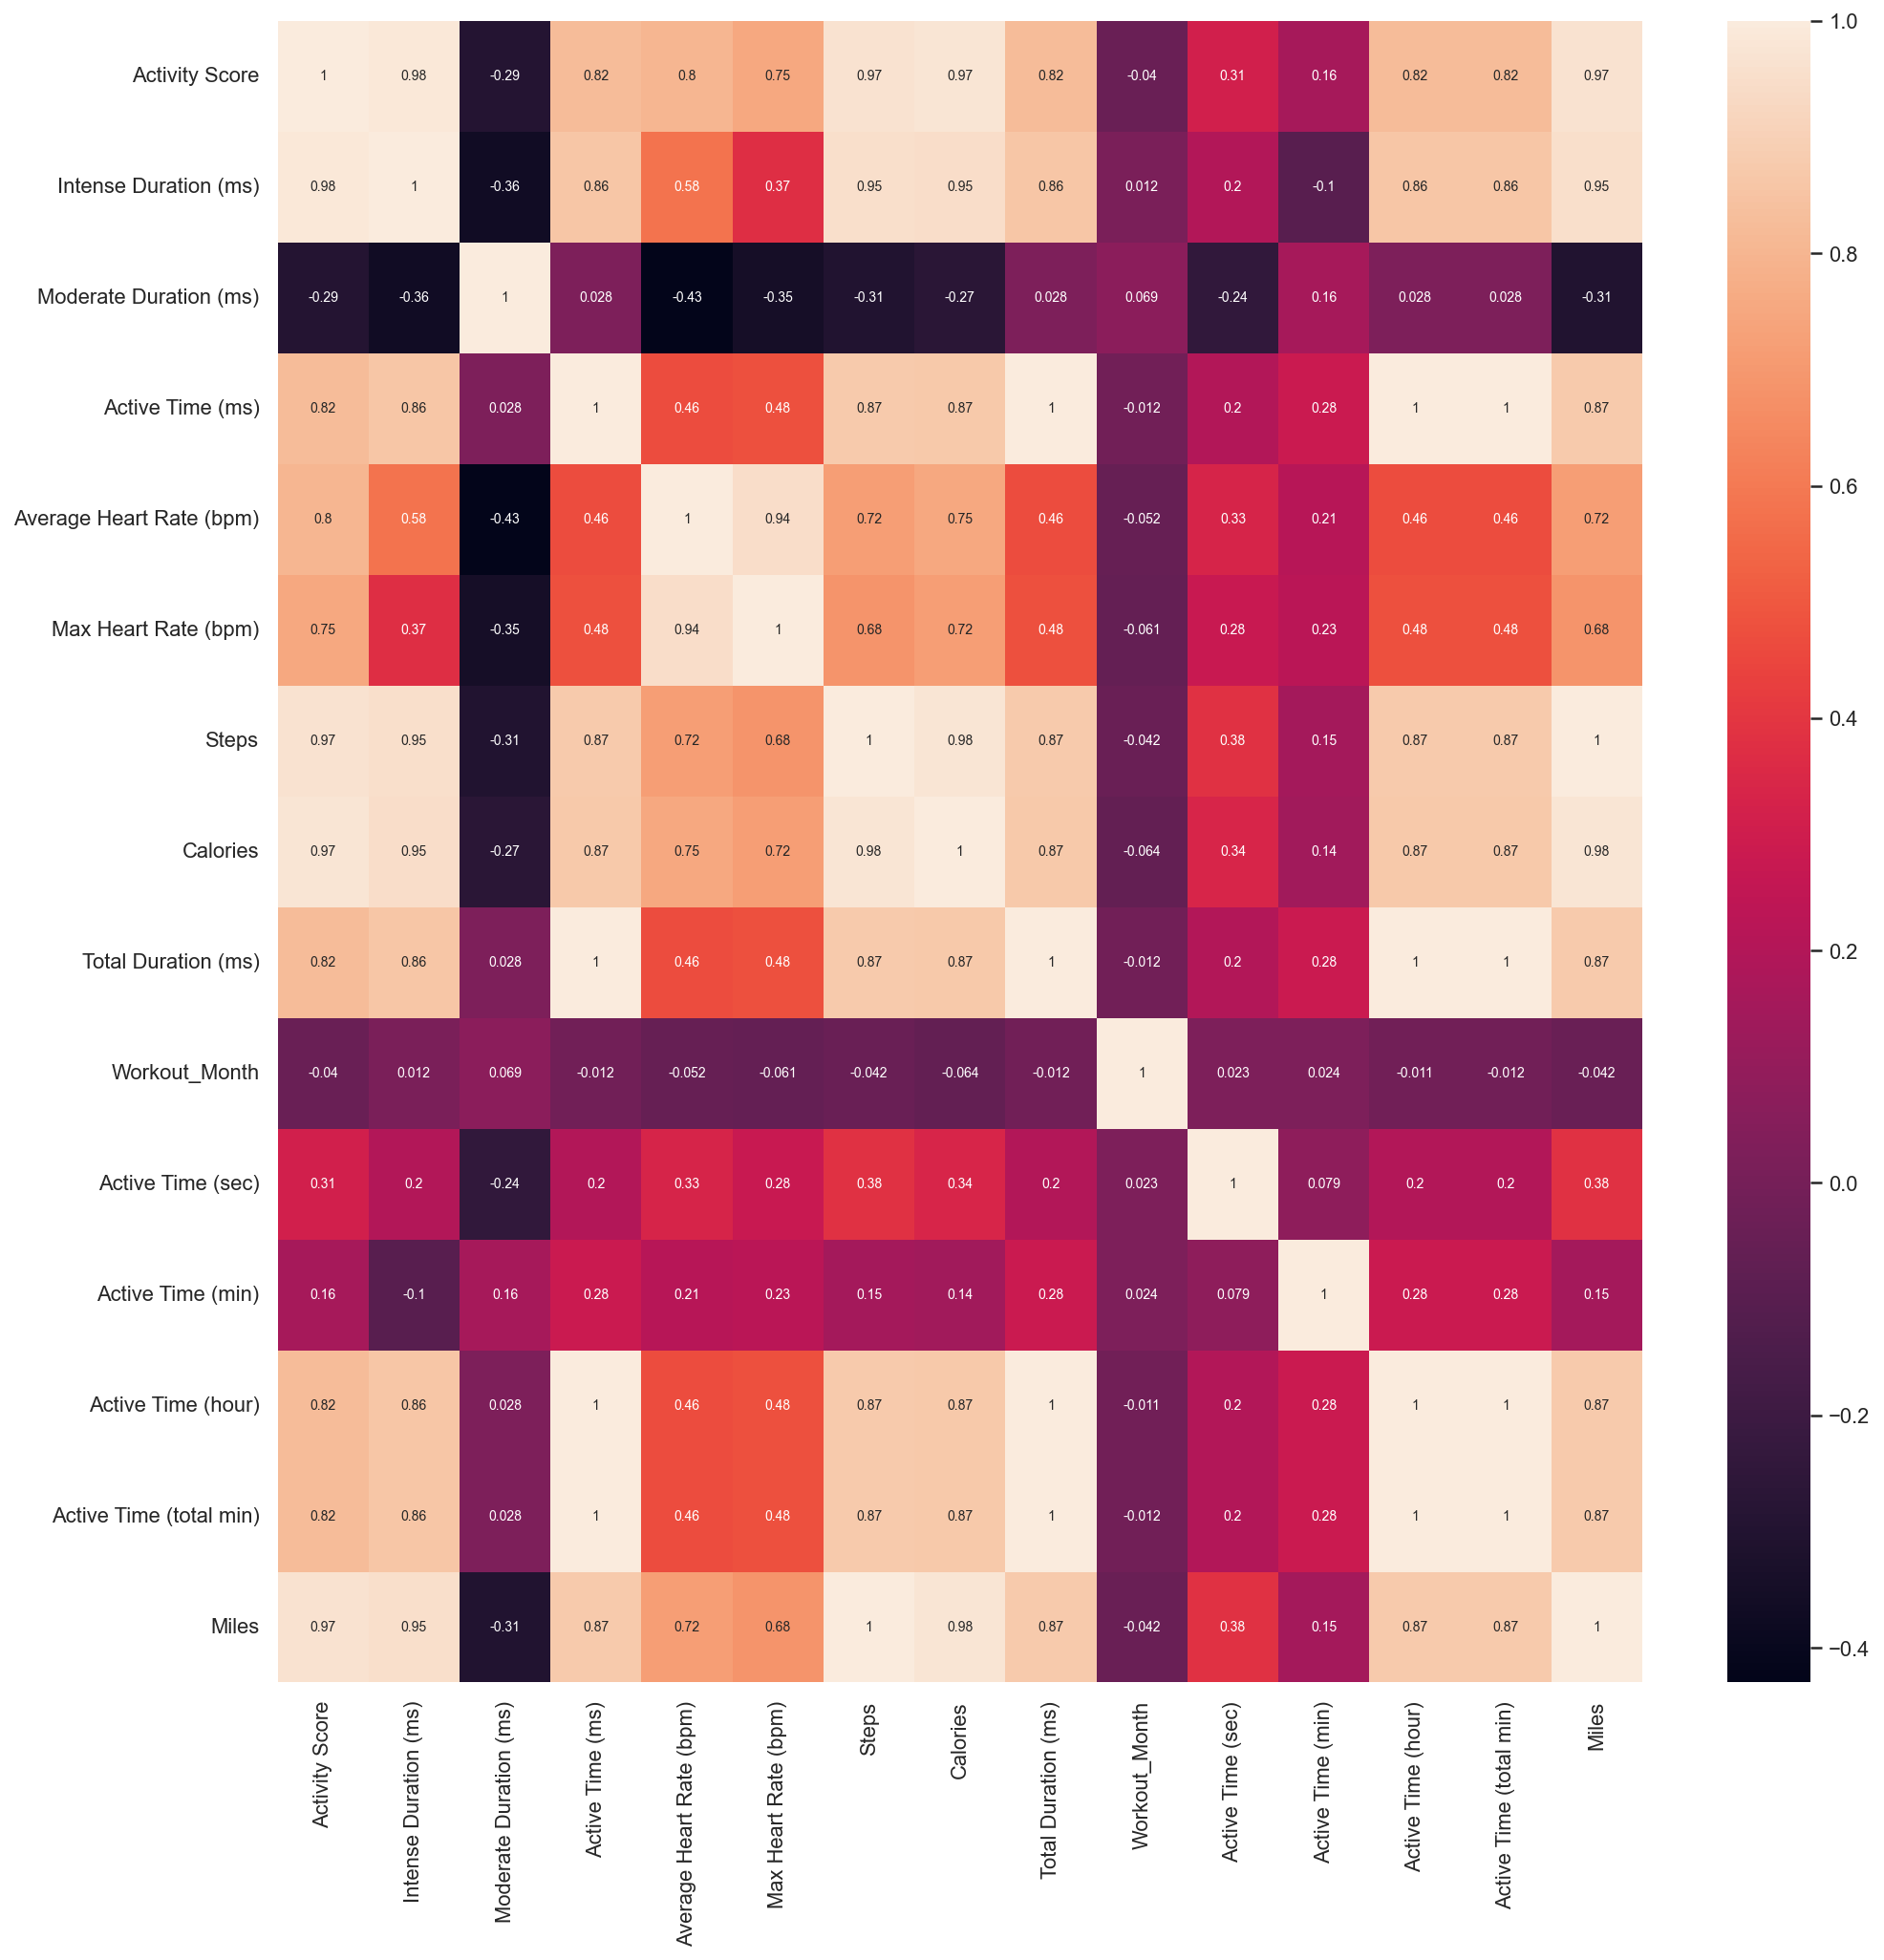

In [39]:
p1 = sns.heatmap(
    df
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)

In [43]:
# sns.set_context('talk')
# sns.pairplot(df, hue='Miles');

# Join Amazon Halo with Map My Run data

In [44]:
#I'm going to try using the web API first

In [45]:
# import os
# import requests
# # Get environment variables
# user = os.environ.get('MMRuser')
# #password = os.getenv('MMRpw')
# password = os.environ.get('MMRpw')

In [46]:
# import requests
# import json

# url = 'https://api.ua.com/v7.2/api_client/yourclientkey/'

# headers = {'Authorization': 'Bearer yourtoken', 'Api-Key': 'yourclient key'}

# data = {'callback_uri': 'https://www.exampleredirect.com/uacf/', 'application_title': 'New App Name'}

# requests.patch(url, headers=headers, data=json.dumps(data))

In [47]:
# r = requests.get('https://www.mapmyfitness.com/workout/export/csv', auth=('user', 'password'))
# r.headers['content-type']
# #'application/json; charset=utf8'
# r.encoding
# r.text


In [40]:
mmr_df = pd.read_csv(r'https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv', header=0)
mmr_df.info()
mmr_df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          689 non-null    object 
 1   Workout Date            689 non-null    object 
 2   Activity Type           689 non-null    object 
 3   Calories Burned (kCal)  689 non-null    int64  
 4   Distance (mi)           689 non-null    float64
 5   Workout Time (seconds)  689 non-null    int64  
 6   Avg Pace (min/mi)       689 non-null    float64
 7   Max Pace (min/mi)       689 non-null    float64
 8   Avg Speed (mi/h)        689 non-null    float64
 9   Max Speed (mi/h)        689 non-null    float64
 10  Avg Heart Rate          455 non-null    float64
 11  Steps                   665 non-null    float64
 12  Notes                   689 non-null    object 
 13  Source                  689 non-null    object 
 14  Link                    689 non-null    ob

Date Submitted   Workout Date Activity Type  Calories Burned (kCal)  \
0  June 18, 2022  June 18, 2022           Run                     370   

   Distance (mi)  Workout Time (seconds)  Avg Pace (min/mi)  \
0        2.57857                    1698            10.9661   

   Max Pace (min/mi)  Avg Speed (mi/h)  Max Speed (mi/h)  Avg Heart Rate  \
0             1.1124            5.4714           53.9375           159.0   

    Steps Notes                          Source  \
0  4431.0   b''  Map My Fitness MapMyRun iPhone   

                                             Link  
0  http://www.mapmyfitness.com/workout/6655598125

In [41]:
mmr_df['Workout_Date'] = pd.to_datetime(mmr_df['Workout Date']).dt.date
mmr_df.head(1)

Date Submitted   Workout Date Activity Type  Calories Burned (kCal)  \
0  June 18, 2022  June 18, 2022           Run                     370   

   Distance (mi)  Workout Time (seconds)  Avg Pace (min/mi)  \
0        2.57857                    1698            10.9661   

   Max Pace (min/mi)  Avg Speed (mi/h)  Max Speed (mi/h)  Avg Heart Rate  \
0             1.1124            5.4714           53.9375           159.0   

    Steps Notes                          Source  \
0  4431.0   b''  Map My Fitness MapMyRun iPhone   

                                             Link Workout_Date  
0  http://www.mapmyfitness.com/workout/6655598125   2022-06-18

In [57]:
mdf = df.merge(mmr_df, on='Workout_Date', how='left')

In [58]:
mdf.info()
mdf.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 337
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              338 non-null    object 
 1   Session Subtype           338 non-null    object 
 2   Activity Score            337 non-null    float64
 3   Intense Duration (ms)     184 non-null    float64
 4   Moderate Duration (ms)    306 non-null    float64
 5   Active Time (ms)          338 non-null    float64
 6   Average Heart Rate (bpm)  338 non-null    float64
 7   Max Heart Rate (bpm)      338 non-null    float64
 8   Steps_x                   338 non-null    float64
 9   Calories                  338 non-null    float64
 10  Total Duration (ms)       338 non-null    float64
 11  Start Time DTG            338 non-null    object 
 12  End Time DTG              338 non-null    object 
 13  day_of_week_start         338 non-null    object 
 14  Workout_Mo

Index(['Workout_Date', 'Session Subtype', 'Activity Score',
       'Intense Duration (ms)', 'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Total Duration (ms)', 'Start Time DTG', 'End Time DTG',
       'day_of_week_start', 'Workout_Month', 'Workout_Month_Name',
       'Active Time (sec)', 'Active Time (min)', 'Active Time (hour)',
       'Active Time (total min)', 'Miles', 'Date Submitted', 'Workout Date',
       'Activity Type', 'Calories Burned (kCal)', 'Distance (mi)',
       'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace',
       'Avg Speed (mi/h)', 'Max Speed', 'Avg Heart Rate', 'Steps_y', 'Notes',
       'Source', 'Link'],
      dtype='object')

In [59]:
#I will make a trimmed version of my merged dataframe
mdft = mdf[['Workout_Date', 'Session Subtype', 'Activity Score',
       'Intense Duration (ms)', 'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x', 'Steps_y',
       'Calories', 'Total Duration (ms)', 'Start Time DTG', 'End Time DTG',
       'day_of_week_start', 'Workout_Month', 'Workout_Month_Name',
       'Active Time (sec)', 'Active Time (min)', 'Active Time (hour)',
       'Active Time (total min)', 'Miles', 'Distance (mi)', ]]

In [60]:
mdft.head(1)

Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0   2022-06-10           OTHER             9.2                    NaN   

   Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0                540000.0          900000.0                     101.0   

   Max Heart Rate (bpm)  Steps_x  Steps_y  ...  \
0                 118.0    195.0      NaN  ...   

                          End Time DTG  day_of_week_start Workout_Month  \
0  Fri, Jun 10 2022 at 09:40:00 PM UTC             Friday             6   

  Workout_Month_Name Active Time (sec)  Active Time (min) Active Time (hour)  \
0               June               0.0               15.0               0.25   

   Active Time (total min)  Miles  Distance (mi)  
0                     15.0   0.13            NaN  

[1 rows x 23 columns]

## Cleaning

In [61]:
mdft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 337
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              338 non-null    object 
 1   Session Subtype           338 non-null    object 
 2   Activity Score            337 non-null    float64
 3   Intense Duration (ms)     184 non-null    float64
 4   Moderate Duration (ms)    306 non-null    float64
 5   Active Time (ms)          338 non-null    float64
 6   Average Heart Rate (bpm)  338 non-null    float64
 7   Max Heart Rate (bpm)      338 non-null    float64
 8   Steps_x                   338 non-null    float64
 9   Steps_y                   267 non-null    float64
 10  Calories                  338 non-null    float64
 11  Total Duration (ms)       338 non-null    float64
 12  Start Time DTG            338 non-null    object 
 13  End Time DTG              338 non-null    object 
 14  day_of_wee

In [62]:
#check the percentage of empty values
for col in mdft.columns:
    pct_missing = np.mean(mdft[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Workout_Date - 0%
Session Subtype - 0%
Activity Score - 0%
Intense Duration (ms) - 46%
Moderate Duration (ms) - 9%
Active Time (ms) - 0%
Average Heart Rate (bpm) - 0%
Max Heart Rate (bpm) - 0%
Steps_x - 0%
Steps_y - 21%
Calories - 0%
Total Duration (ms) - 0%
Start Time DTG - 0%
End Time DTG - 0%
day_of_week_start - 0%
Workout_Month - 0%
Workout_Month_Name - 0%
Active Time (sec) - 0%
Active Time (min) - 0%
Active Time (hour) - 0%
Active Time (total min) - 0%
Miles - 0%
Distance (mi) - 21%


created missing indicator for: Activity Score
created missing indicator for: Intense Duration (ms)
created missing indicator for: Moderate Duration (ms)
created missing indicator for: Steps_y
created missing indicator for: Distance (mi)


Workout_Date Session Subtype  Activity Score  Intense Duration (ms)  \
0   2022-06-10           OTHER            9.20                    NaN   
1   2022-06-10         WALKING            0.71                    NaN   
2   2022-06-10         WALKING           17.82                60000.0   
3   2022-06-10         RUNNING          123.25              3600000.0   
4   2022-06-07         RUNNING           58.17              1620000.0   
5   2022-06-06           OTHER            6.24                    NaN   
6   2022-06-06         RUNNING          100.85              2940000.0   
7   2022-06-05           OTHER            7.70                    NaN   
8   2022-06-05           OTHER            7.70                    NaN   
9   2022-06-05         WALKING           33.62                    NaN   

   Moderate Duration (ms)  Active Time (ms)  Average Heart Rate (bpm)  \
0                540000.0          900000.0                     101.0   
1                     NaN         1135307.0                      85.0   
2                946372.0         1135239.0                     116.0   
3                193612.0         3822316.0                     154.0   
4                240000.0         2090263.0                     124.0   
5                362184.0          662184.0                      96.0   
6                168263.0         3225077.0                     143.0   
7                420000.0         1740000.0                      86.0   
8                420000.0         1740000.0                      86.0   
9               1984958.0         2630507.0                     107.0   

   Max Heart Rate (bpm)  Steps_x  Steps_y  ...  Active Time (hour)  \
0                 118.0    195.0      NaN  ...                0.25   
1                 105.0   1140.0      NaN  ...                0.32   
2                 142.0   1412.0      NaN  ...                0.32   
3                 170.0   9843.0      NaN  ...                1.06   
4                 140.0   4611.0      NaN  ...                0.58   
5                 107.0    430.0   7739.0  ...                0.18   
6                 156.0   8185.0   7739.0  ...                0.90   
7                 130.0    753.0   3994.0  ...                0.48   
8                 130.0    753.0   3889.0  ...                0.48   
9                 119.0   3936.0   3994.0  ...                0.73   

   Active Time (total min) Miles Distance (mi) Activity Score_ismissing  \
0                    15.00  0.13           NaN                    False   
1                    18.92  0.77           NaN                    False   
2                    18.92  0.96           NaN                    False   
3                    63.71  6.67           NaN                    False   
4                    34.84  3.13           NaN                    False   
5                    11.04  0.29       4.50165                    False   
6                    53.75  5.55       4.50165                    False   
7                    29.00  0.51       1.88061                    False   
8                    29.00  0.51       2.43575                    False   
9                    43.84  2.67       1.88061                    False   

   Intense Duration (ms)_ismissing Moderate Duration (ms)_ismissing  \
0                             True                            False   
1                             True                             True   
2                            False                            False   
3                            False                            False   
4                            False                            False   
5                             True                            False   
6                            False                            False   
7                             True                            False   
8                             True                            False   
9                             True                            False   

   Steps_y_ismi

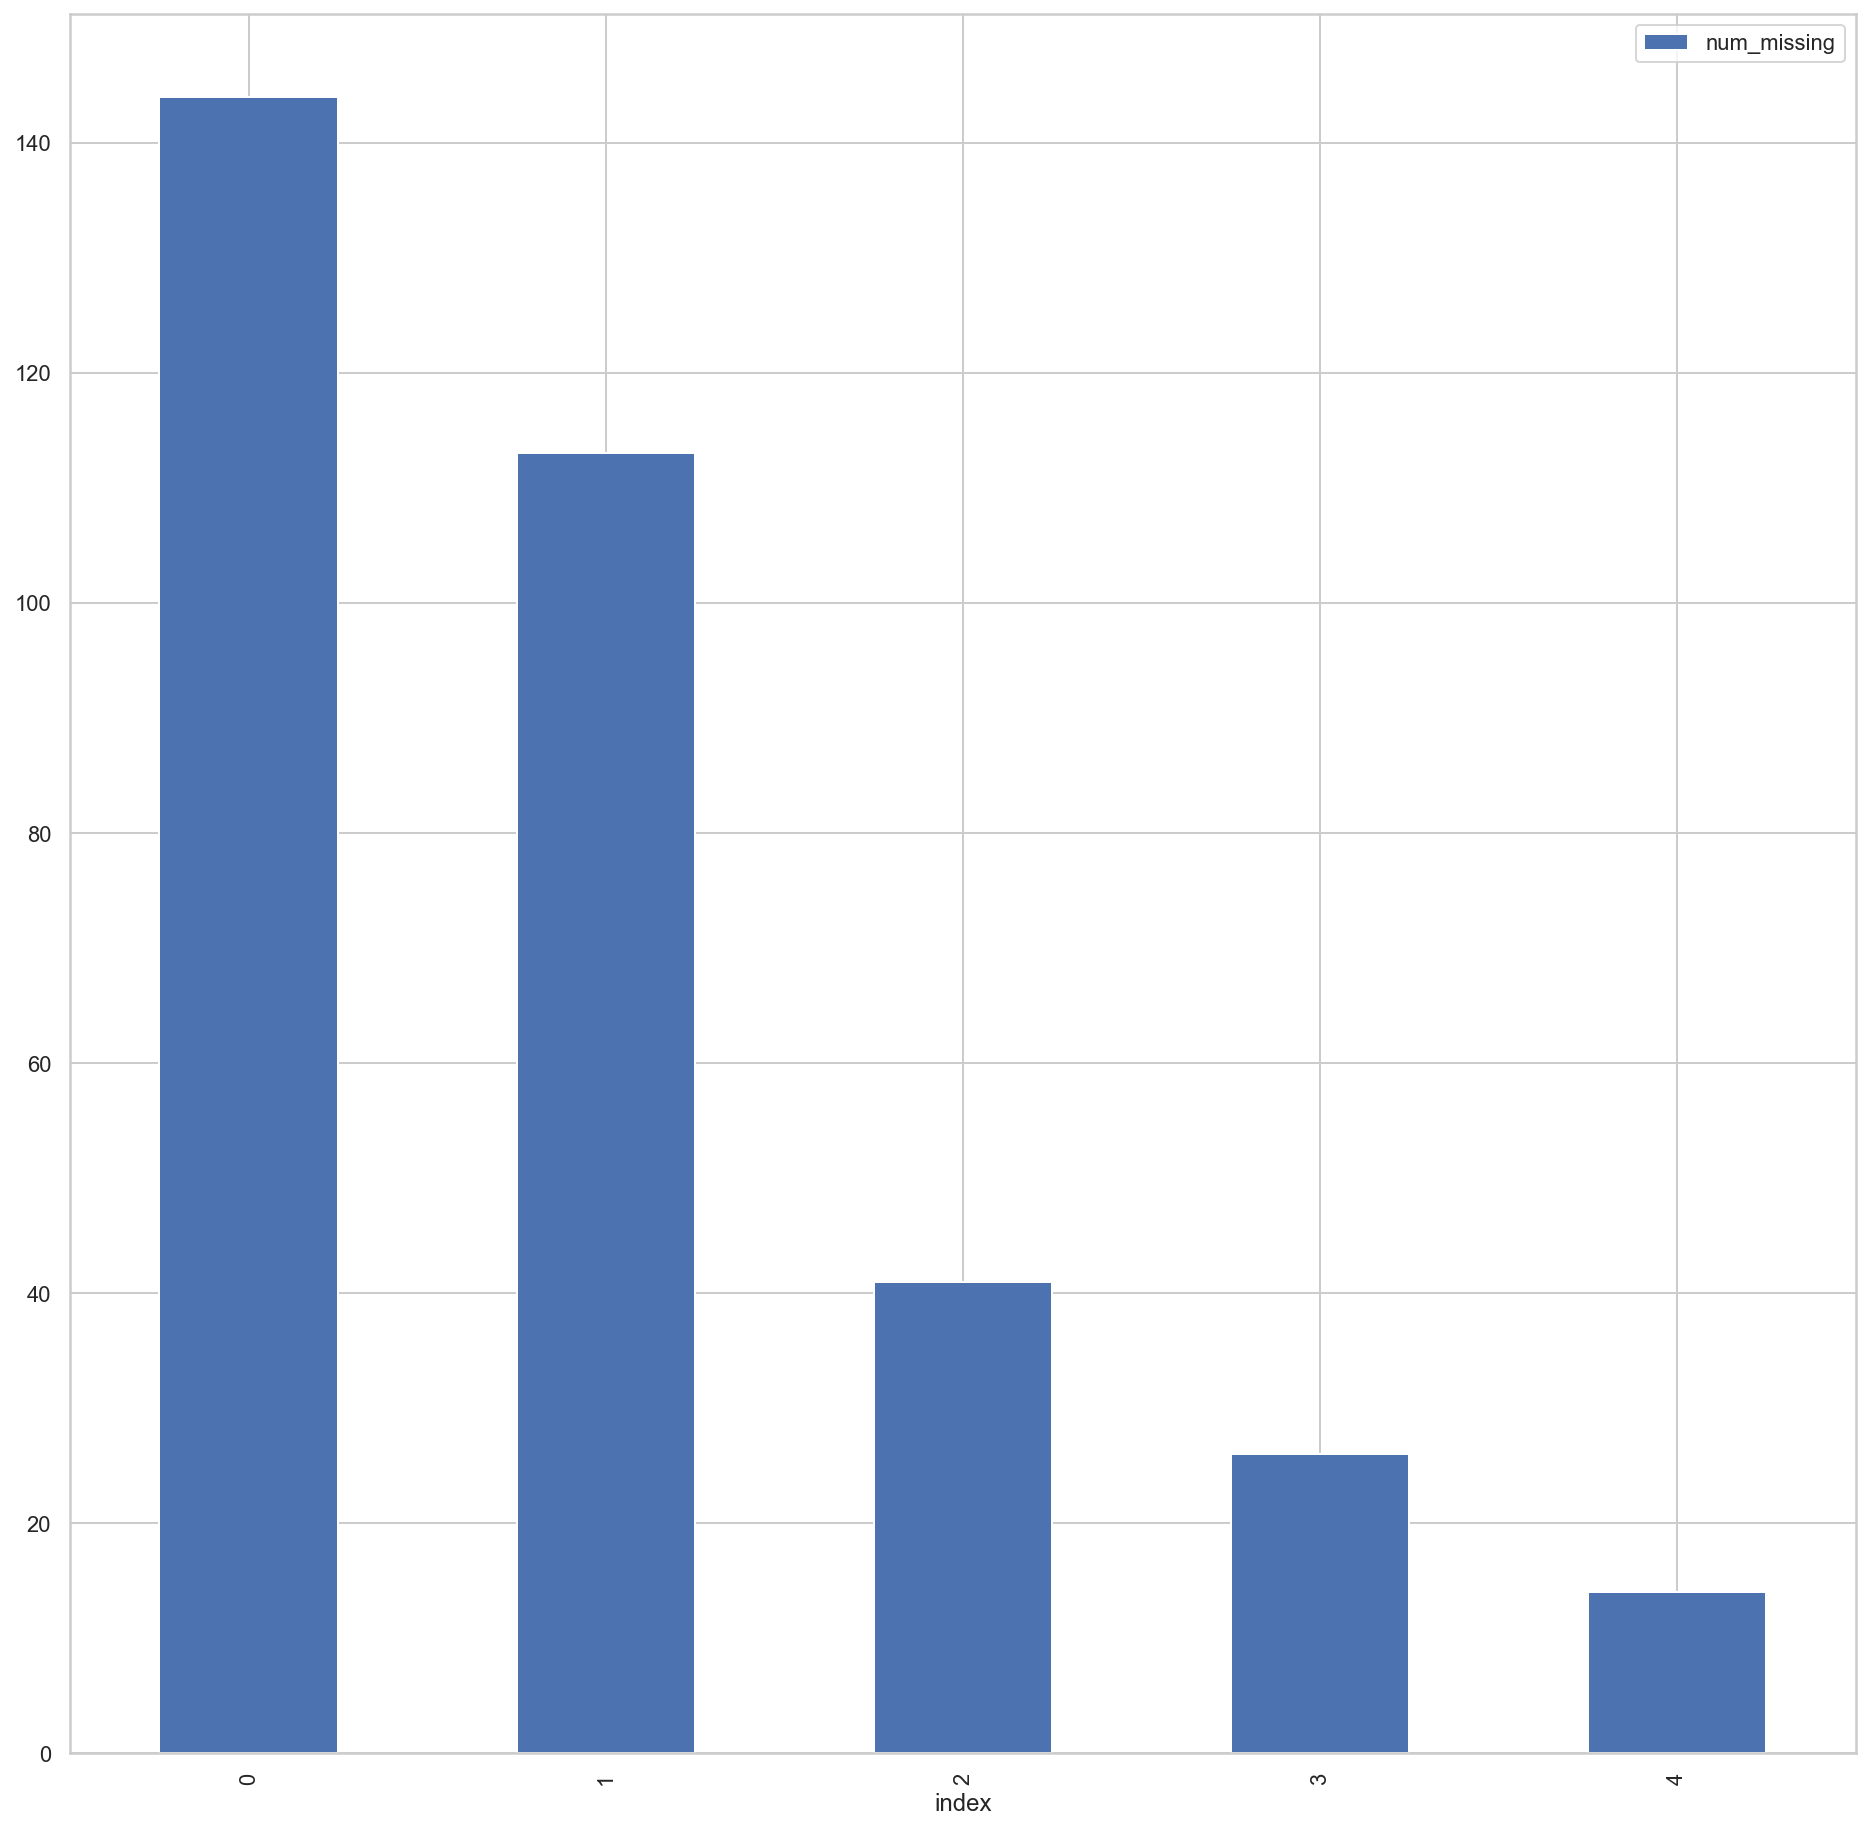

In [63]:
for col in mdft.columns:
    missing = mdft[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        mdft['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in mdft.columns if 'ismissing' in col]
mdft['num_missing'] = mdft[ismissing_cols].sum(axis=1)

mdft['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
mdft.head(10)

In [64]:
# drop rows with missing values.
ind_missing = mdft[mdft['Distance (mi)_ismissing'] == 1].index
mdft_lmr = mdft.drop(ind_missing, axis=0)

ind_missing2 = mdft[mdft['Activity Score_ismissing'] == 1].index
mdft_lmr2 = mdft_lmr.drop(ind_missing2, axis=0)


mdft_lmr2.columns

Index(['Workout_Date', 'Session Subtype', 'Activity Score',
       'Intense Duration (ms)', 'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Steps_y', 'Calories', 'Total Duration (ms)', 'Start Time DTG',
       'End Time DTG', 'day_of_week_start', 'Workout_Month',
       'Workout_Month_Name', 'Active Time (sec)', 'Active Time (min)',
       'Active Time (hour)', 'Active Time (total min)', 'Miles',
       'Distance (mi)', 'Activity Score_ismissing',
       'Intense Duration (ms)_ismissing', 'Moderate Duration (ms)_ismissing',
       'Steps_y_ismissing', 'Distance (mi)_ismissing', 'num_missing'],
      dtype='object')

In [65]:
#I am going to shorten the name of the DF
df2 = mdft_lmr2[['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Active Time (total min)', 'day_of_week_start']]
df2.head(1)

Workout_Date  Distance (mi) Session Subtype  Activity Score  \
5   2022-06-06        4.50165           OTHER            6.24   

   Average Heart Rate (bpm)  Max Heart Rate (bpm)  Steps_x  Calories  \
5                      96.0                 107.0    430.0      67.0   

   Active Time (total min) day_of_week_start  
5                    11.04            Monday

In [66]:
rdf2 = df2[df2['Session Subtype'] == "RUNNING"]
rdf2.head(2)

Workout_Date  Distance (mi) Session Subtype  Activity Score  \
6    2022-06-06        4.50165         RUNNING          100.85   
11   2022-06-05        1.88061         RUNNING           48.85   

    Average Heart Rate (bpm)  Max Heart Rate (bpm)  Steps_x  Calories  \
6                      143.0                 156.0   8185.0     866.0   
11                     147.0                 155.0   3921.0     439.0   

    Active Time (total min) day_of_week_start  
6                     53.75            Monday  
11                    25.88            Sunday

<AxesSubplot:>

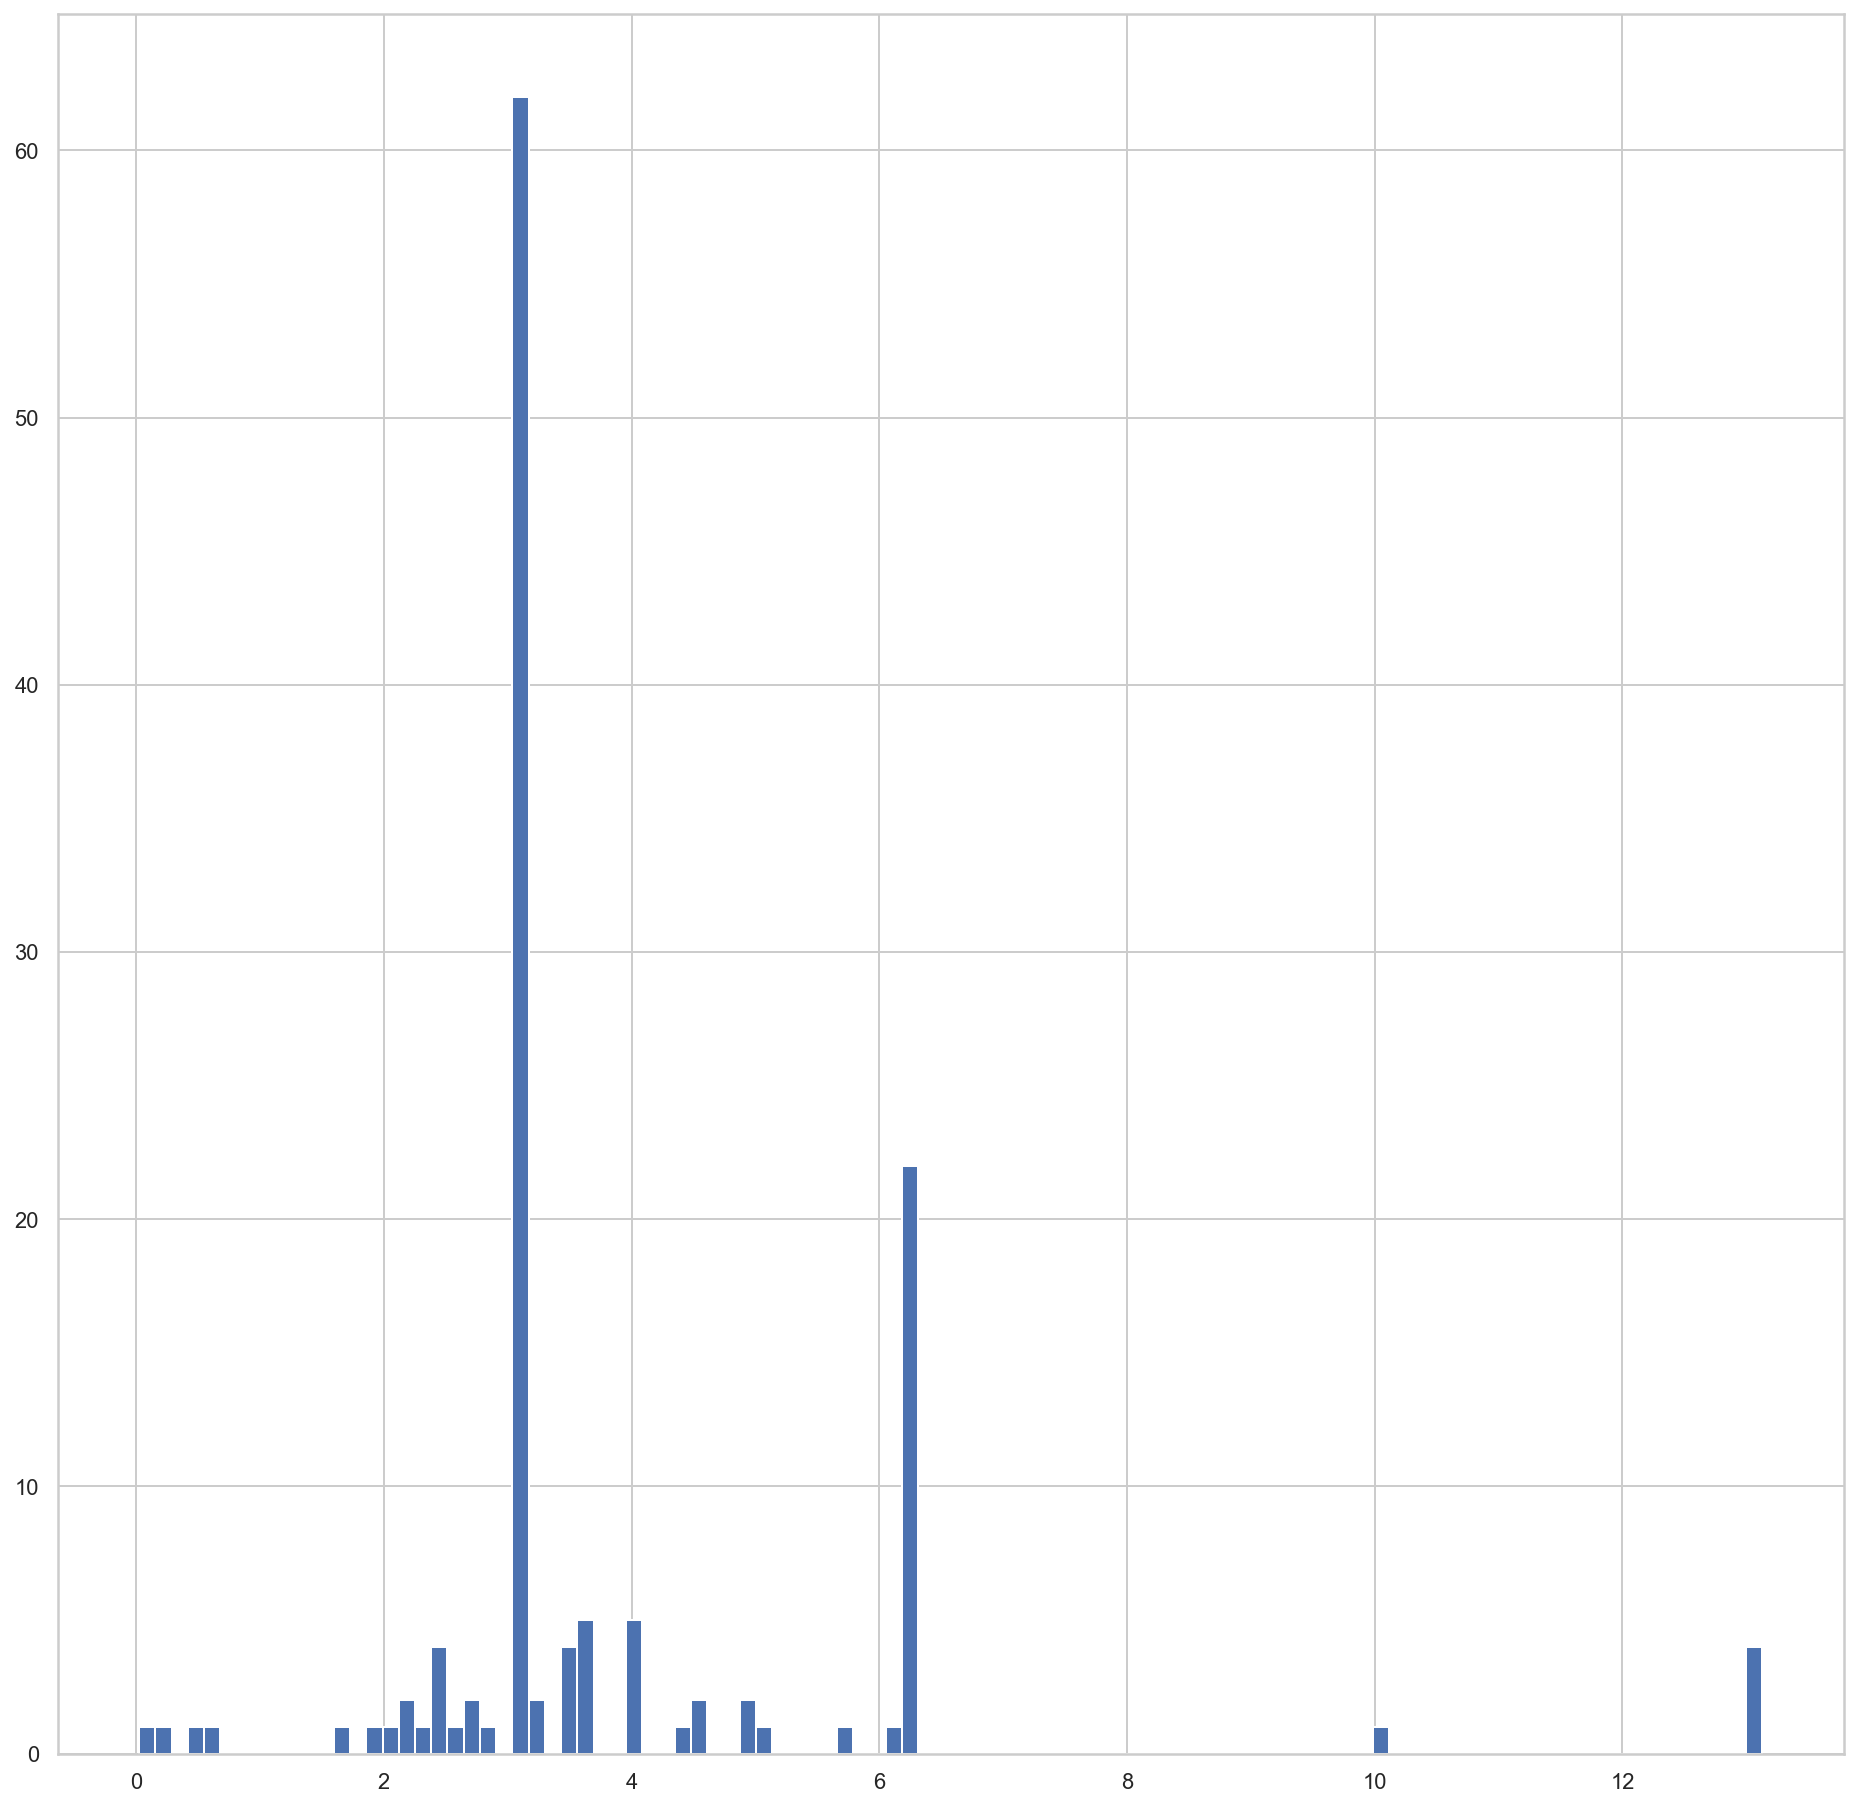

In [67]:
rdf2['Distance (mi)'].hist(bins=100)

In [68]:
#I noticed too many half-marathons in this dataset, so I will visually inspect the DF
pd.set_option('display.max_rows', 8)
rdf2.sort_values(by='Distance (mi)', ascending = False)

Workout_Date  Distance (mi) Session Subtype  Activity Score  \
234   2021-12-05      13.130000         RUNNING           79.44   
236   2021-12-05      13.130000         RUNNING          133.30   
127   2022-03-06      13.100000         RUNNING           27.58   
128   2022-03-06      13.100000         RUNNING          225.86   
..           ...            ...             ...             ...   
105   2022-03-27       0.662913         RUNNING           62.92   
174   2022-01-31       0.440799         RUNNING           44.01   
94    2022-04-03       0.251156         RUNNING          132.54   
169   2022-02-02       0.024211         RUNNING           61.03   

     Average Heart Rate (bpm)  Max Heart Rate (bpm)  Steps_x  Calories  \
234                     145.0                 162.0   6448.0     749.0   
236                     153.0                 165.0  10440.0    1161.0   
127                     148.0                 167.0   2075.0     263.0   
128                     159.0                 173.0  17055.0    2060.0   
..                        ...                   ...      ...       ...   
105                     150.0                 170.0   5142.0     538.0   
174                     149.0                 172.0   3382.0     387.0   
94                      159.0                 174.0  10553.0    1317.0   
169                     140.0                 160.0   4961.0     530.0   

     Active Time (total min) day_of_week_start  
234                    47.22            Sunday  
236                    68.38            Sunday  
127                    15.79            Sunday  
128                   113.93            Sunday  
..                       ...               ...  
105                    33.87            Sunday  
174                    24.92            Monday  
94                     68.54            Sunday  
169                    36.09         Wednesday  

[131 rows x 10 columns]

In [69]:
rdf2.drop_duplicates(subset ="Workout_Date",
                     keep = False, inplace = True)
rdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 6 to 337
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              83 non-null     object 
 1   Distance (mi)             83 non-null     float64
 2   Session Subtype           83 non-null     object 
 3   Activity Score            83 non-null     float64
 4   Average Heart Rate (bpm)  83 non-null     float64
 5   Max Heart Rate (bpm)      83 non-null     float64
 6   Steps_x                   83 non-null     float64
 7   Calories                  83 non-null     float64
 8   Active Time (total min)   83 non-null     float64
 9   day_of_week_start         83 non-null     object 
dtypes: float64(7), object(3)
memory usage: 7.1+ KB


<AxesSubplot:>

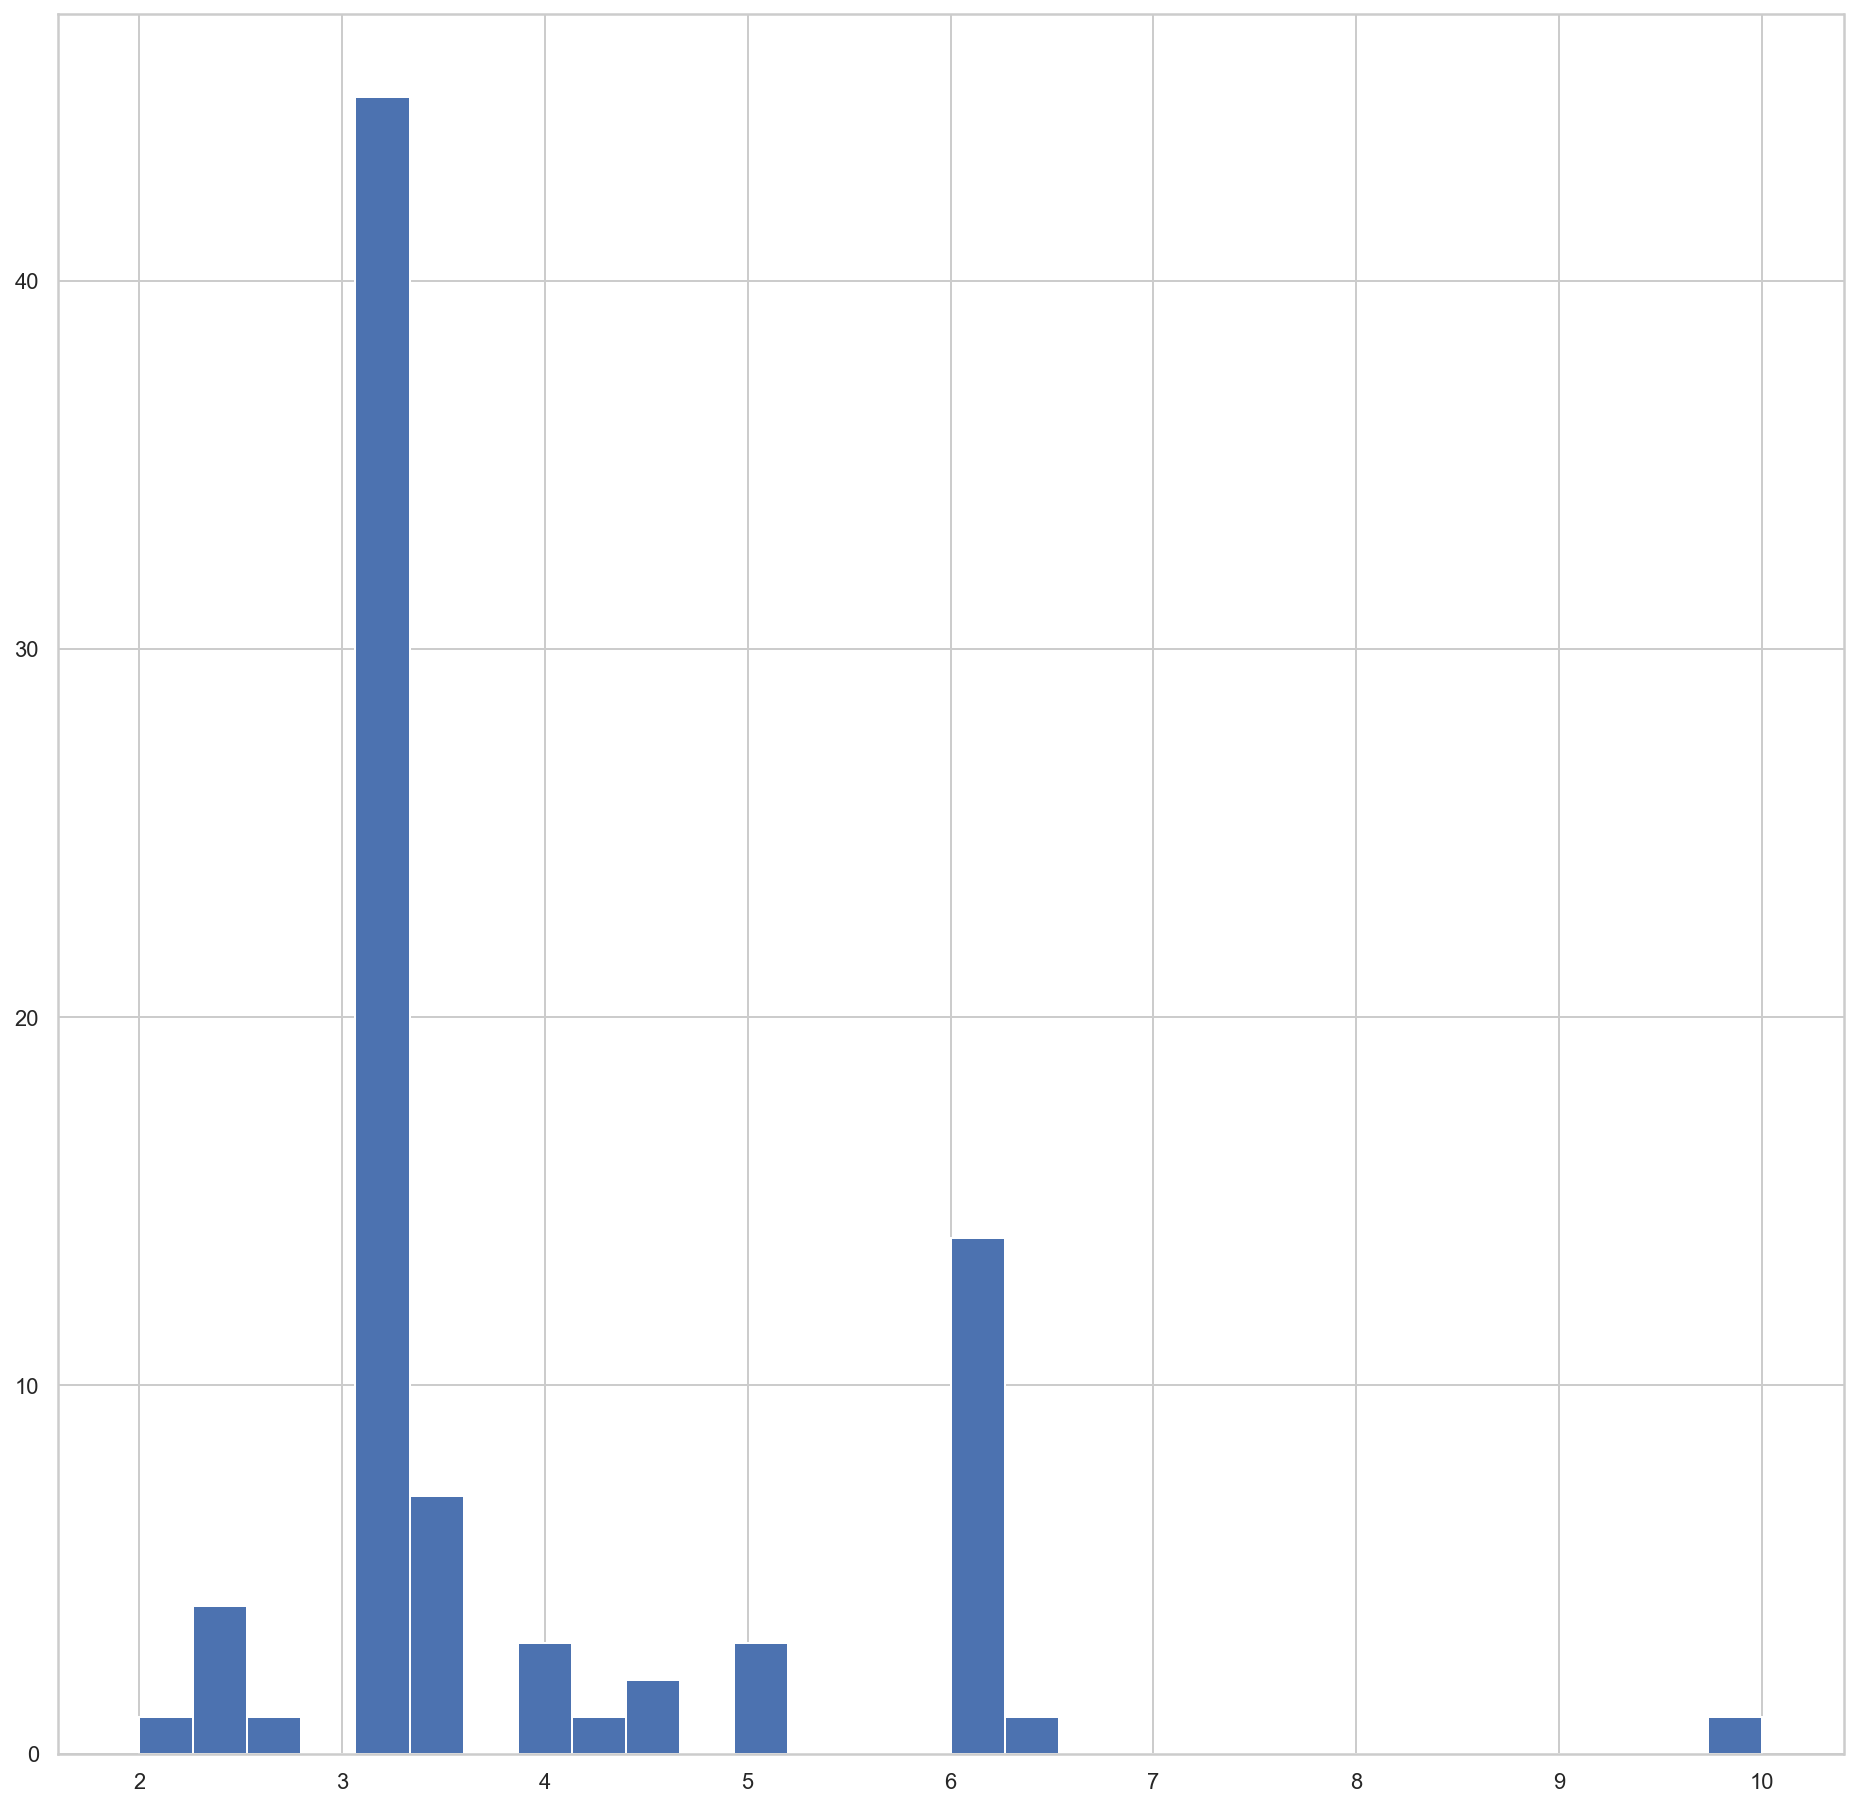

In [70]:
rdf2['Distance (mi)'].hist(bins=30)

## Double Checking my Join

In [71]:
# merged = pd.merge(df,mmr_df,on=['Workout_Date'], how='outer').drop_duplicates()
# merged.info()
# merged.columns

In [72]:
# merged2 = merged[['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
#        'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
#        'Calories', 'day_of_week_start', 'Local Start Time DTG',
#        'Local End Time DTG', 'Local Start Time', 'Local End Time',
#        'Active Time (total min)']]

In [73]:
# merged2.info()
# merged2.sort_values(by='Workout_Date', ascending = False)


In [74]:
# mrg3 = merged2.drop_duplicates()
# mrg4 = mrg3.dropna()
# mrg4.info()

## EDA

Now that I have cleaned and merged my dataframes, I will explore the data

In [75]:
rdf2.columns

Index(['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Active Time (total min)', 'day_of_week_start'],
      dtype='object')

<AxesSubplot:xlabel='Workout_Date'>

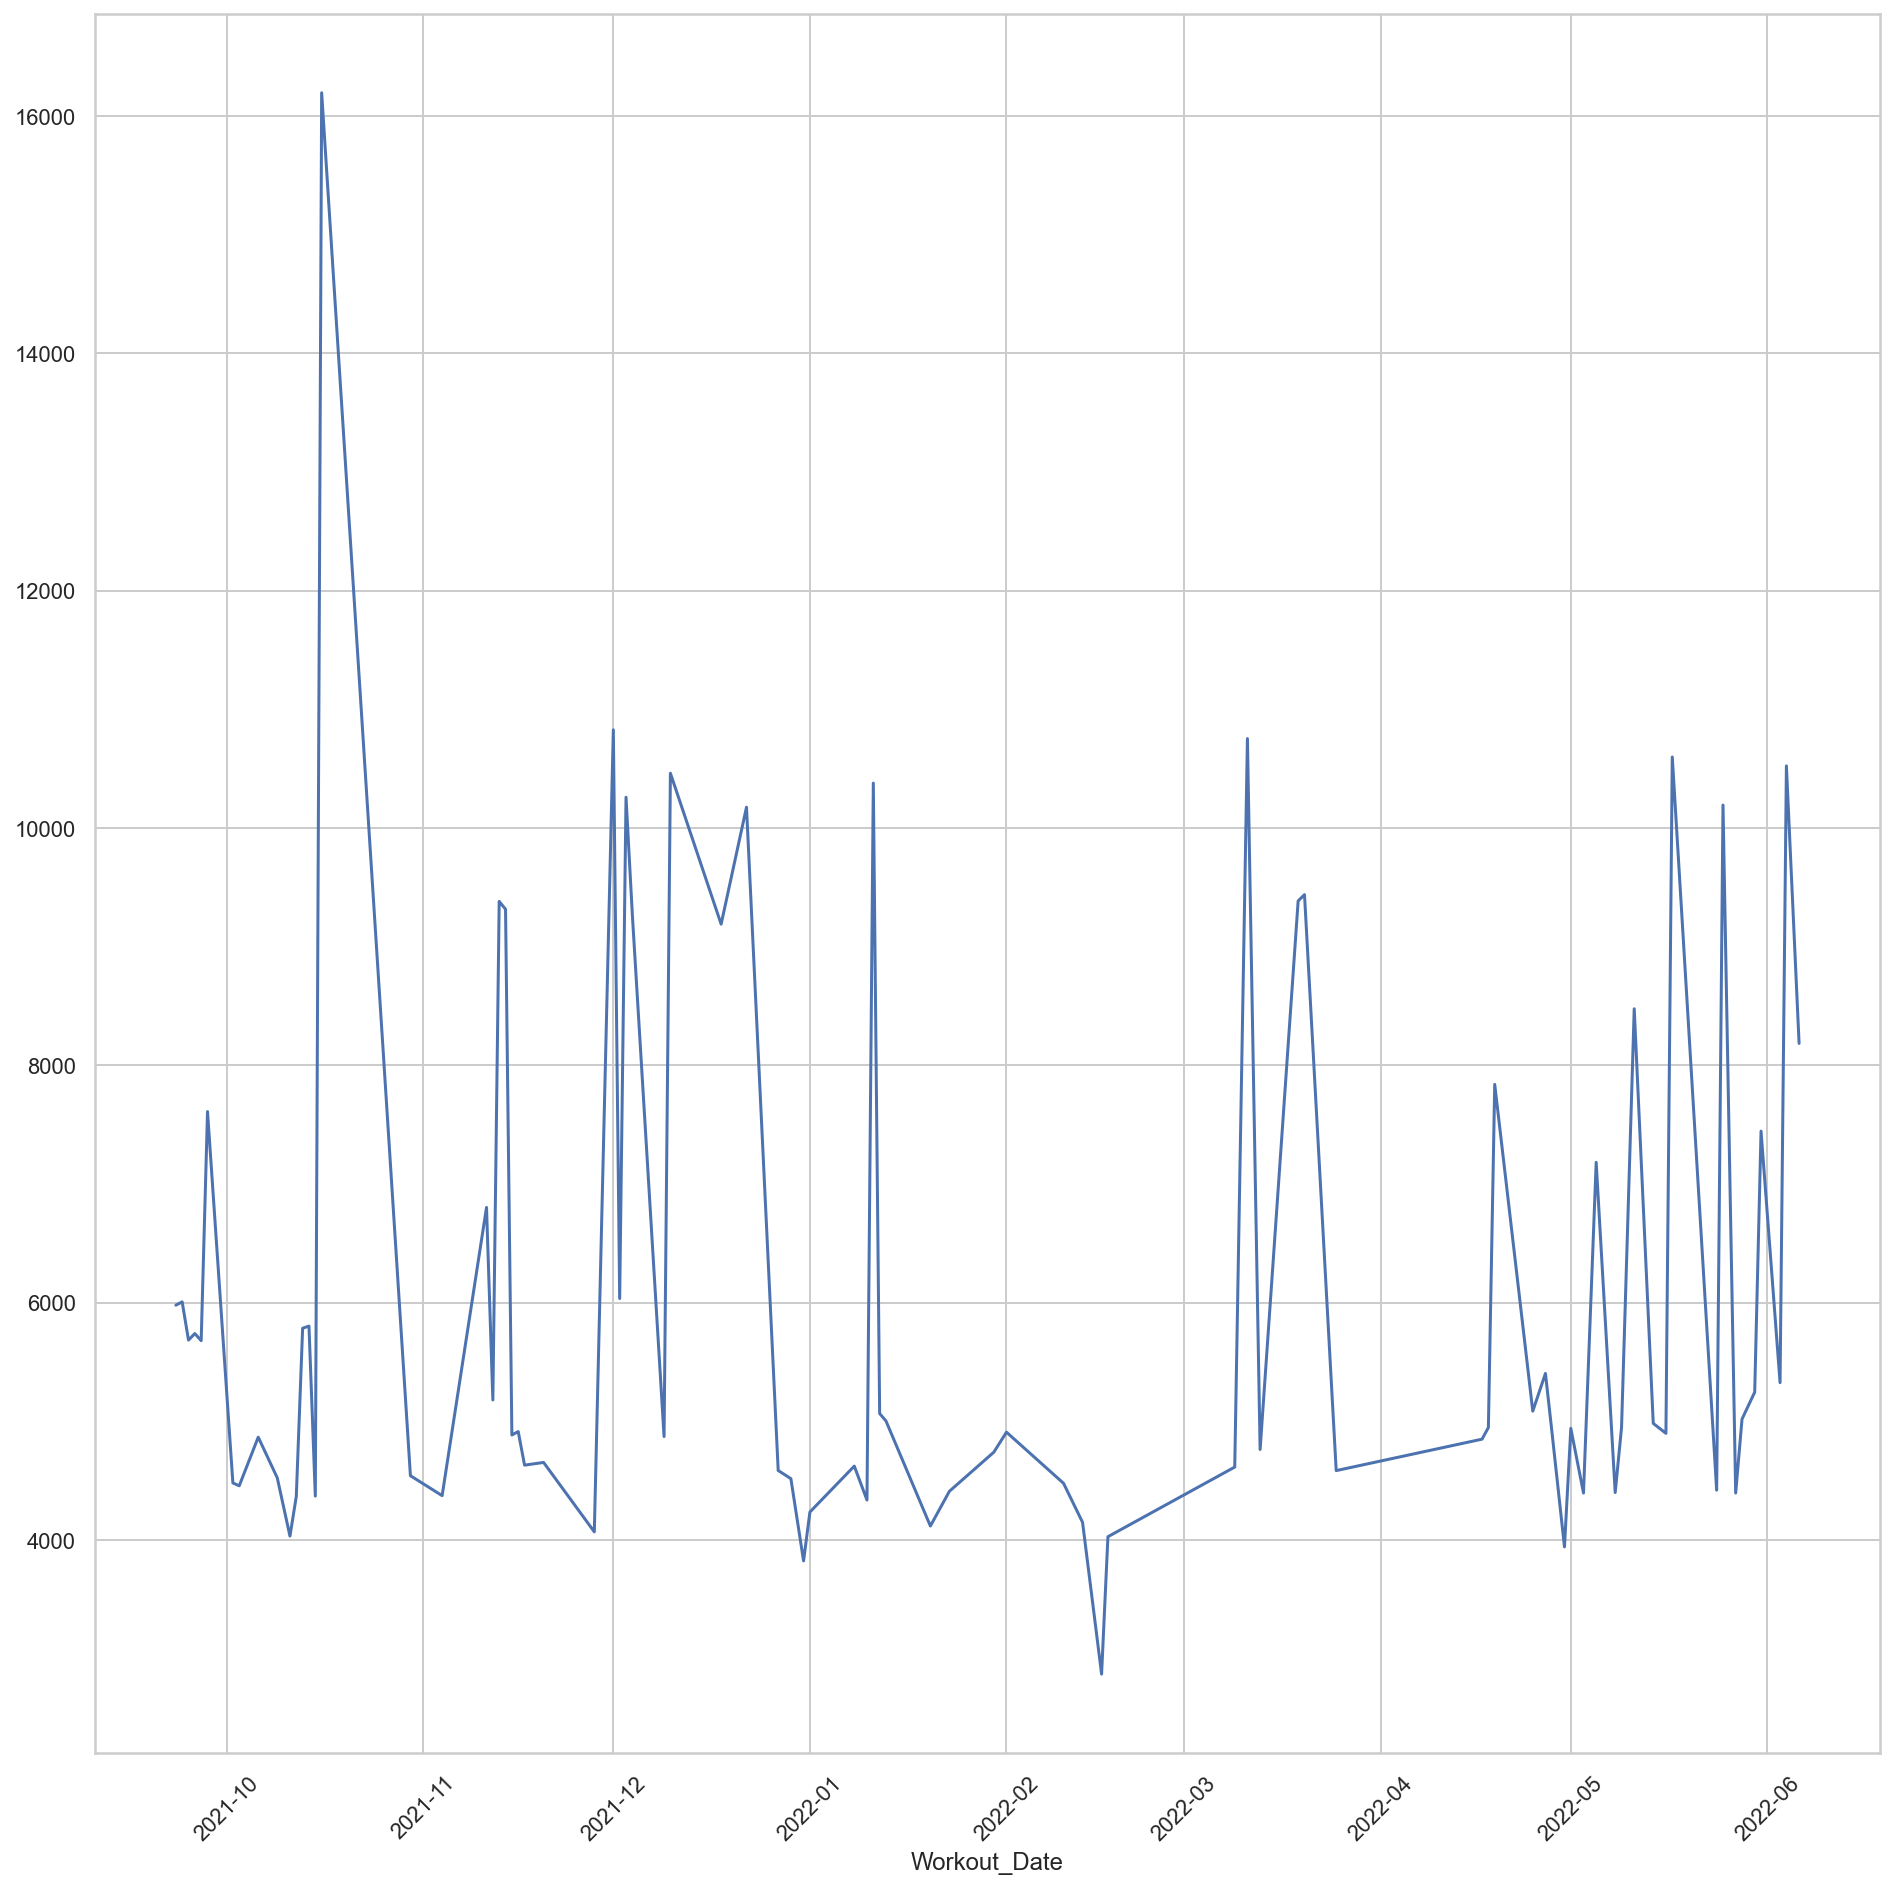

In [76]:
# show data with a mask filter (running only)
mask1 = rdf2['Session Subtype'] == 'RUNNING'
(
    rdf2[mask1]
    .set_index('Workout_Date')
    ['Steps_x']
    .plot(rot = 45)
)

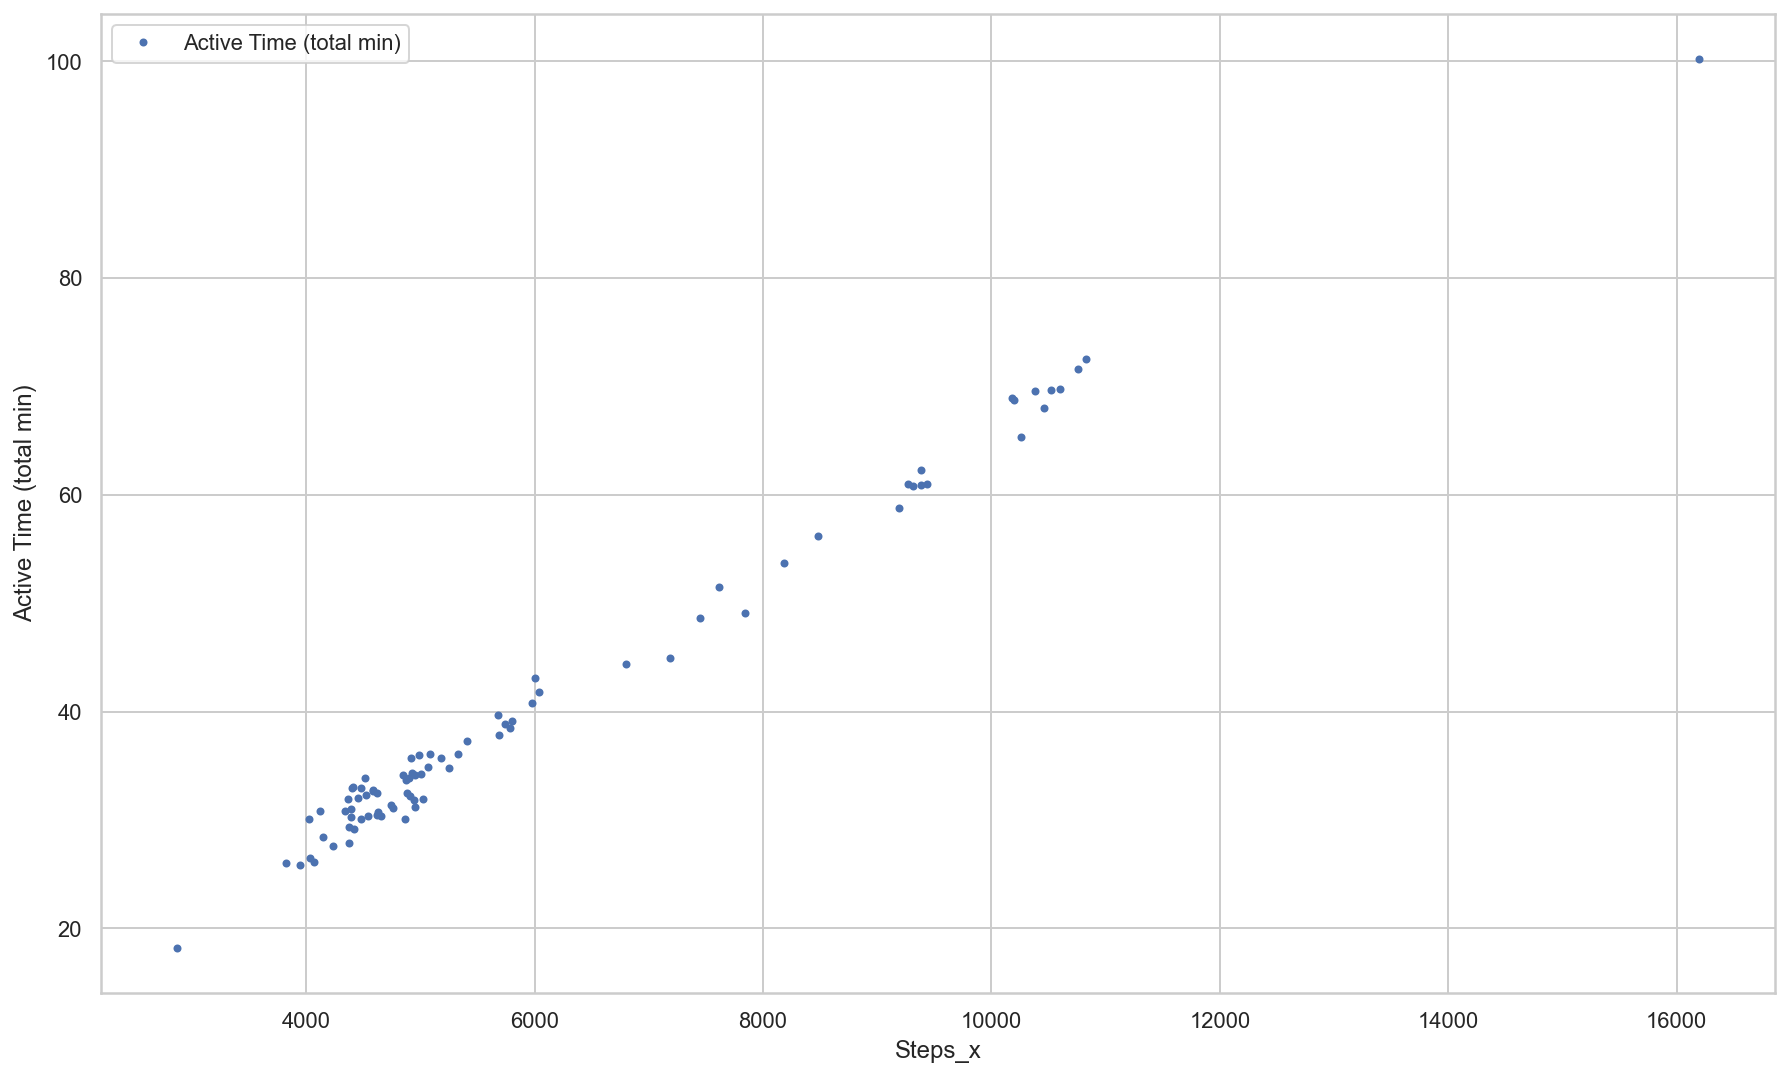

In [77]:
#scatter plotting my steps against my total minutes
axes = rdf2.plot(x='Steps_x', y='Active Time (total min)', style='.',figsize=(15,9))
y_label = axes.set_ylabel('Active Time (total min)')

In [78]:
rdf2.corr()

Distance (mi)  Activity Score  \
Distance (mi)                  1.000000        0.983670   
Activity Score                 0.983670        1.000000   
Average Heart Rate (bpm)       0.259454        0.233852   
Max Heart Rate (bpm)           0.268055        0.259713   
Steps_x                        0.981250        0.998015   
Calories                       0.938975        0.957629   
Active Time (total min)        0.971086        0.995611   

                          Average Heart Rate (bpm)  Max Heart Rate (bpm)  \
Distance (mi)                             0.259454              0.268055   
Activity Score                            0.233852              0.259713   
Average Heart Rate (bpm)                  1.000000              0.895758   
Max Heart Rate (bpm)                      0.895758              1.000000   
Steps_x                                   0.233327              0.259676   
Calories                                  0.339176              0.353758   
Active Time (total min)                   0.194316              0.242995   

                           Steps_x  Calories  Active Time (total min)  
Distance (mi)             0.981250  0.938975                 0.971086  
Activity Score            0.998015  0.957629                 0.995611  
Average Heart Rate (bpm)  0.233327  0.339176                 0.194316  
Max Heart Rate (bpm)      0.259676  0.353758                 0.242995  
Steps_x                   1.000000  0.957550                 0.994770  
Calories                  0.957550  1.000000                 0.952995  
Active Time (total min)   0.994770  0.952995                 1.000000

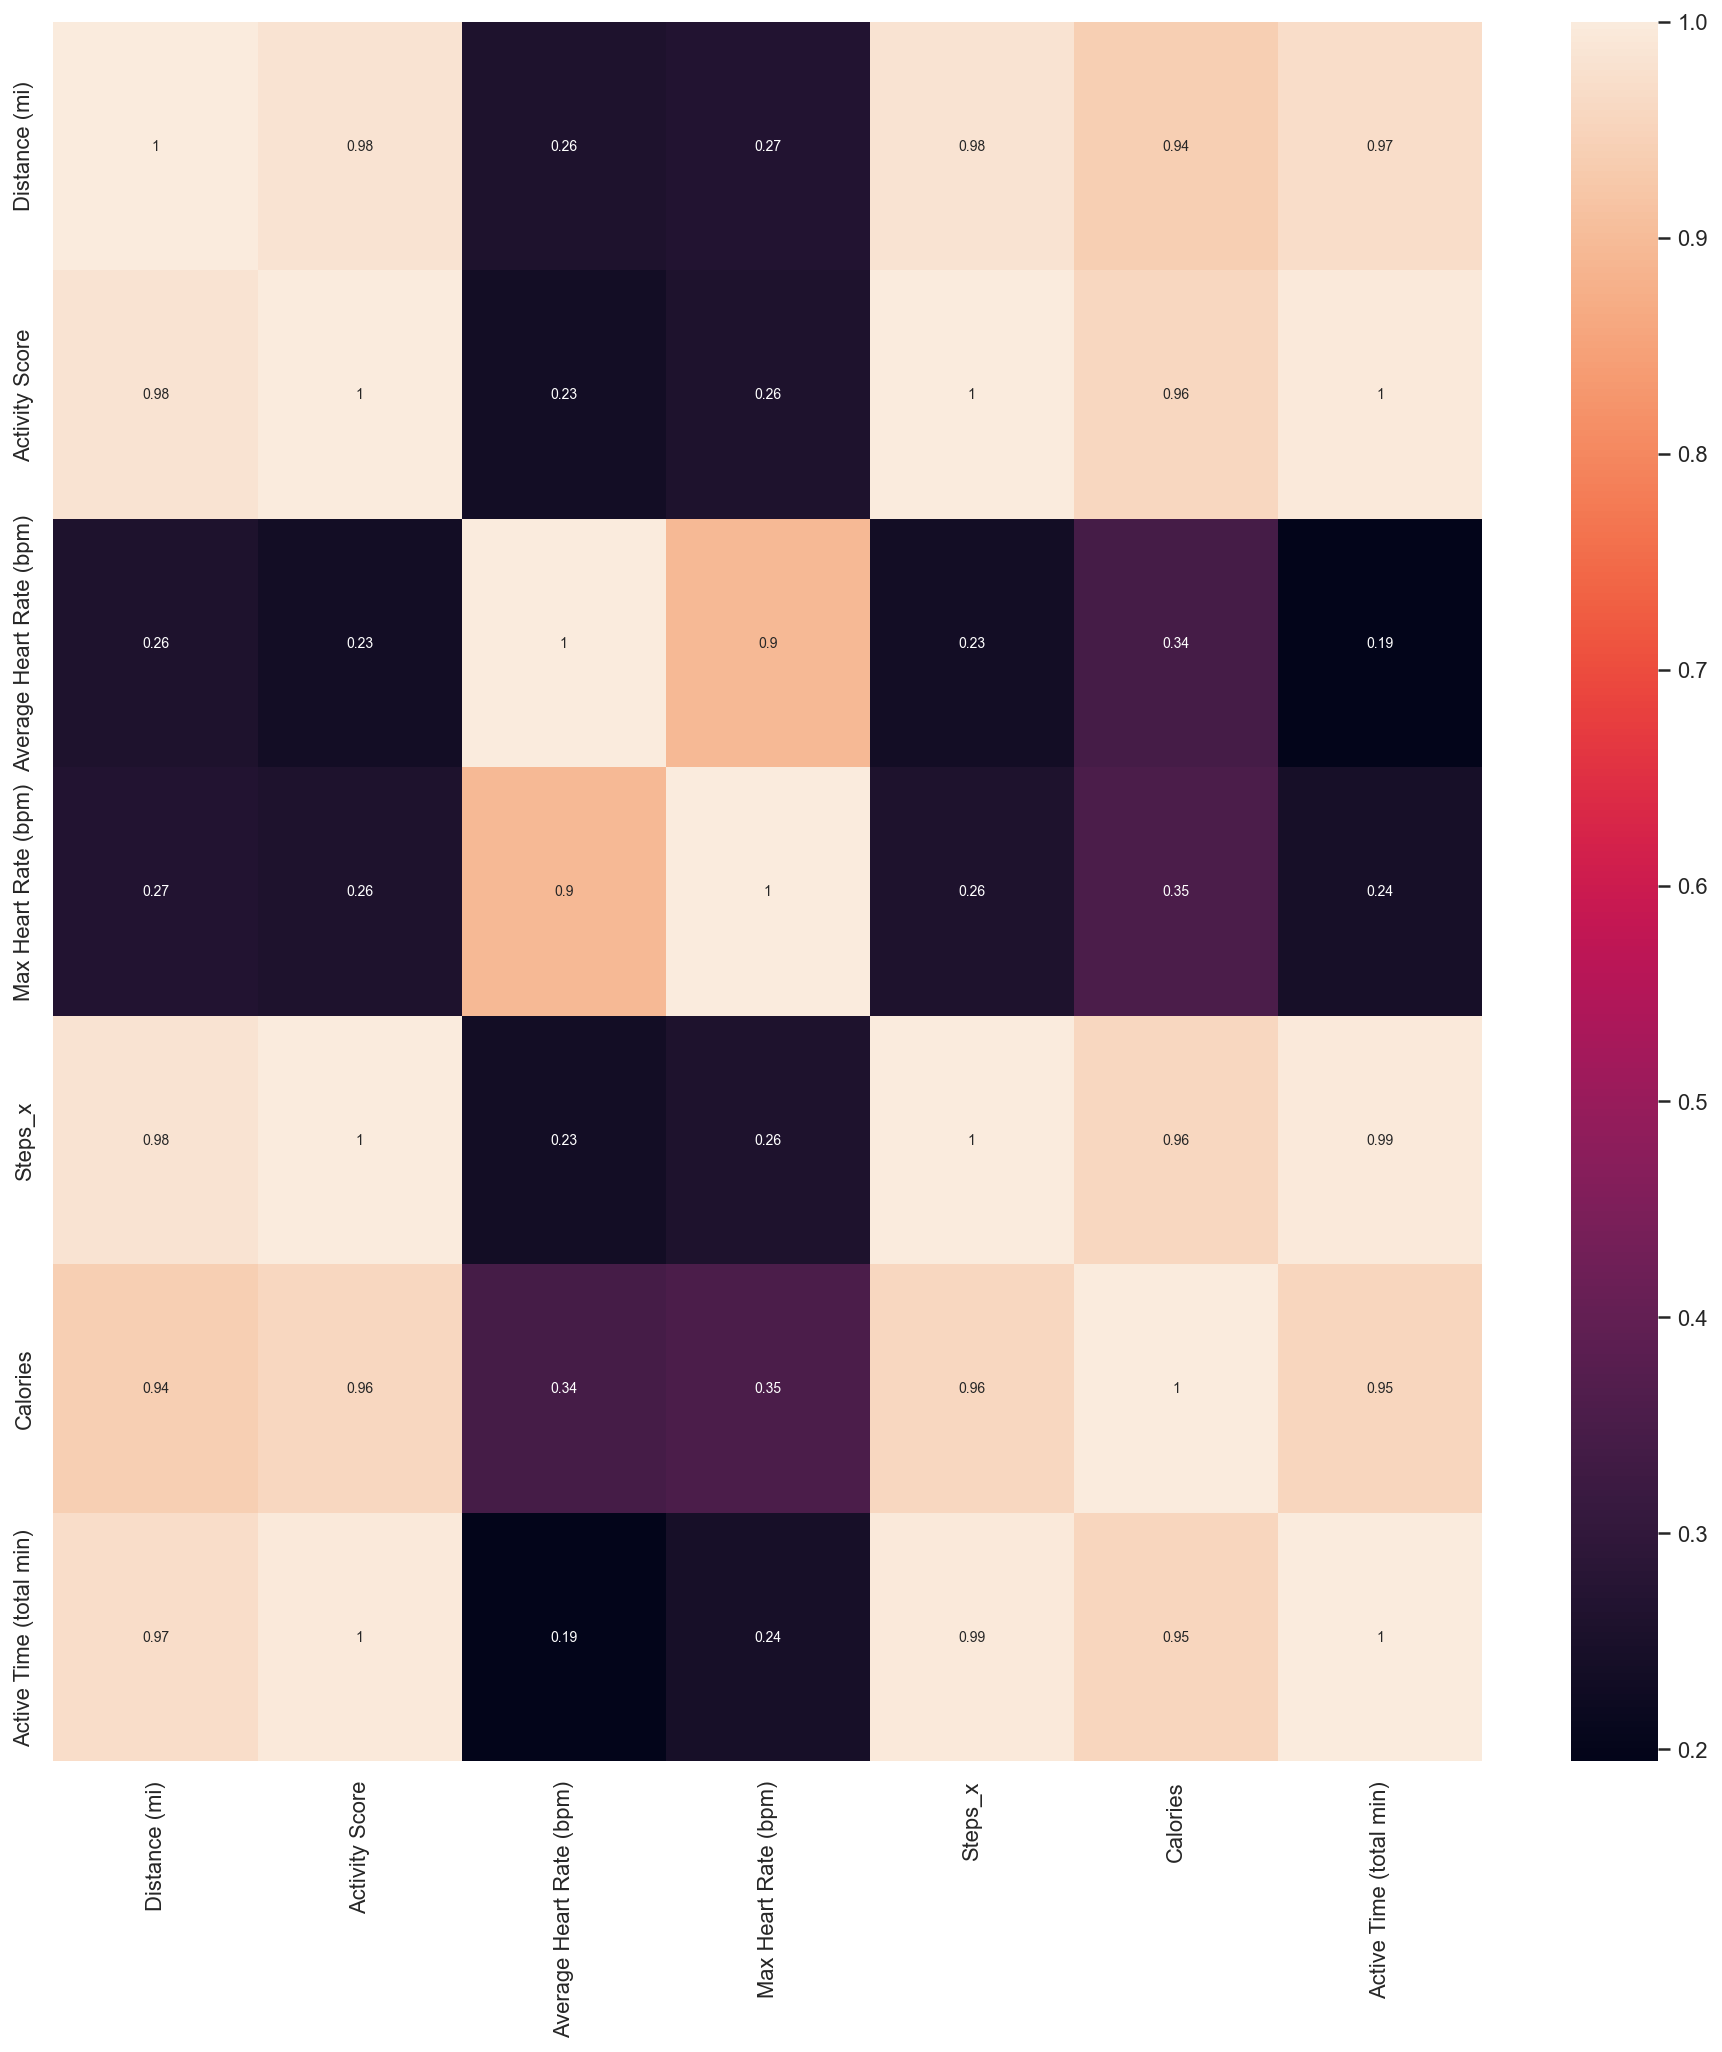

In [79]:
p1 = sns.heatmap(
    rdf2
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)


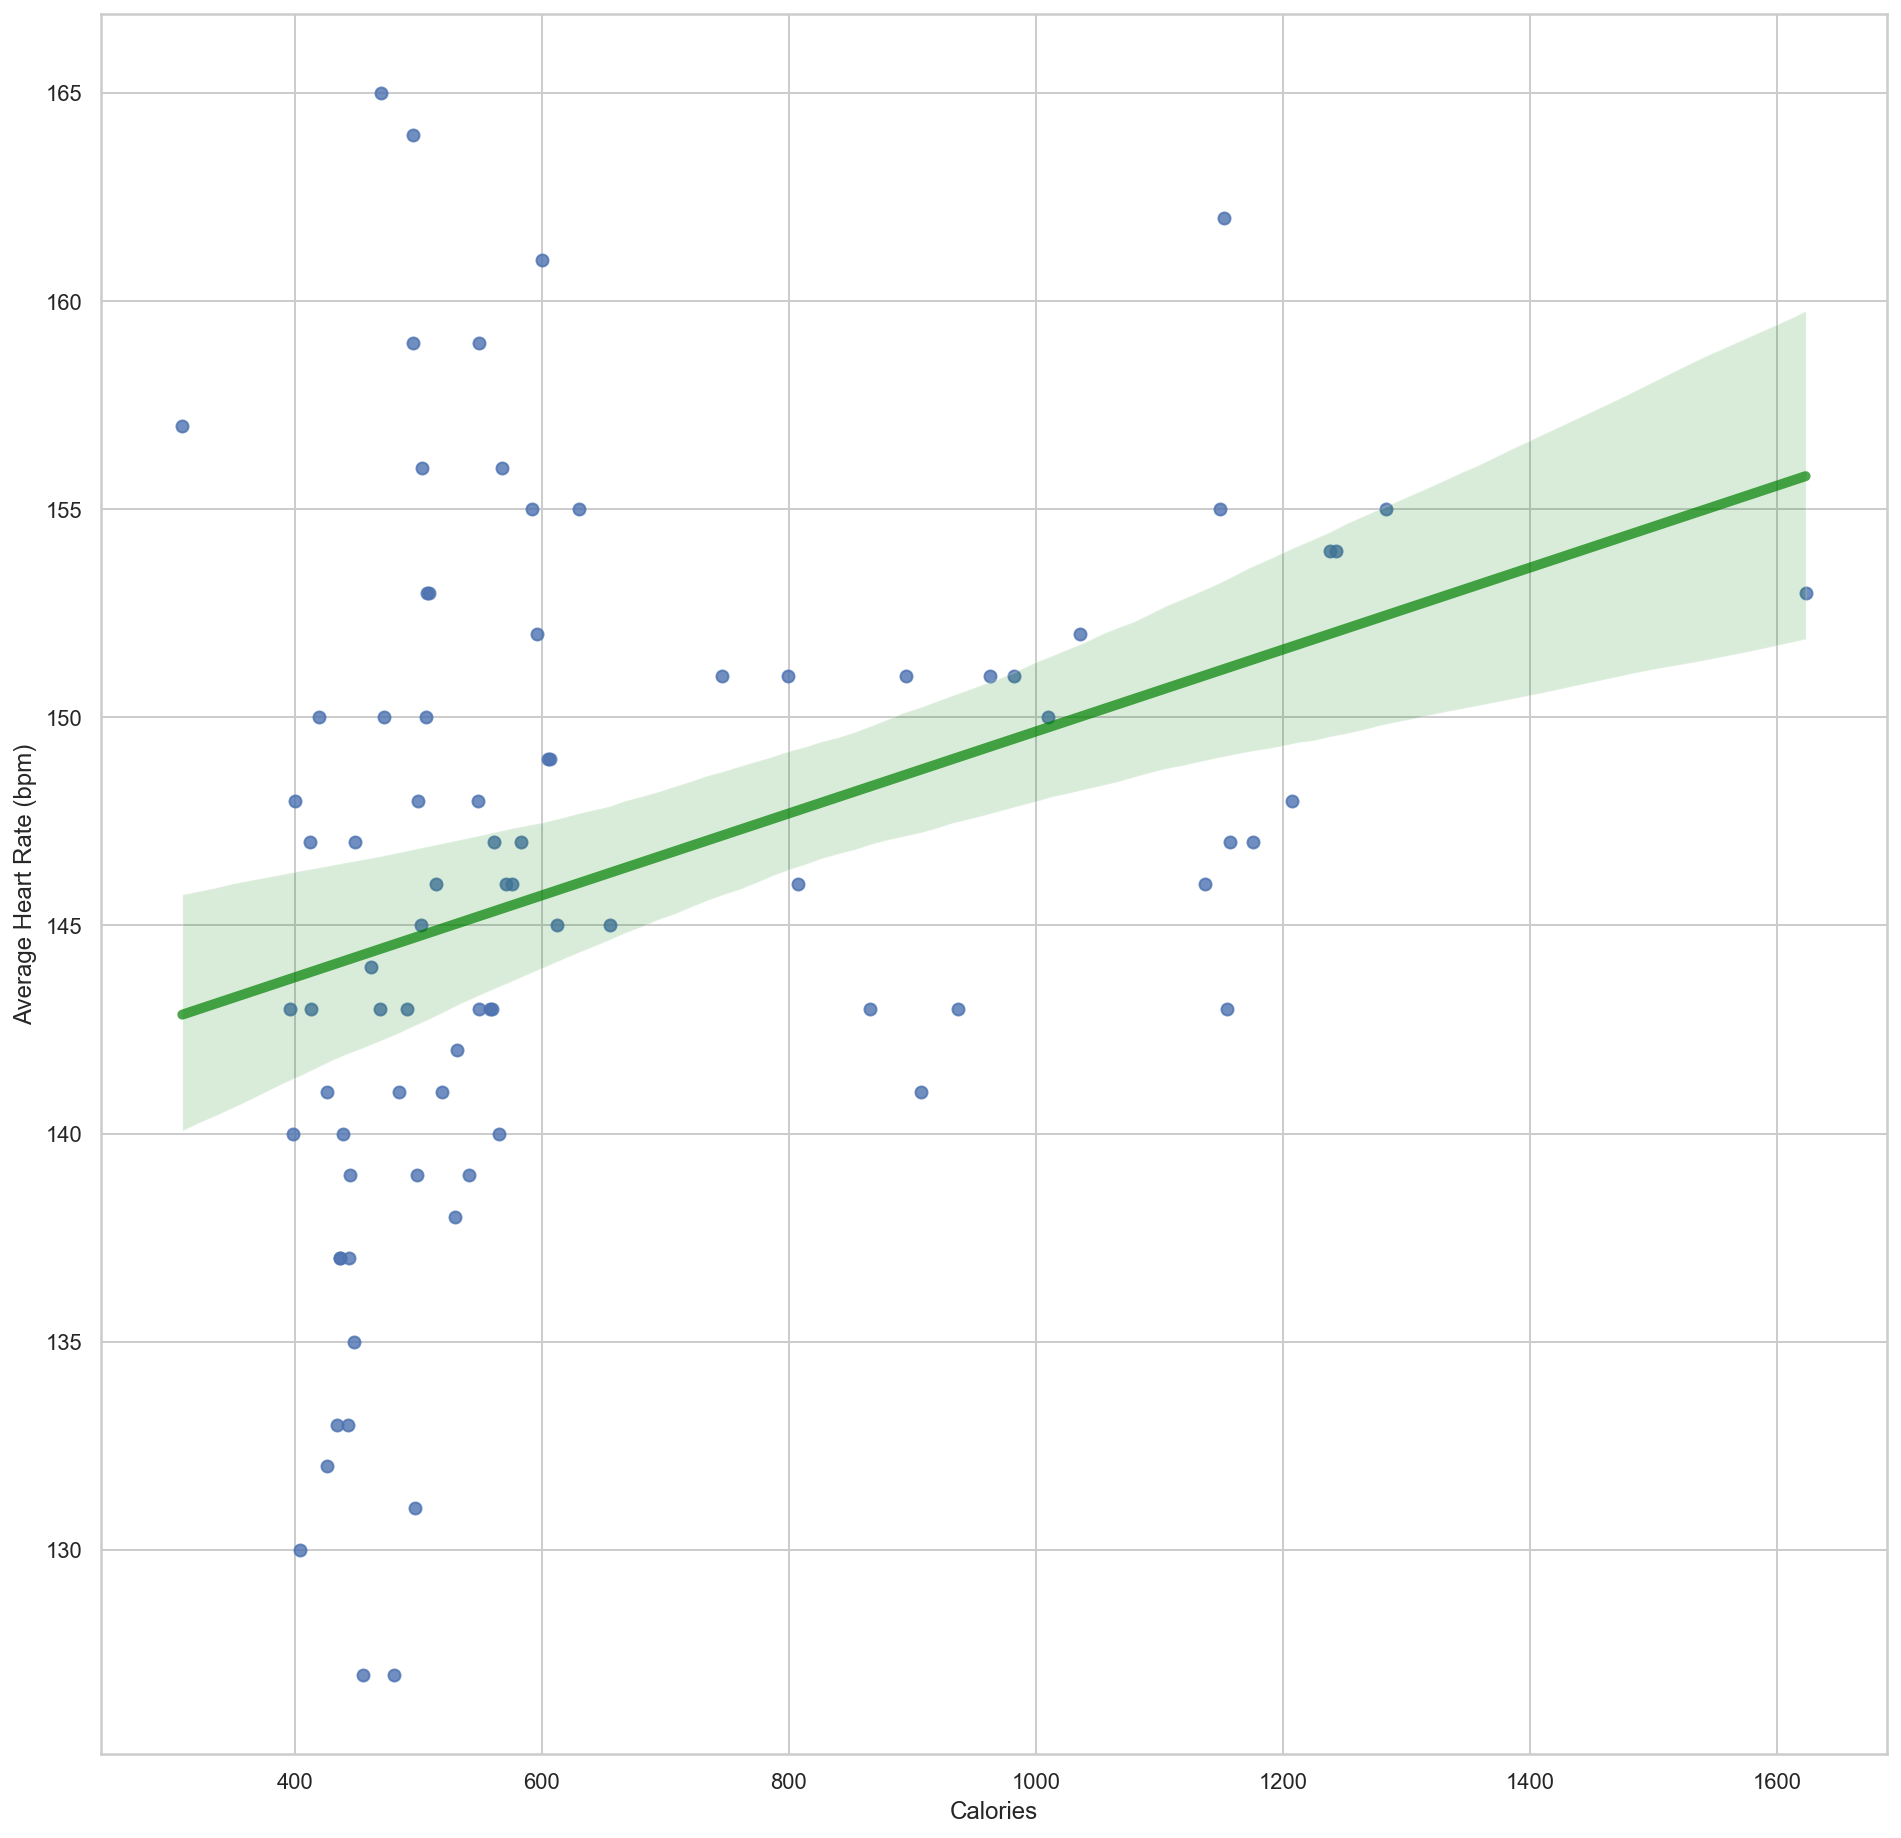

In [80]:
# Calories & Heart Rate
sns.regplot(x=rdf2["Calories"], y=rdf2["Average Heart Rate (bpm)"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

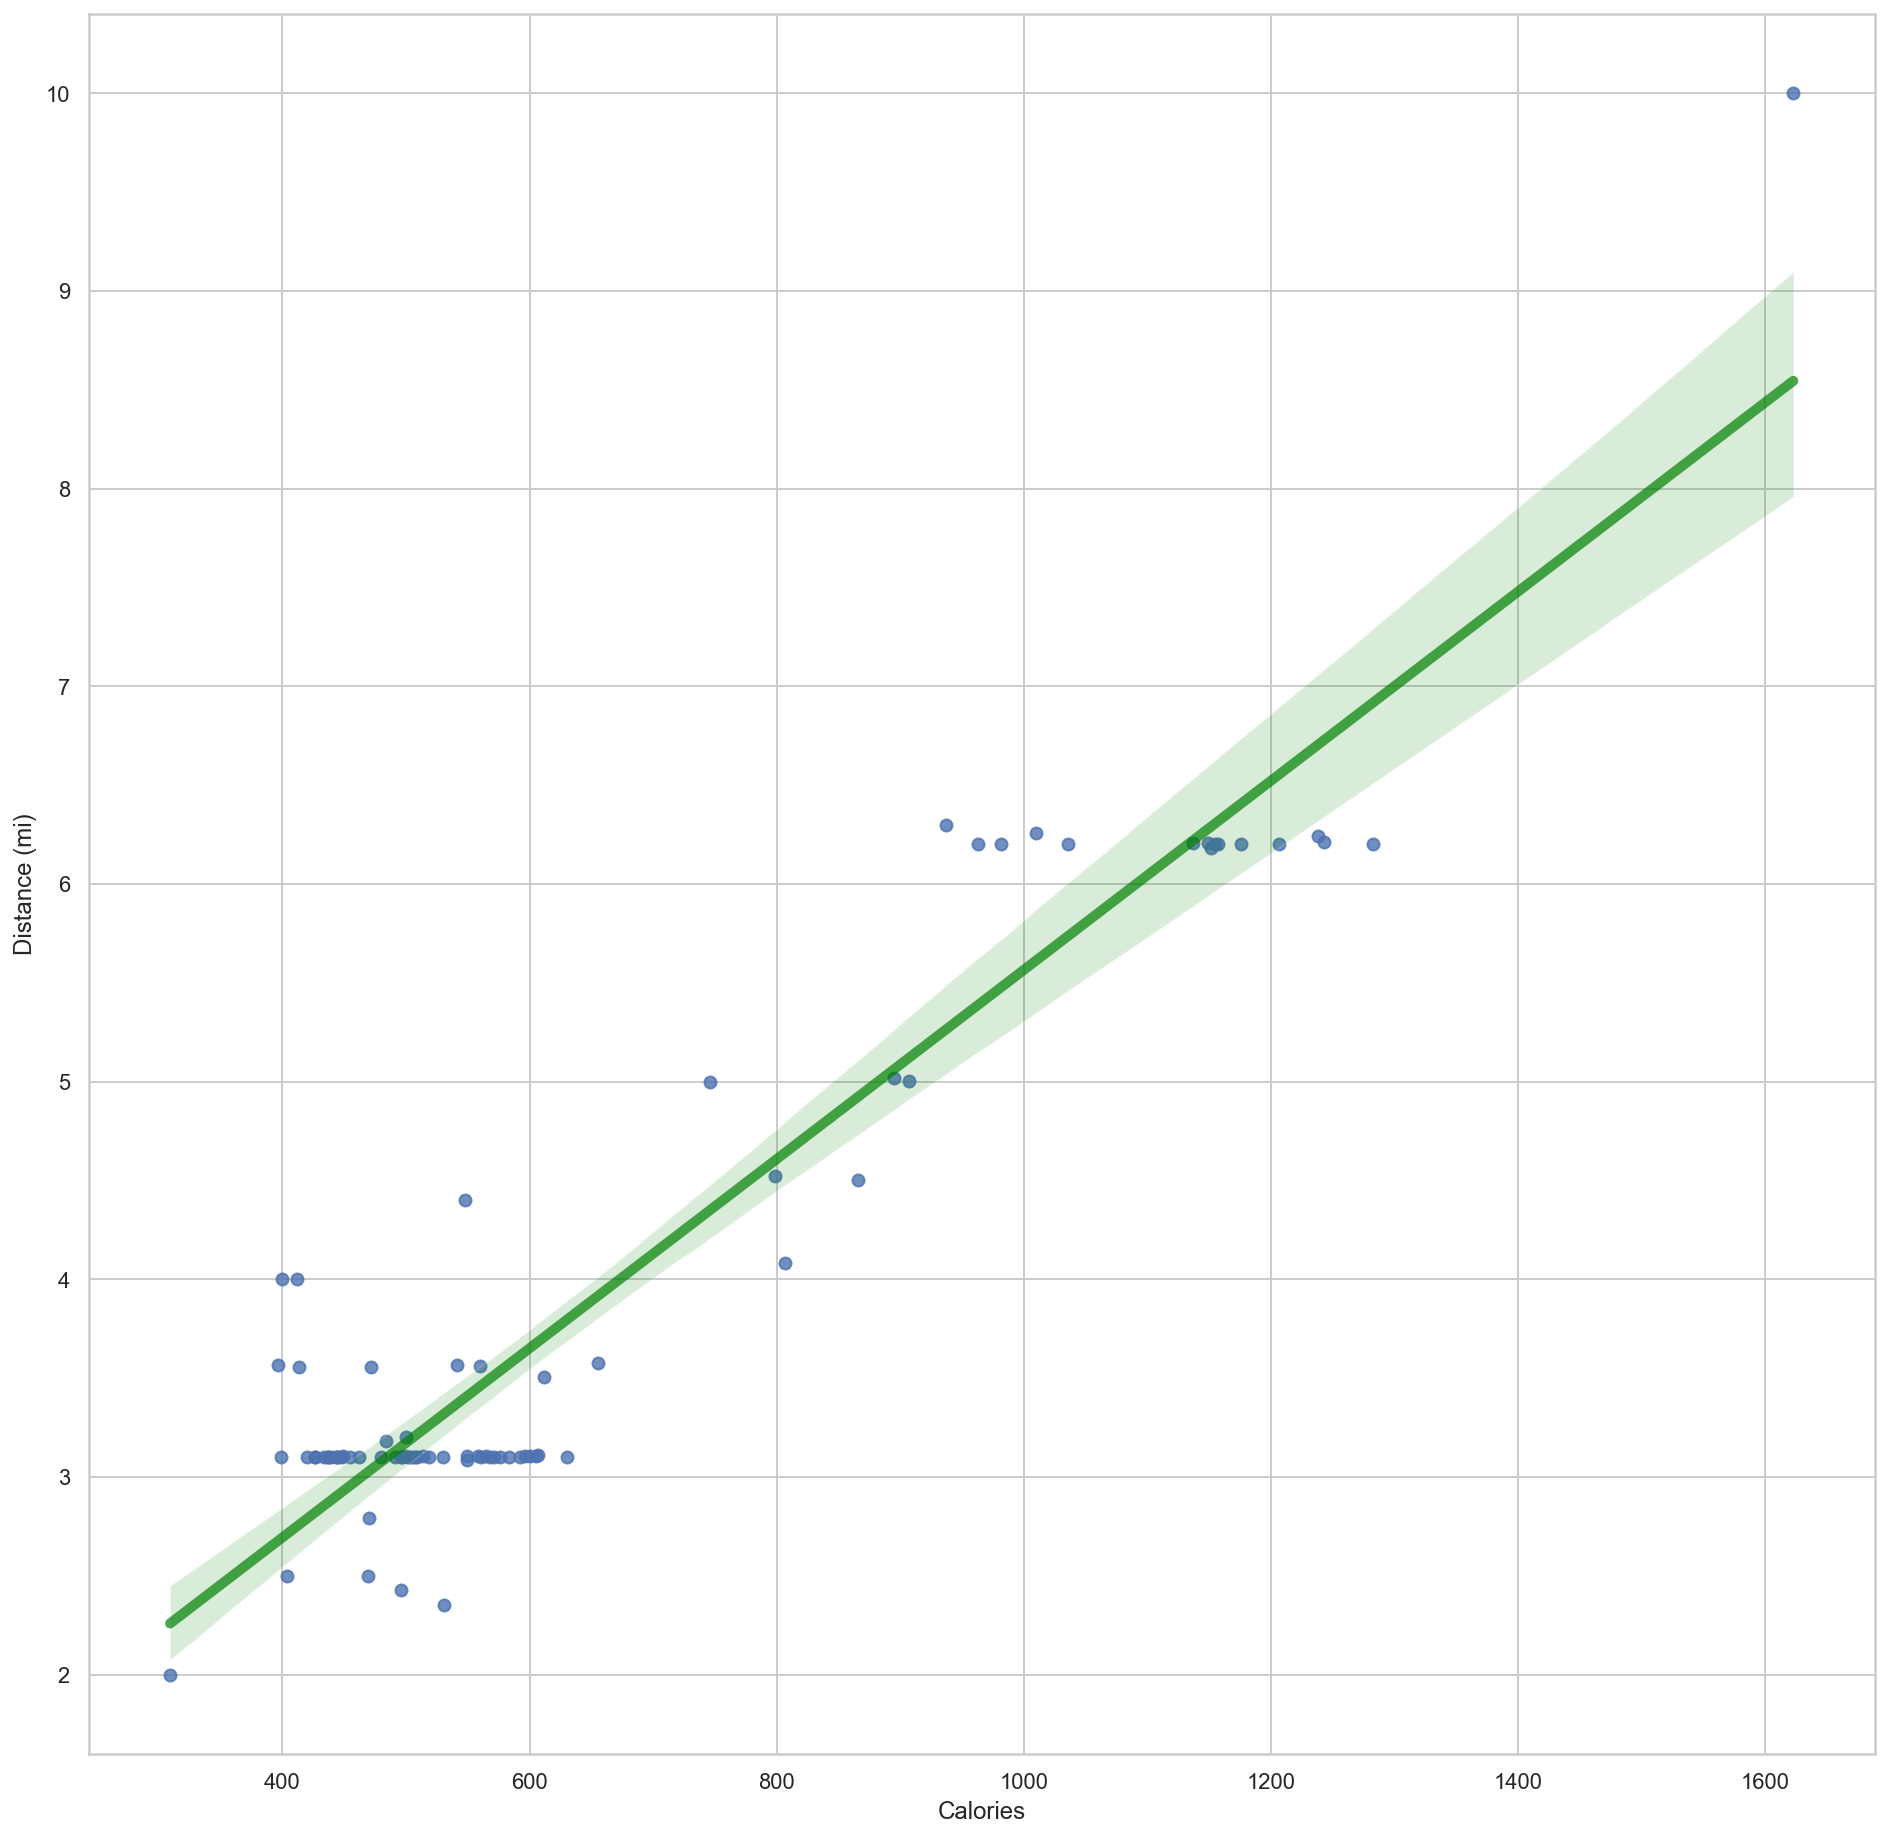

In [81]:
#Calories & Distance
sns.regplot(x=rdf2["Calories"], y=rdf2["Distance (mi)"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

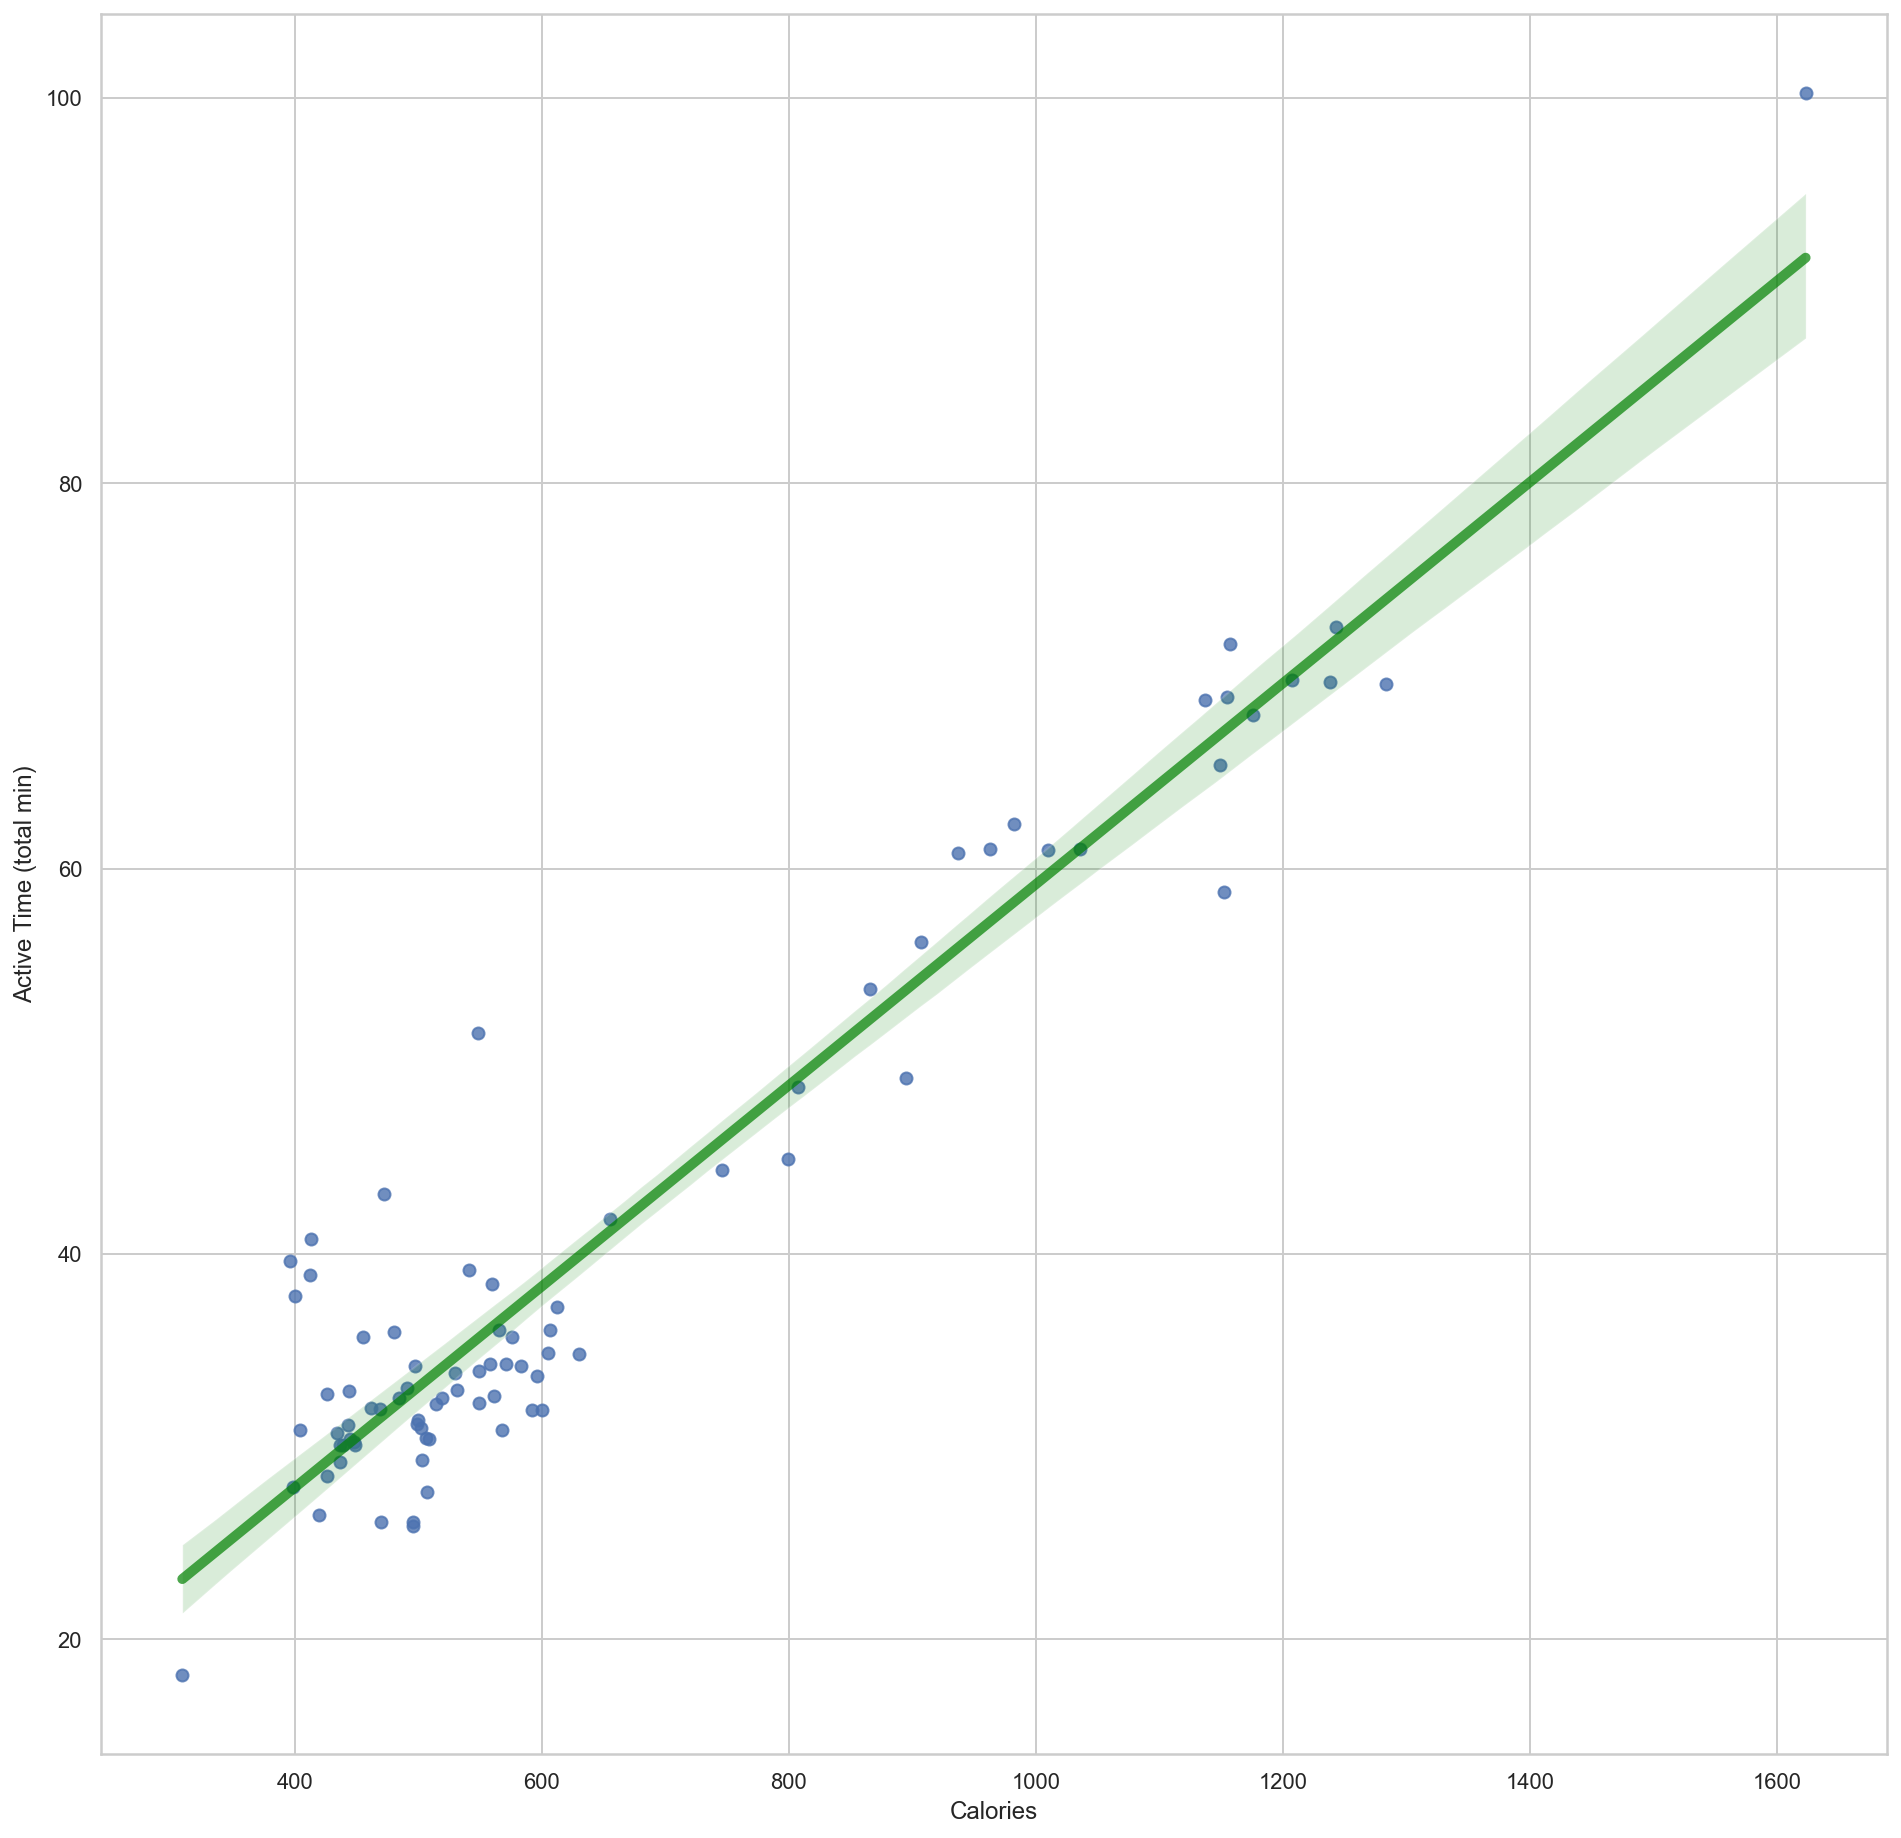

In [82]:
#Minutes & Steps
sns.regplot(x=rdf2["Calories"], y=rdf2["Active Time (total min)"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

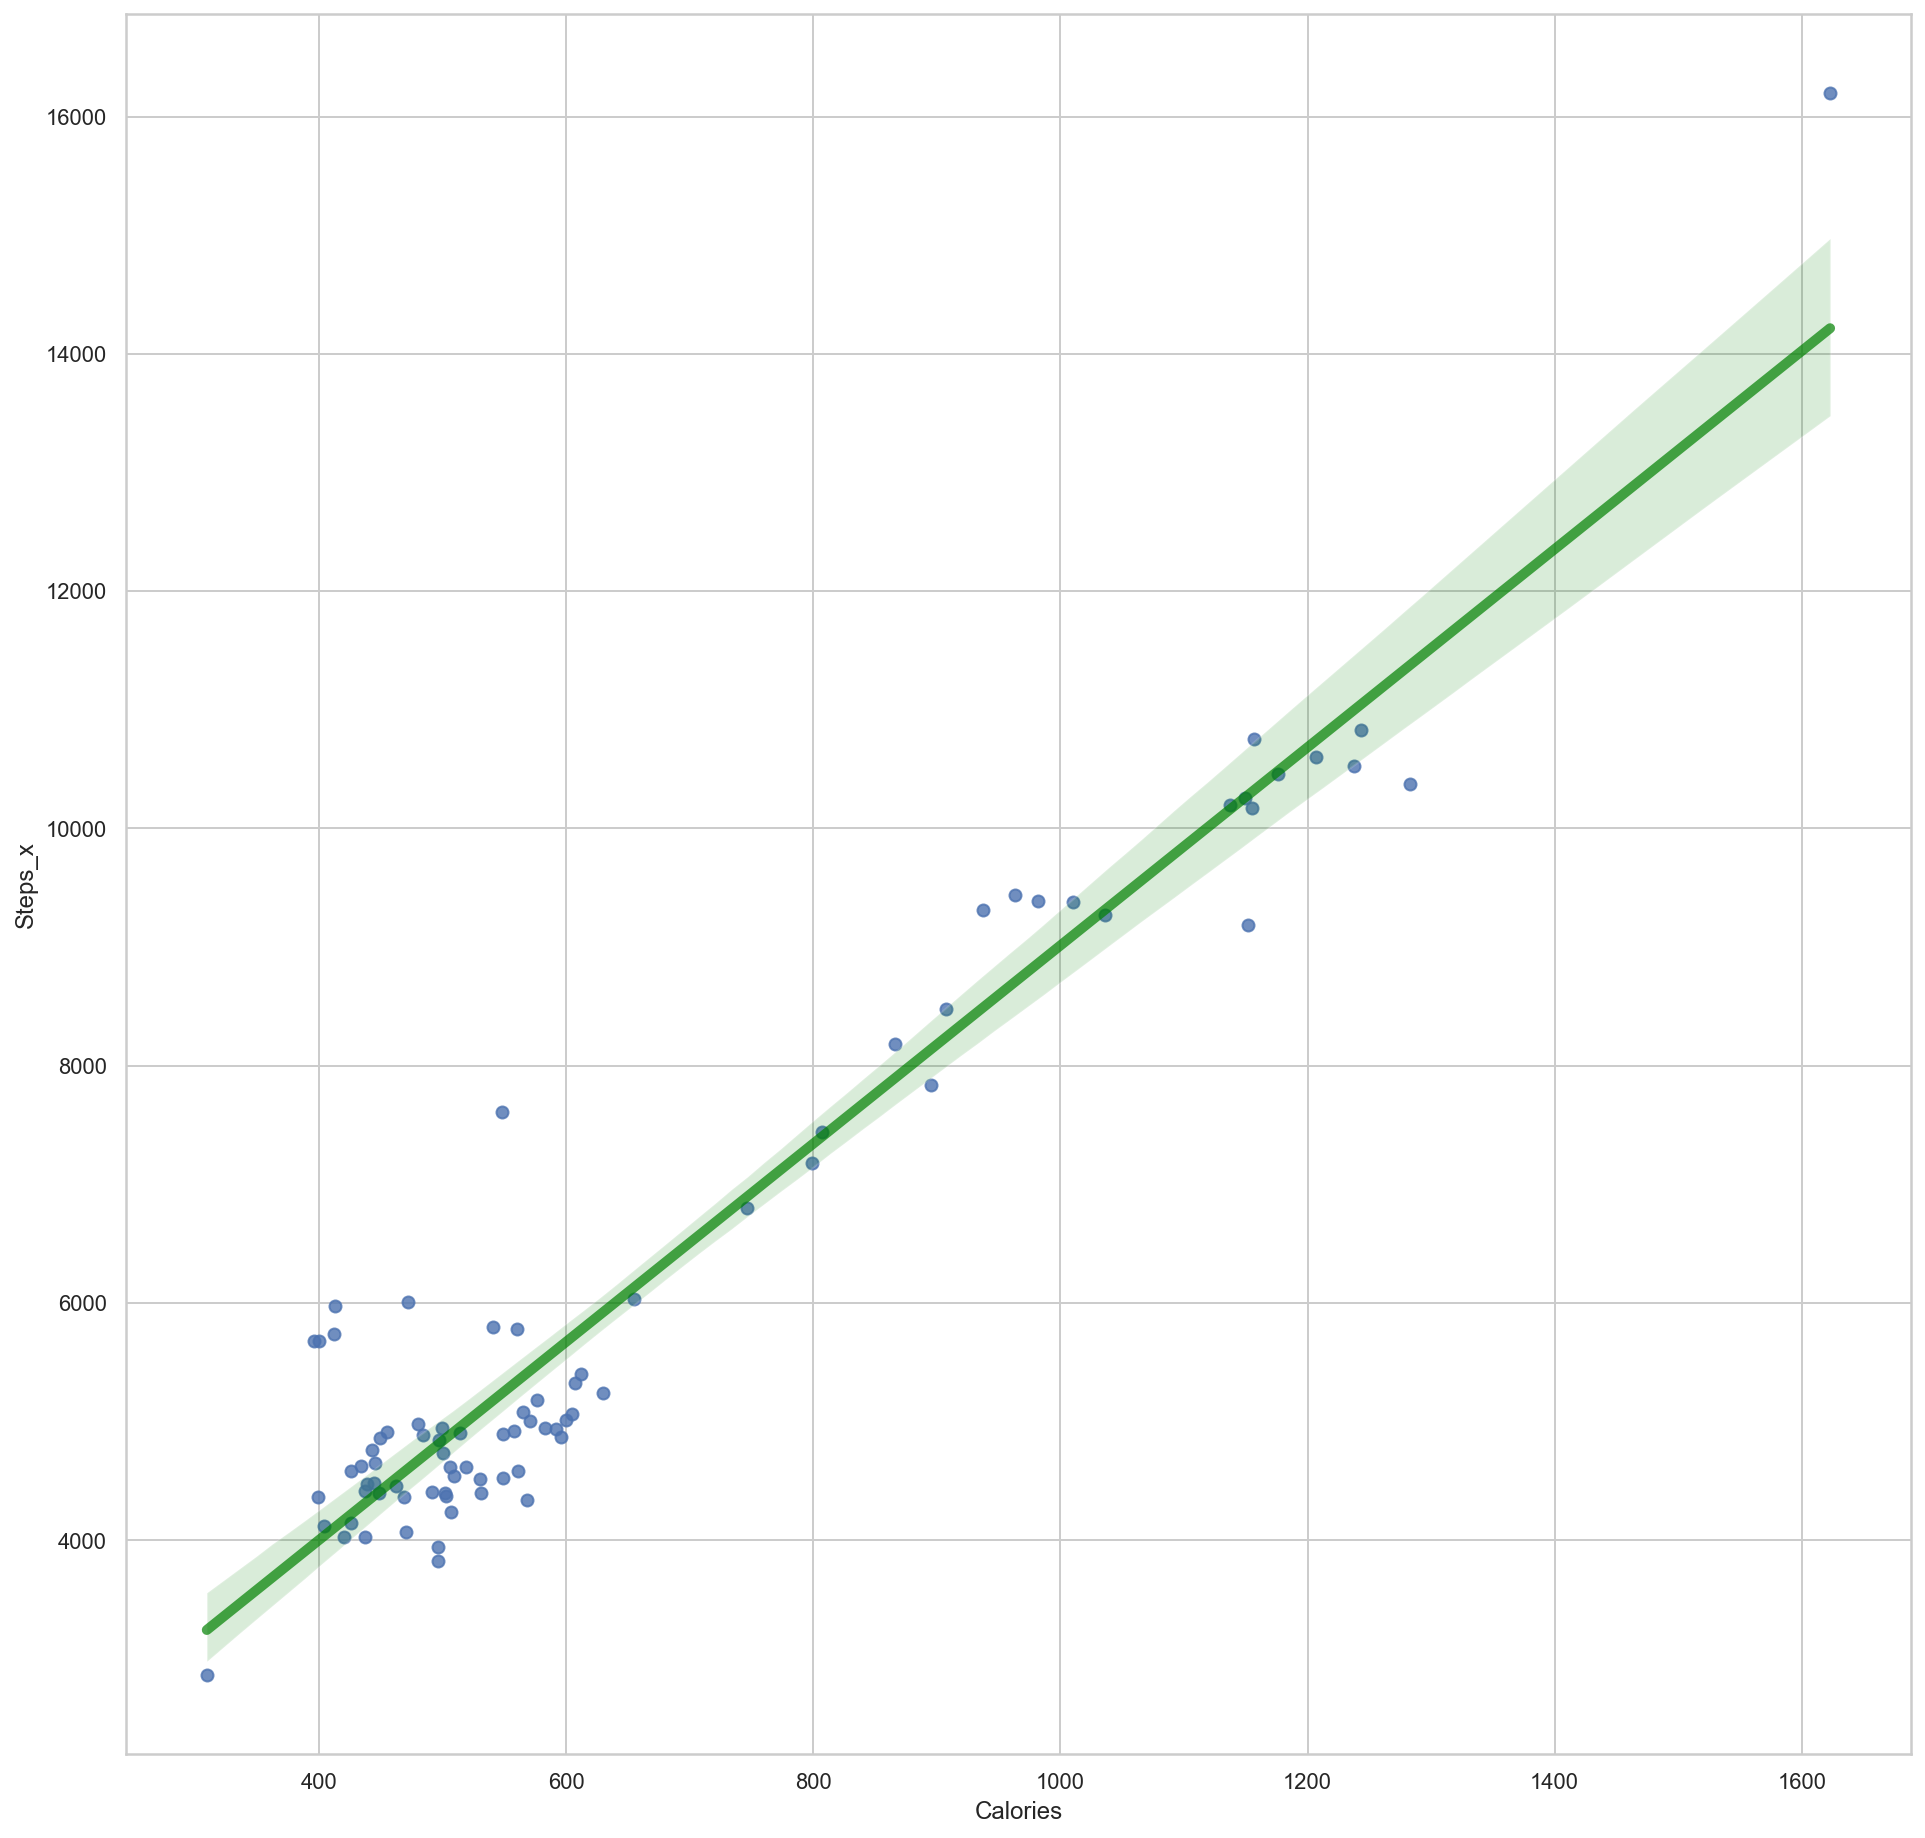

In [83]:
#Calories & Steps
sns.regplot(x=rdf2["Calories"], y=rdf2["Steps_x"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

In [84]:
rdf2.columns

Index(['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Active Time (total min)', 'day_of_week_start'],
      dtype='object')

In [85]:
df_num = rdf2.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['Calories'][:-1] # -1 means that the latest row is Active Time (total min)
top_features = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There are {} strongly correlated values with Distance:\n{}".format(len(top_features), top_features))

There are 6 strongly correlated values with Distance:
Calories                    1.000000
Activity Score              0.957629
Steps_x                     0.957550
Distance (mi)               0.938975
Max Heart Rate (bpm)        0.353758
Average Heart Rate (bpm)    0.339176
Name: Calories, dtype: float64


<AxesSubplot:>

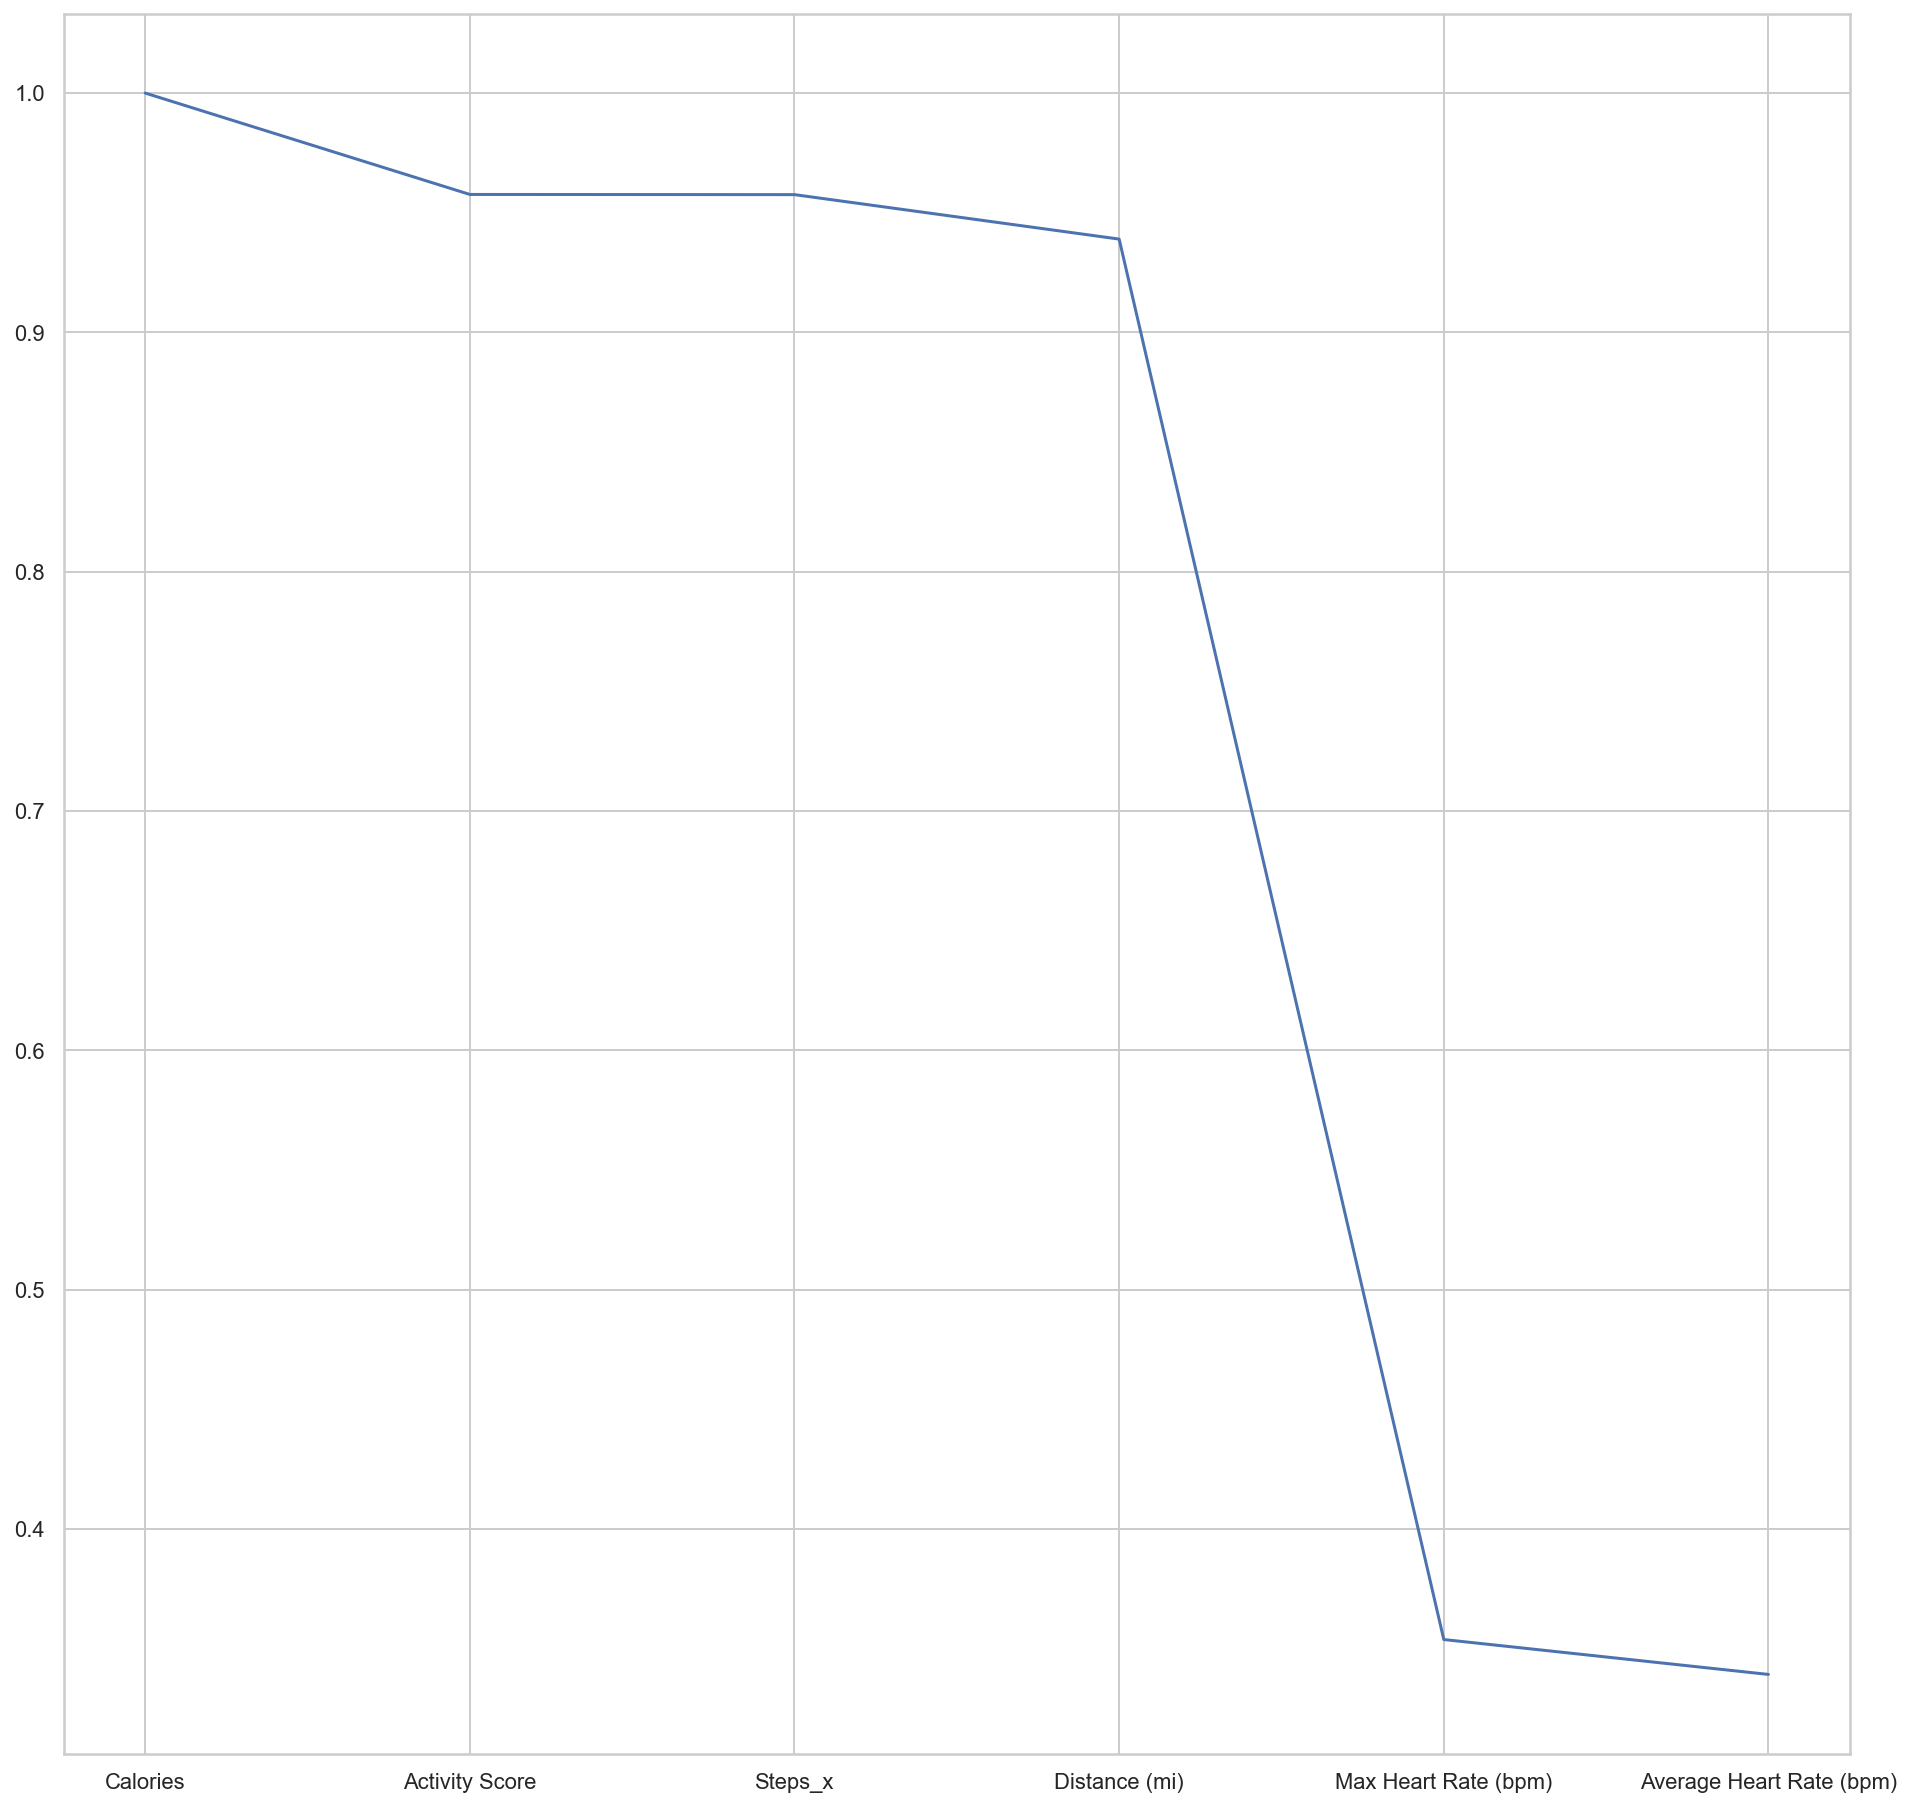

In [86]:
top_features.plot()

Generate pair plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns sns.pairplot() function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.

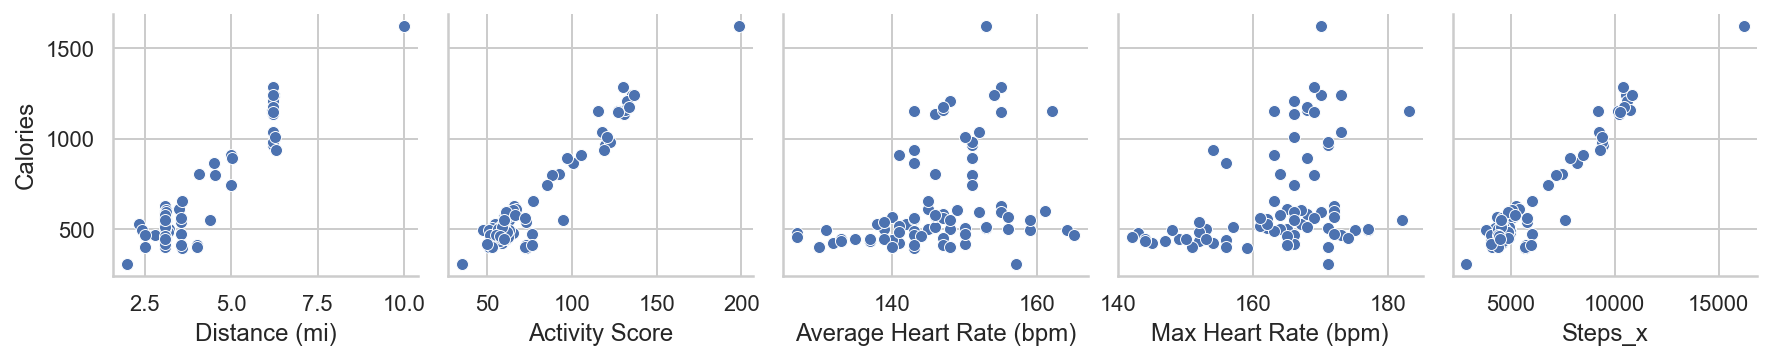

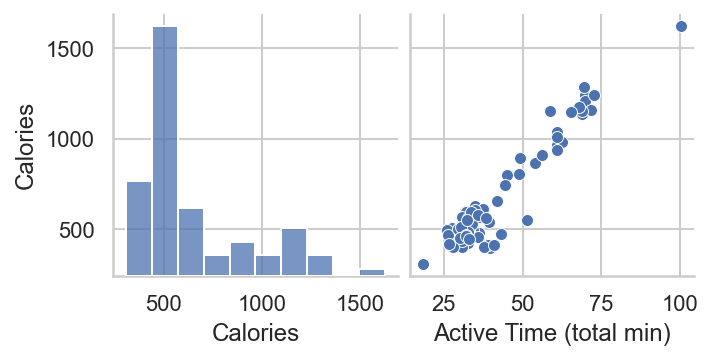

In [87]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Calories'])

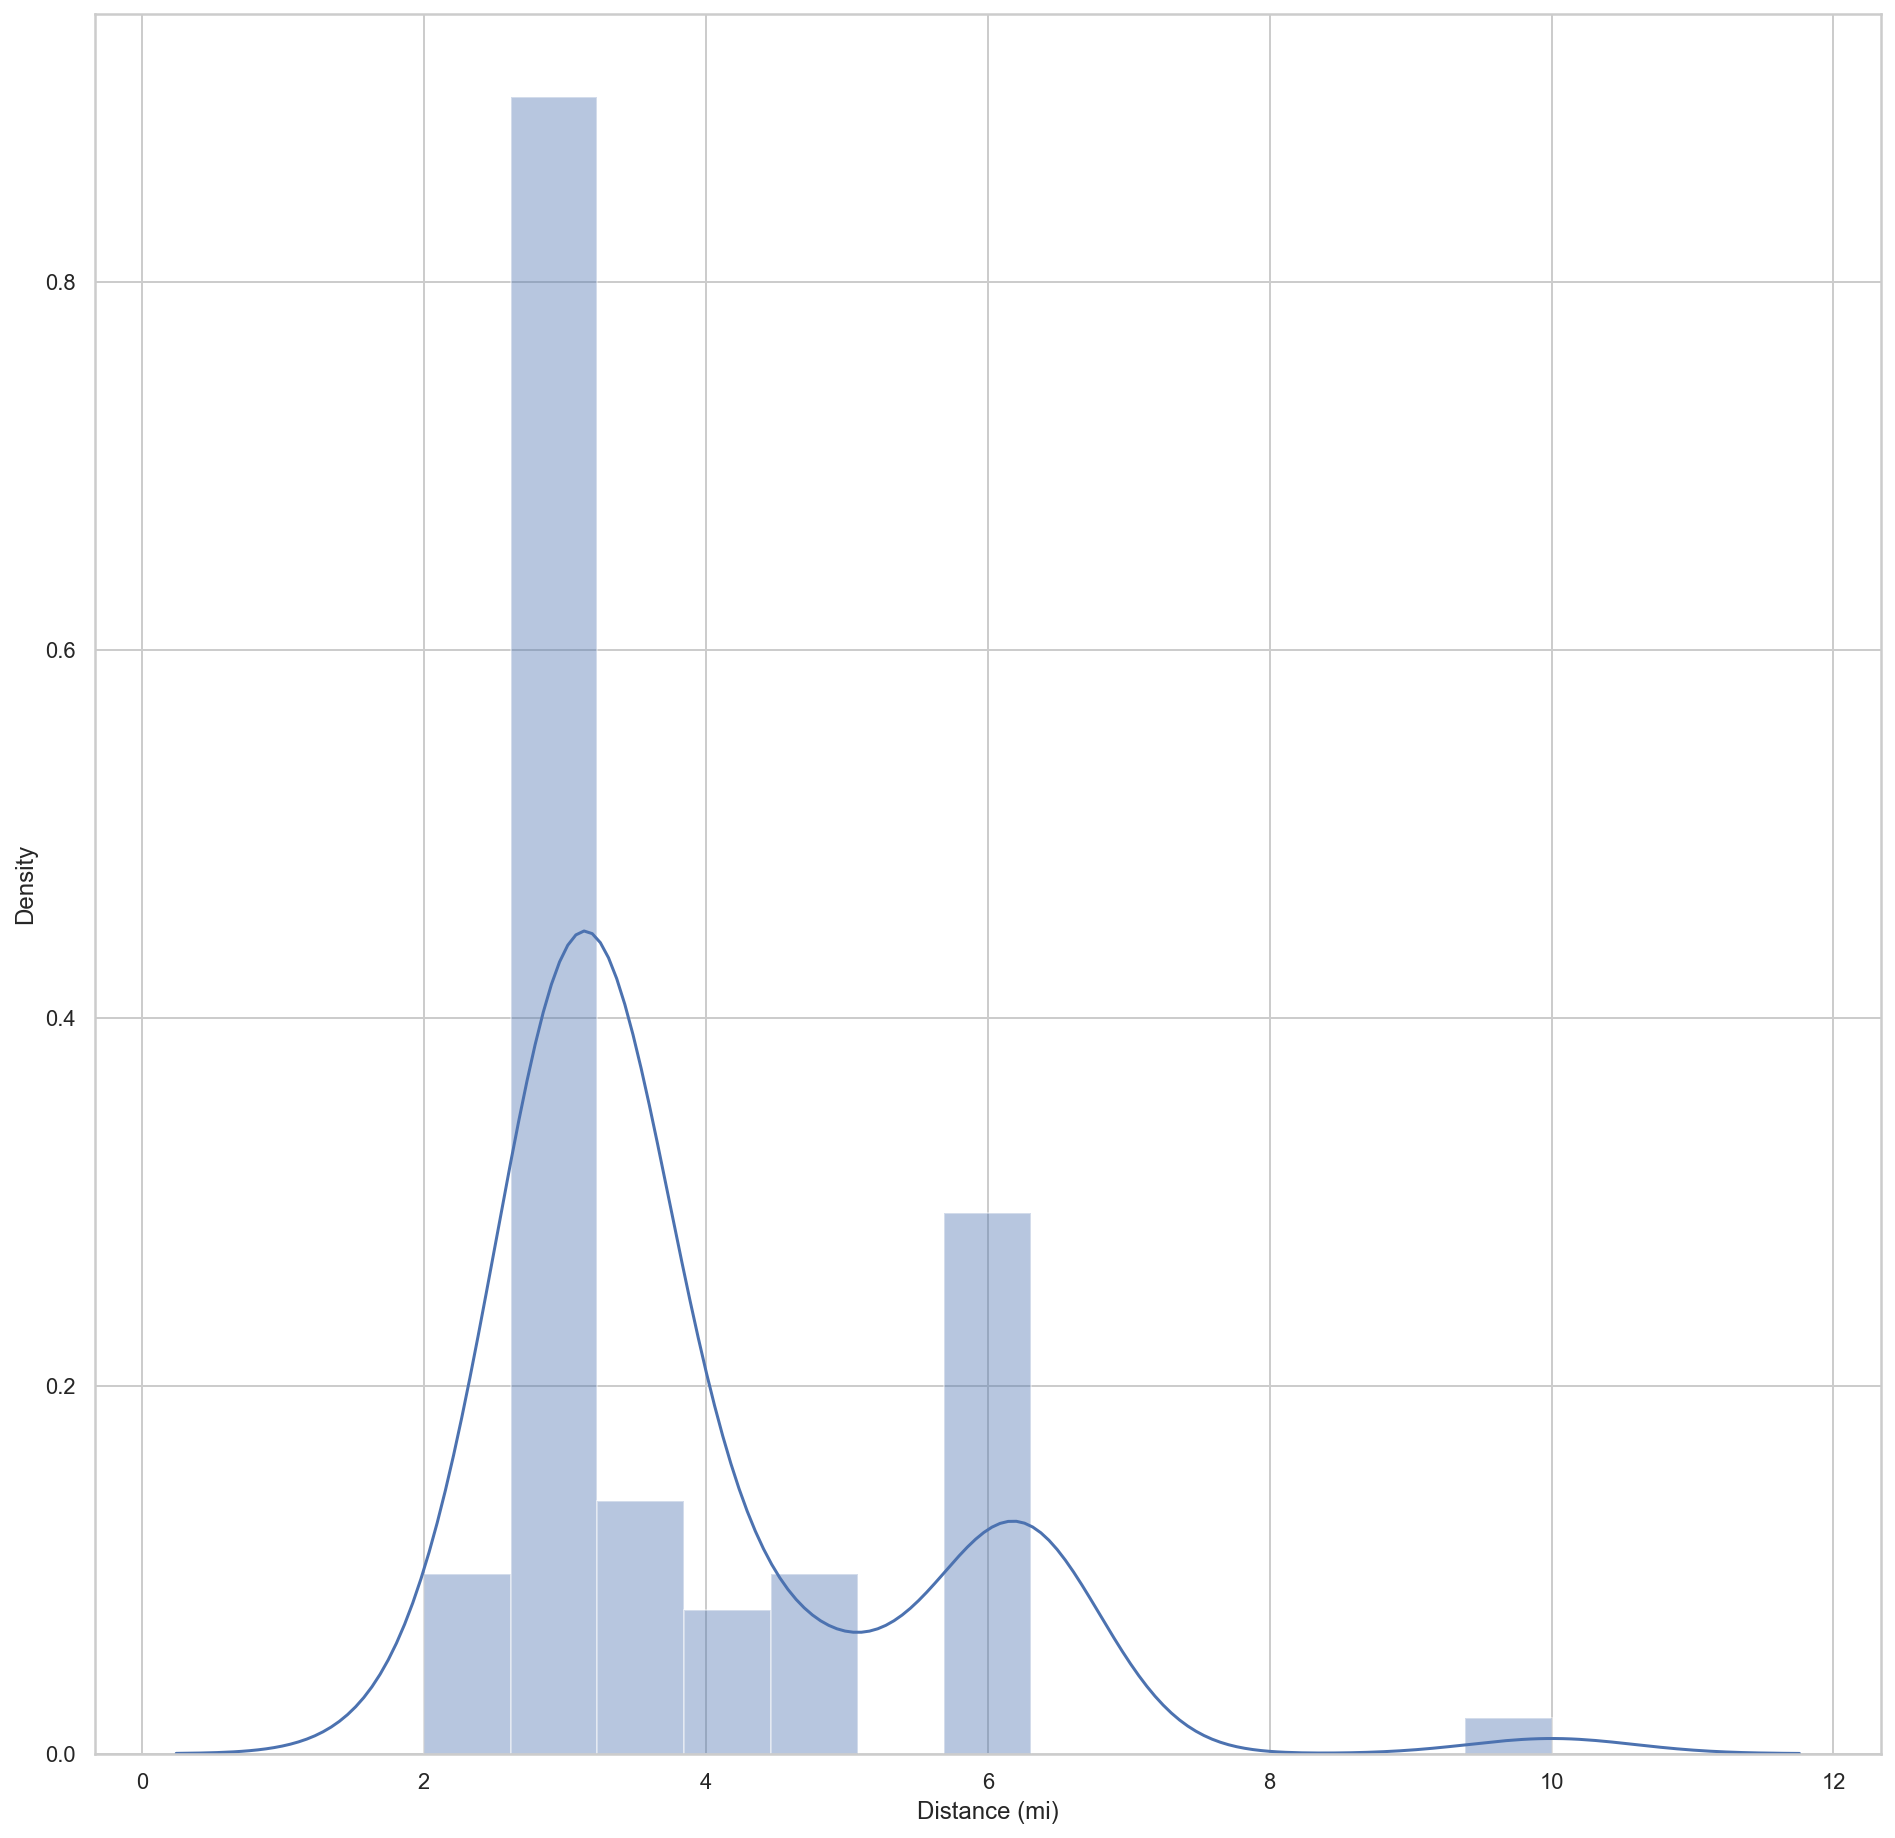

In [88]:
df_untransformed = sns.distplot(rdf2['Distance (mi)'])

In [89]:
print("Skewness: %f" % rdf2['Distance (mi)'].skew())

Skewness: 1.659926


In [90]:
log_transformed = np.log(rdf2['Distance (mi)'])

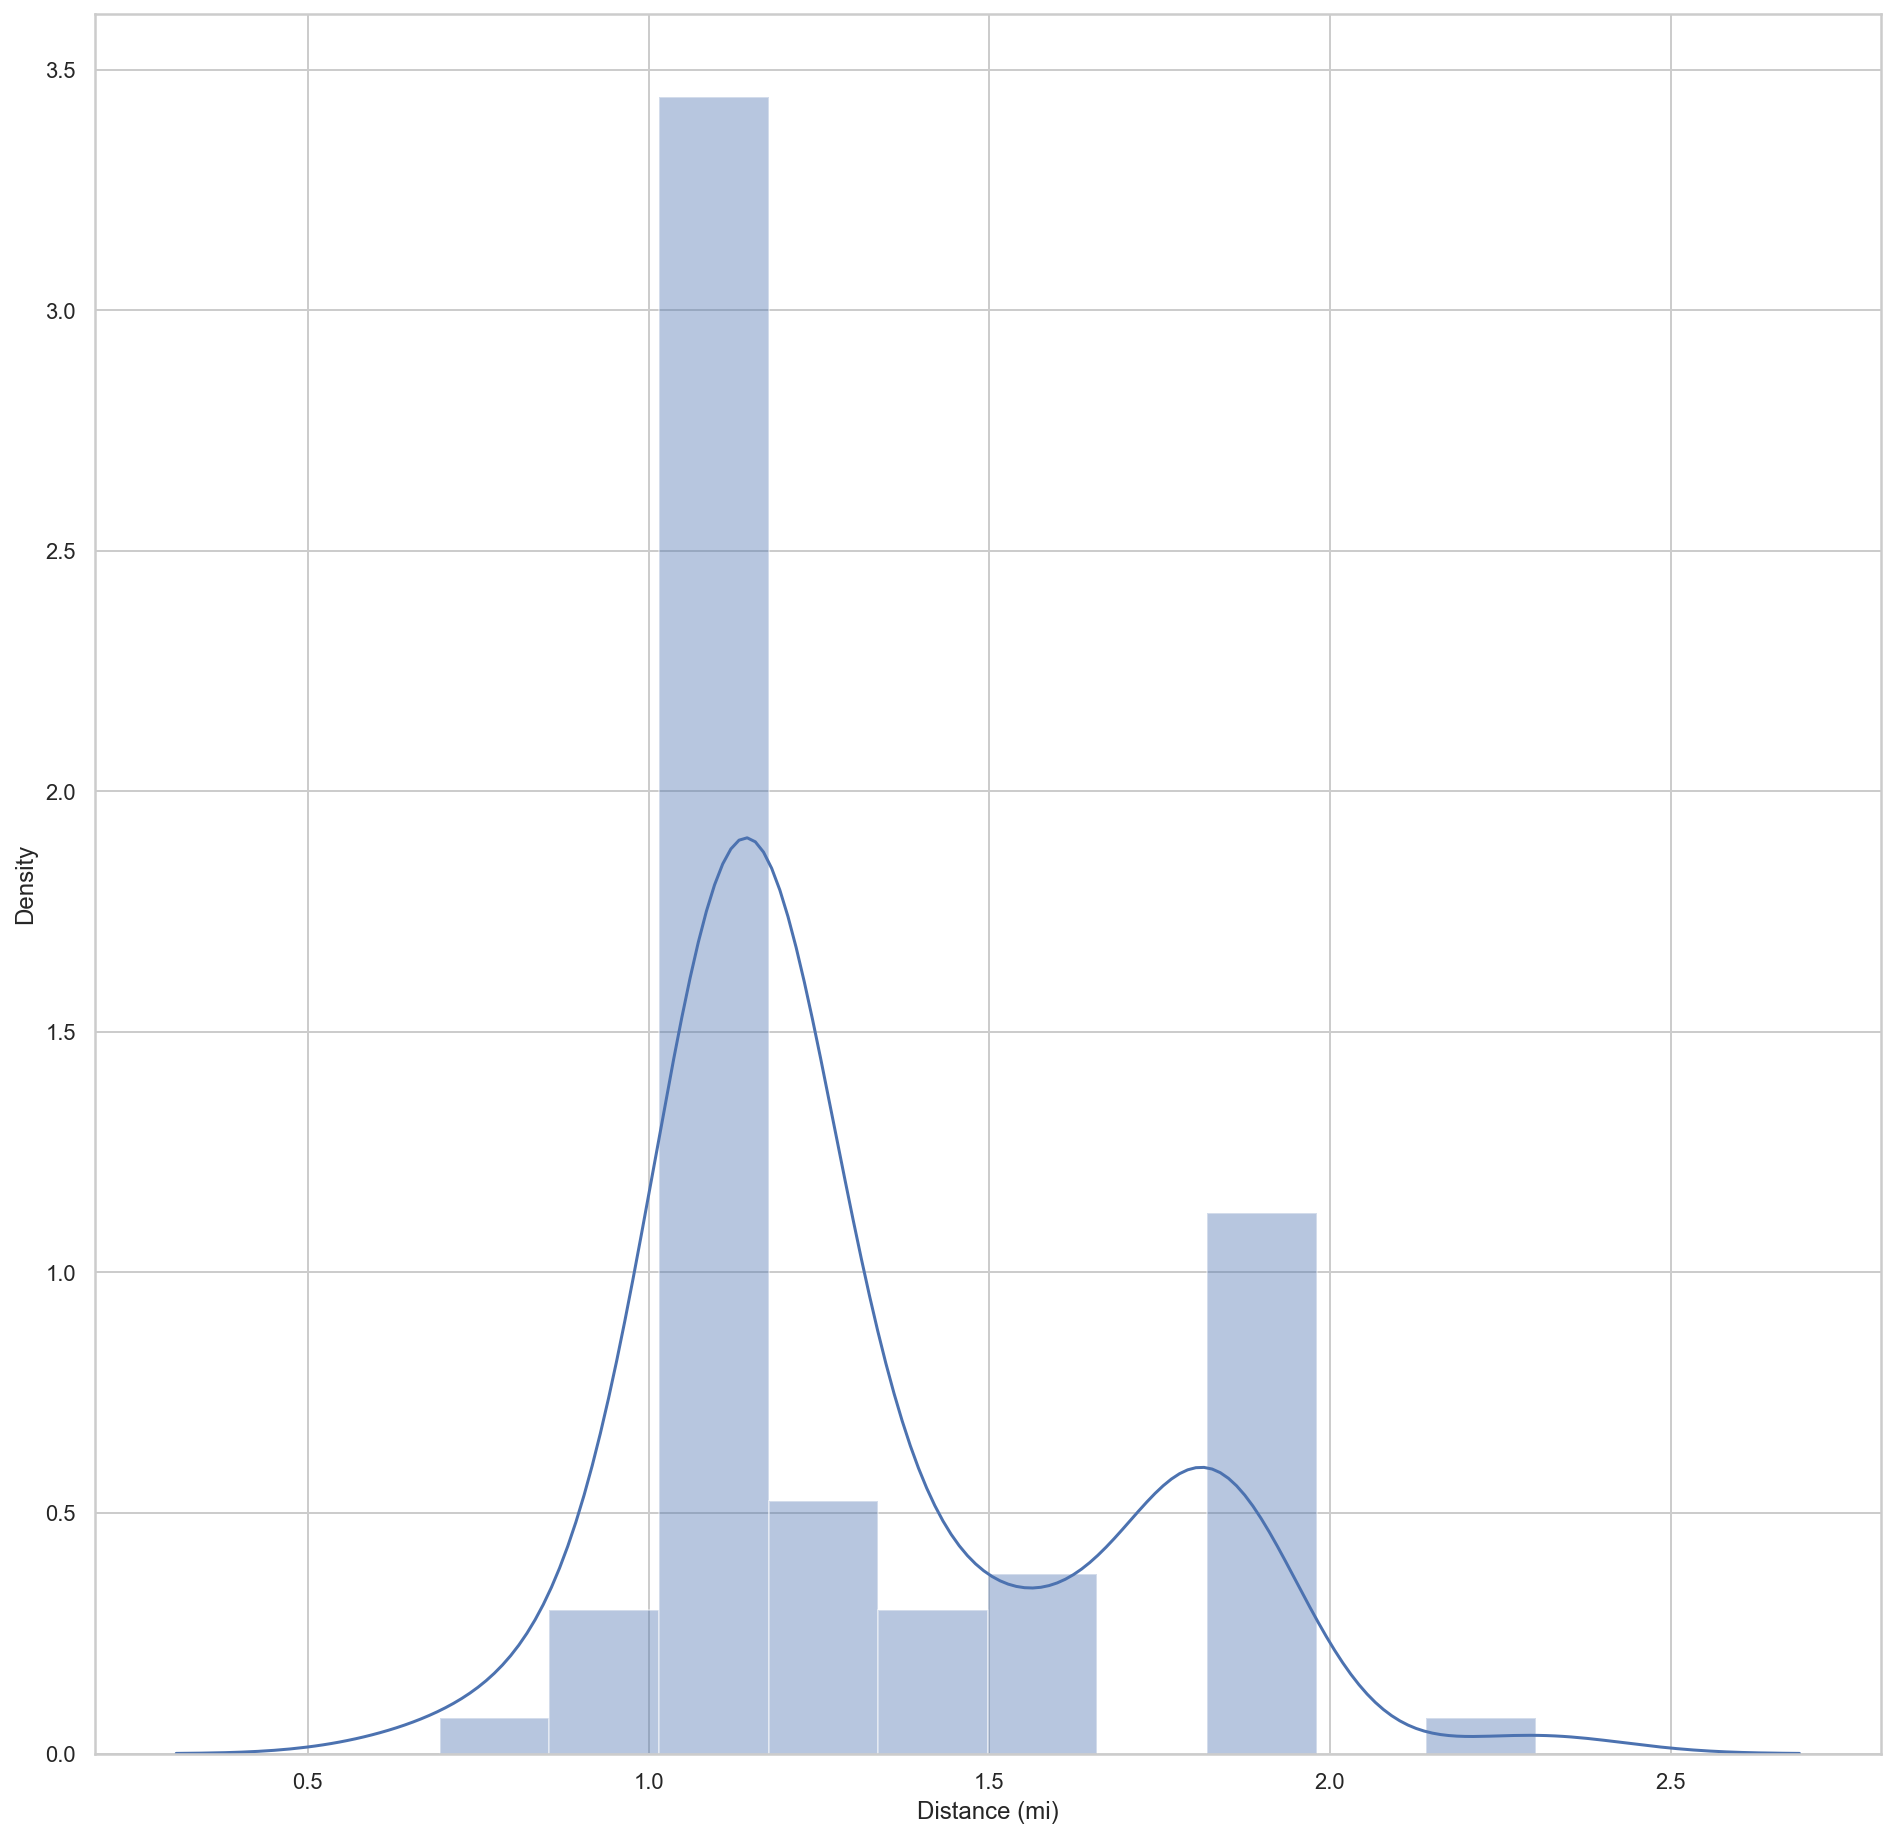

In [91]:
df_transformed = sns.distplot(log_transformed)

In [92]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: 1.013200


In [93]:
norm_data = MinMaxScaler().fit_transform(df_num)
norm_data

array([[0.31267107, 0.40189544, 0.42105263, 0.34146341, 0.39881444,
        0.4238965 , 0.43347953],
       [0.53022535, 0.6147967 , 0.71052632, 0.68292683, 0.5743228 ,
        0.70700152, 0.62743665],
       [0.13854816, 0.19486396, 0.57894737, 0.56097561, 0.18428754,
        0.22678843, 0.21807992],
       [0.25997075, 0.35126873, 0.5       , 0.53658537, 0.3433631 ,
        0.37899543, 0.37158869],
       [0.13753953, 0.18667074, 0.73684211, 0.73170732, 0.17828469,
        0.24429224, 0.20248538],
       [0.13838068, 0.16979517, 0.89473684, 0.73170732, 0.16125159,
        0.22146119, 0.16739766],
       [0.13748453, 0.14680526, 0.47368421, 0.56097561, 0.11450439,
        0.14687976, 0.15594542],
       [0.52562462, 0.58446958, 0.5       , 0.58536585, 0.54956104,
        0.63013699, 0.6163499 ],
       [0.13748453, 0.13188627, 0.26315789, 0.12195122, 0.11630524,
        0.09741248, 0.13413743],
       [0.5253634 , 0.59706512, 0.55263158, 0.58536585, 0.57995048,
        0.68340944, 0.6

In [94]:
scaled_data = StandardScaler().fit_transform(df_num)
scaled_data

array([[ 4.33290307e-01,  7.94514691e-01, -4.00524533e-01,
        -8.39388268e-01,  8.66857473e-01,  7.80056583e-01,
         8.45809354e-01],
       [ 1.66809538e+00,  1.95564008e+00,  9.69059357e-01,
         7.16224439e-01,  1.83660554e+00,  2.12476247e+00,
         1.89658797e+00],
       [-5.55004926e-01, -3.34598053e-01,  3.46521225e-01,
         1.60648472e-01, -3.18482294e-01, -1.56176814e-01,
        -3.21135746e-01],
       [ 1.34171277e-01,  5.18405609e-01, -2.70016539e-02,
         4.95332789e-02,  5.60468495e-01,  5.66783338e-01,
         5.10510648e-01],
       [-5.60729794e-01, -3.79282373e-01,  1.09356698e+00,
         9.38454825e-01, -3.51650248e-01, -7.30363961e-02,
        -4.05620460e-01],
       [-5.55955524e-01, -4.71318733e-01,  1.84061274e+00,
         9.38454825e-01, -4.45764318e-01, -1.81480419e-01,
        -5.95711064e-01],
       [-5.61041931e-01, -5.96701602e-01, -1.51509280e-01,
         1.60648472e-01, -7.04059762e-01, -5.35730893e-01,
        -6.5775452

<AxesSubplot:xlabel='Distance (mi)'>

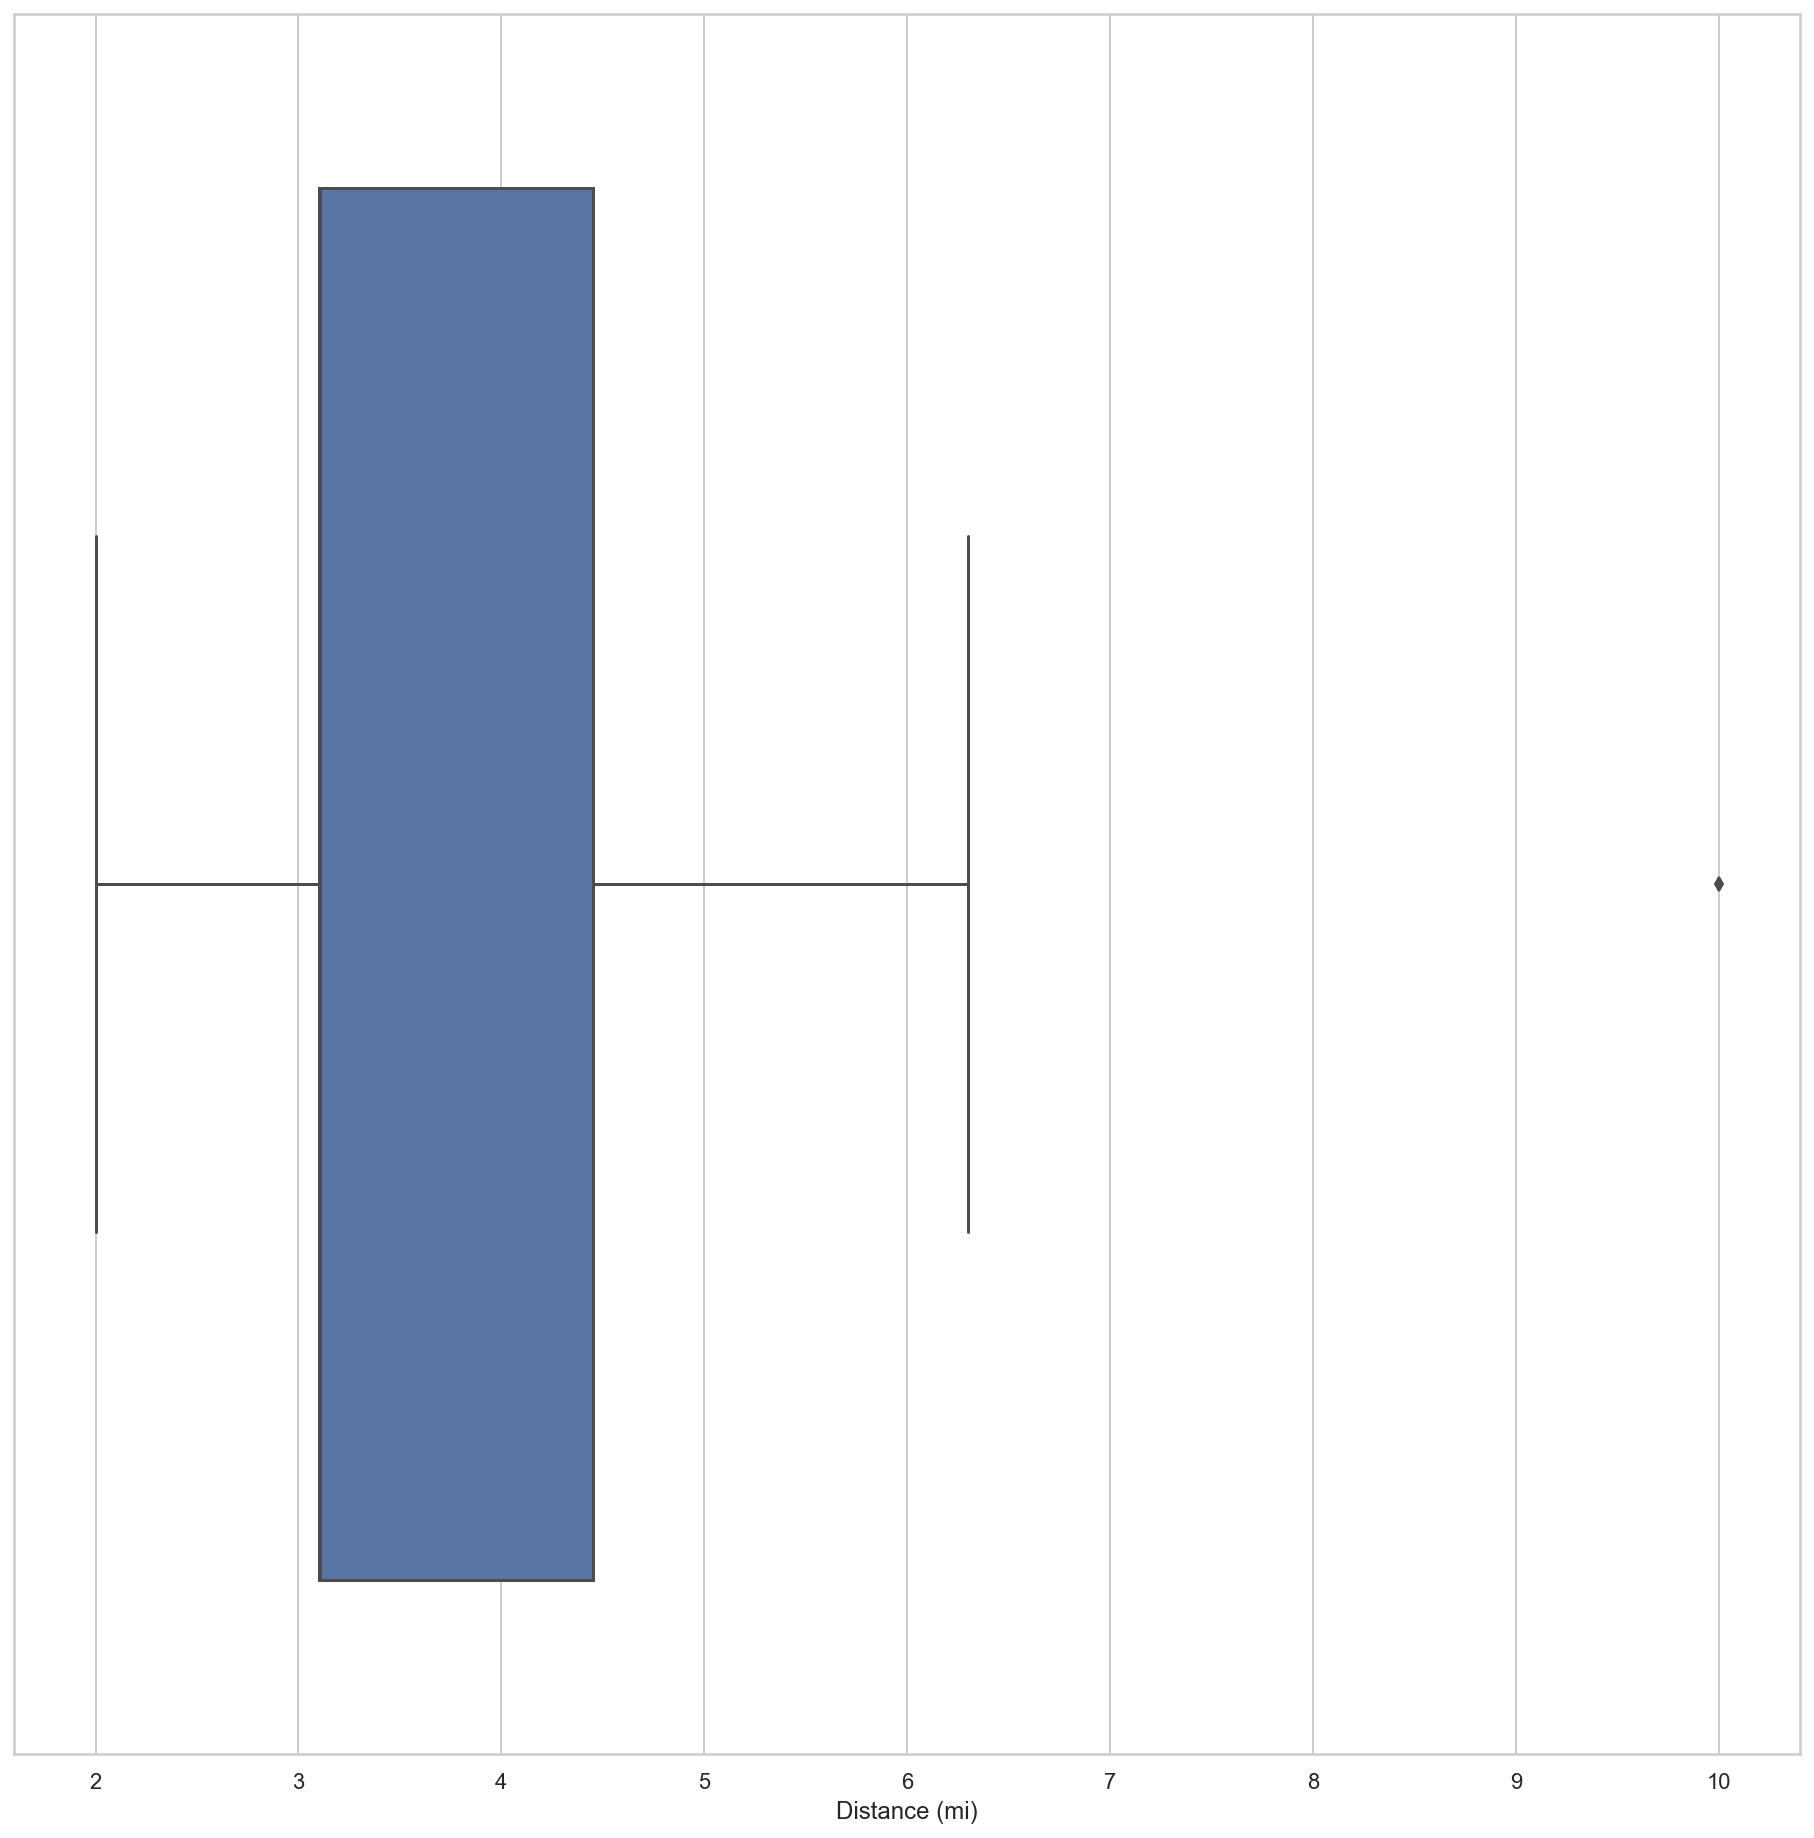

In [95]:
sns.boxplot(x=rdf2['Distance (mi)'])

<AxesSubplot:xlabel='Steps_x'>

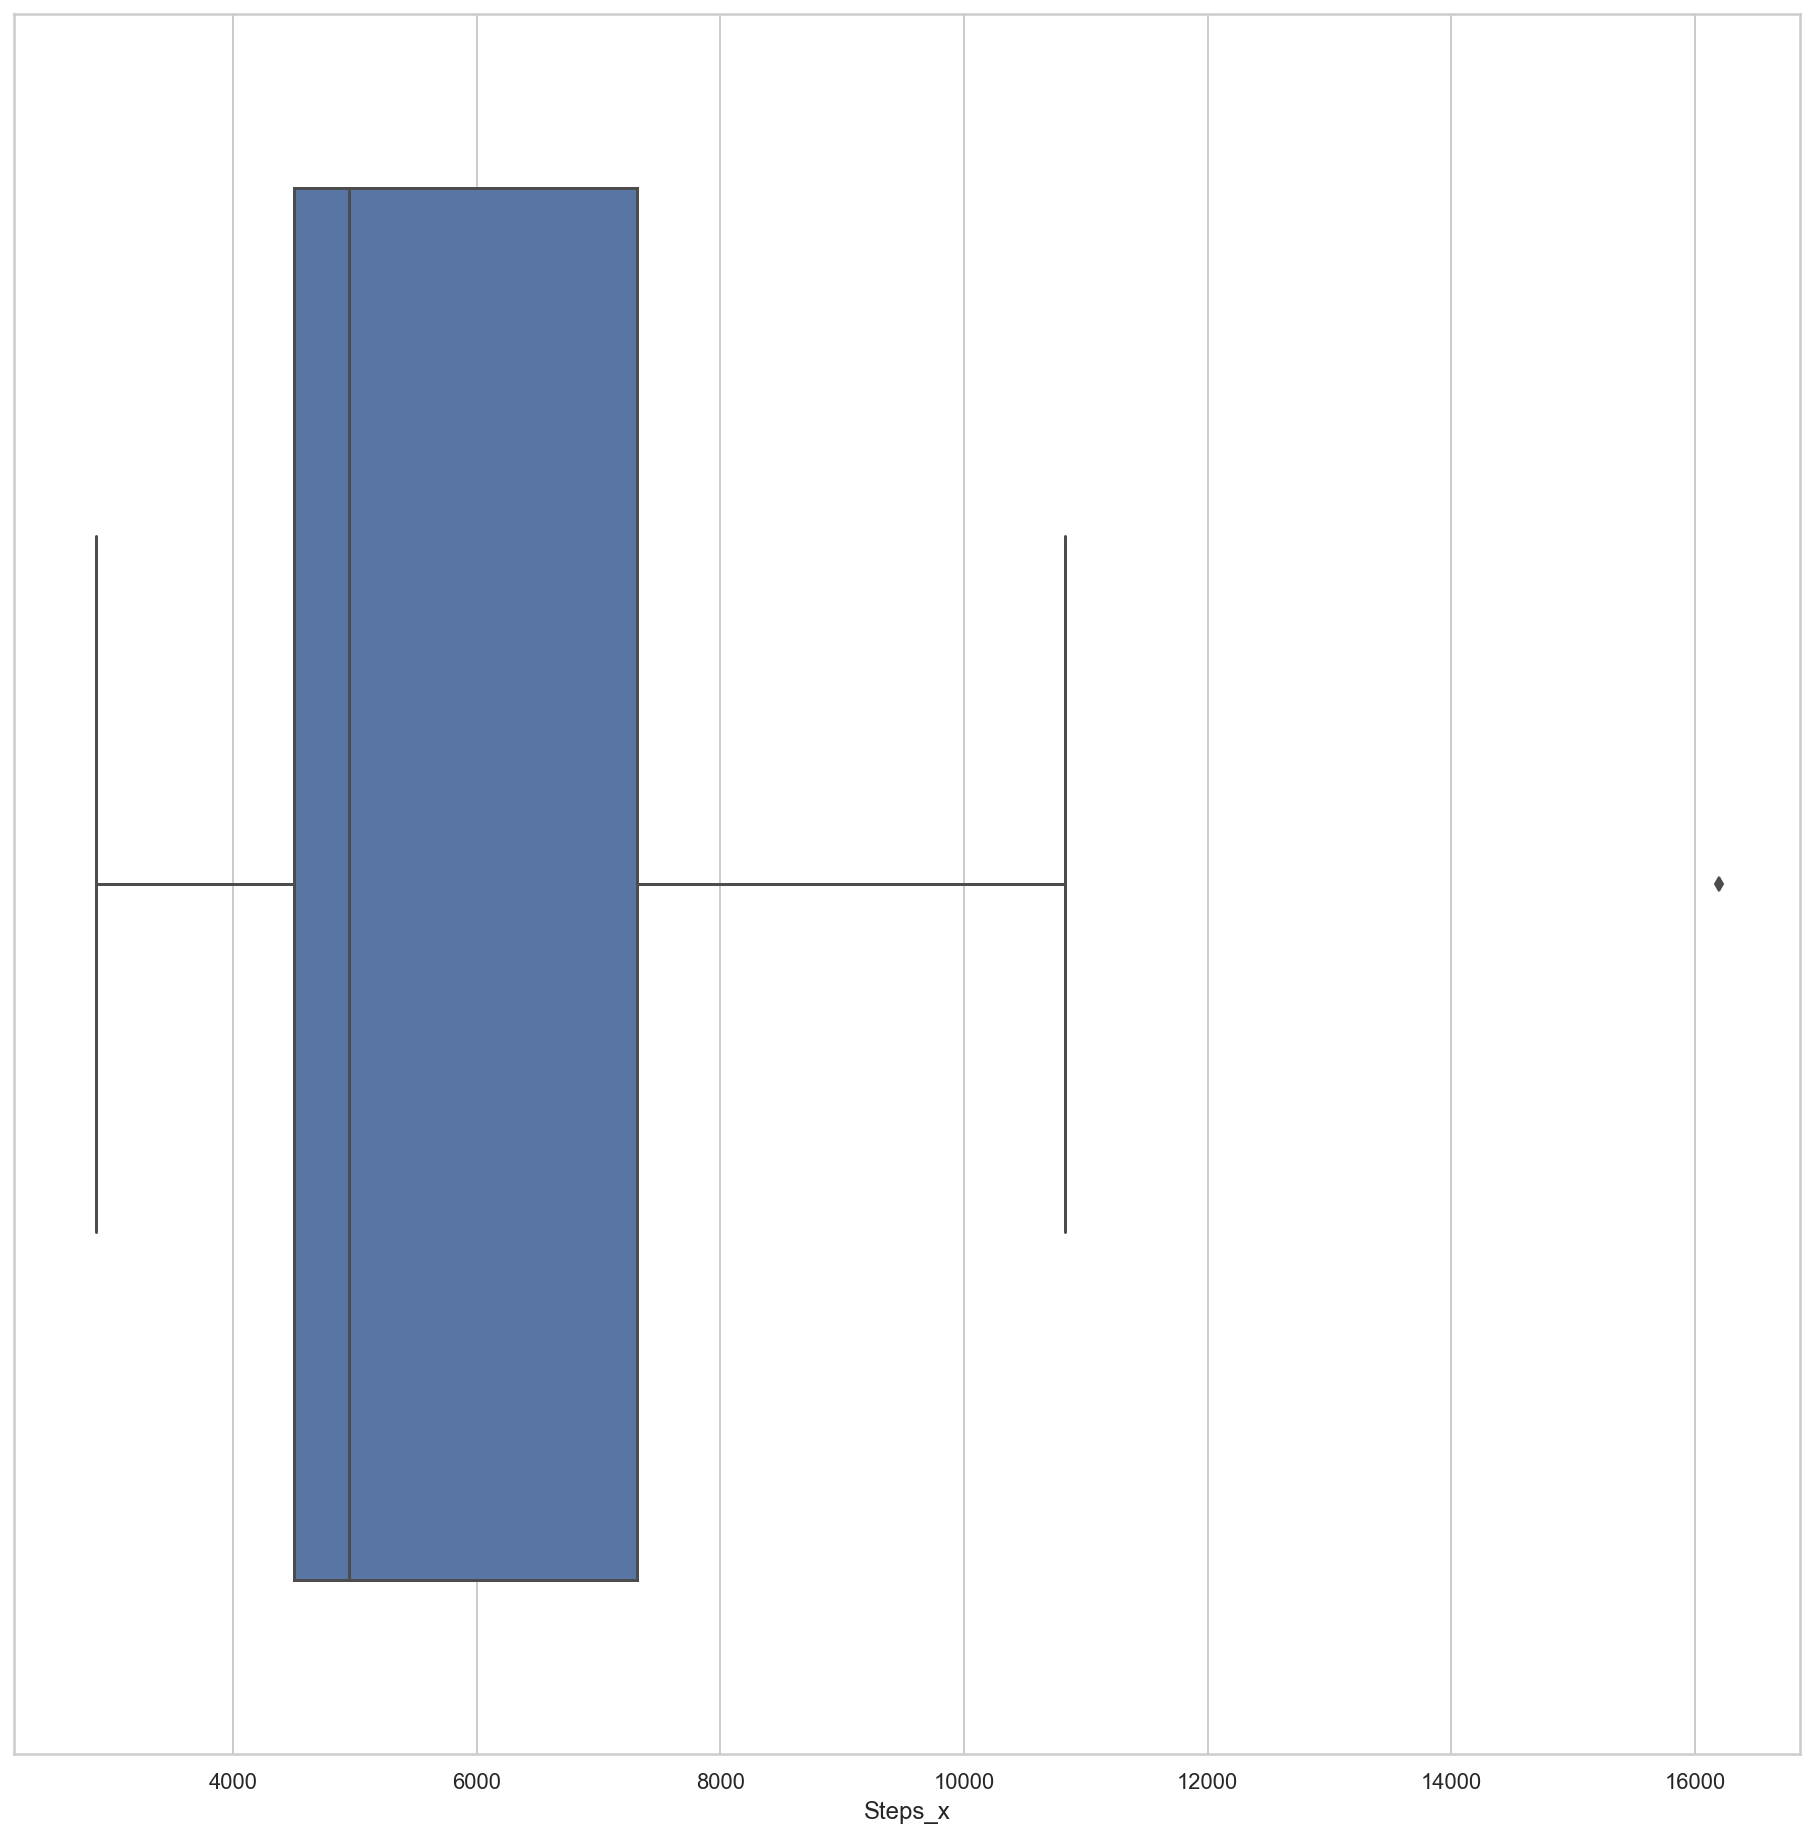

In [96]:
sns.boxplot(x=rdf2['Steps_x'])

<AxesSubplot:xlabel='Average Heart Rate (bpm)'>

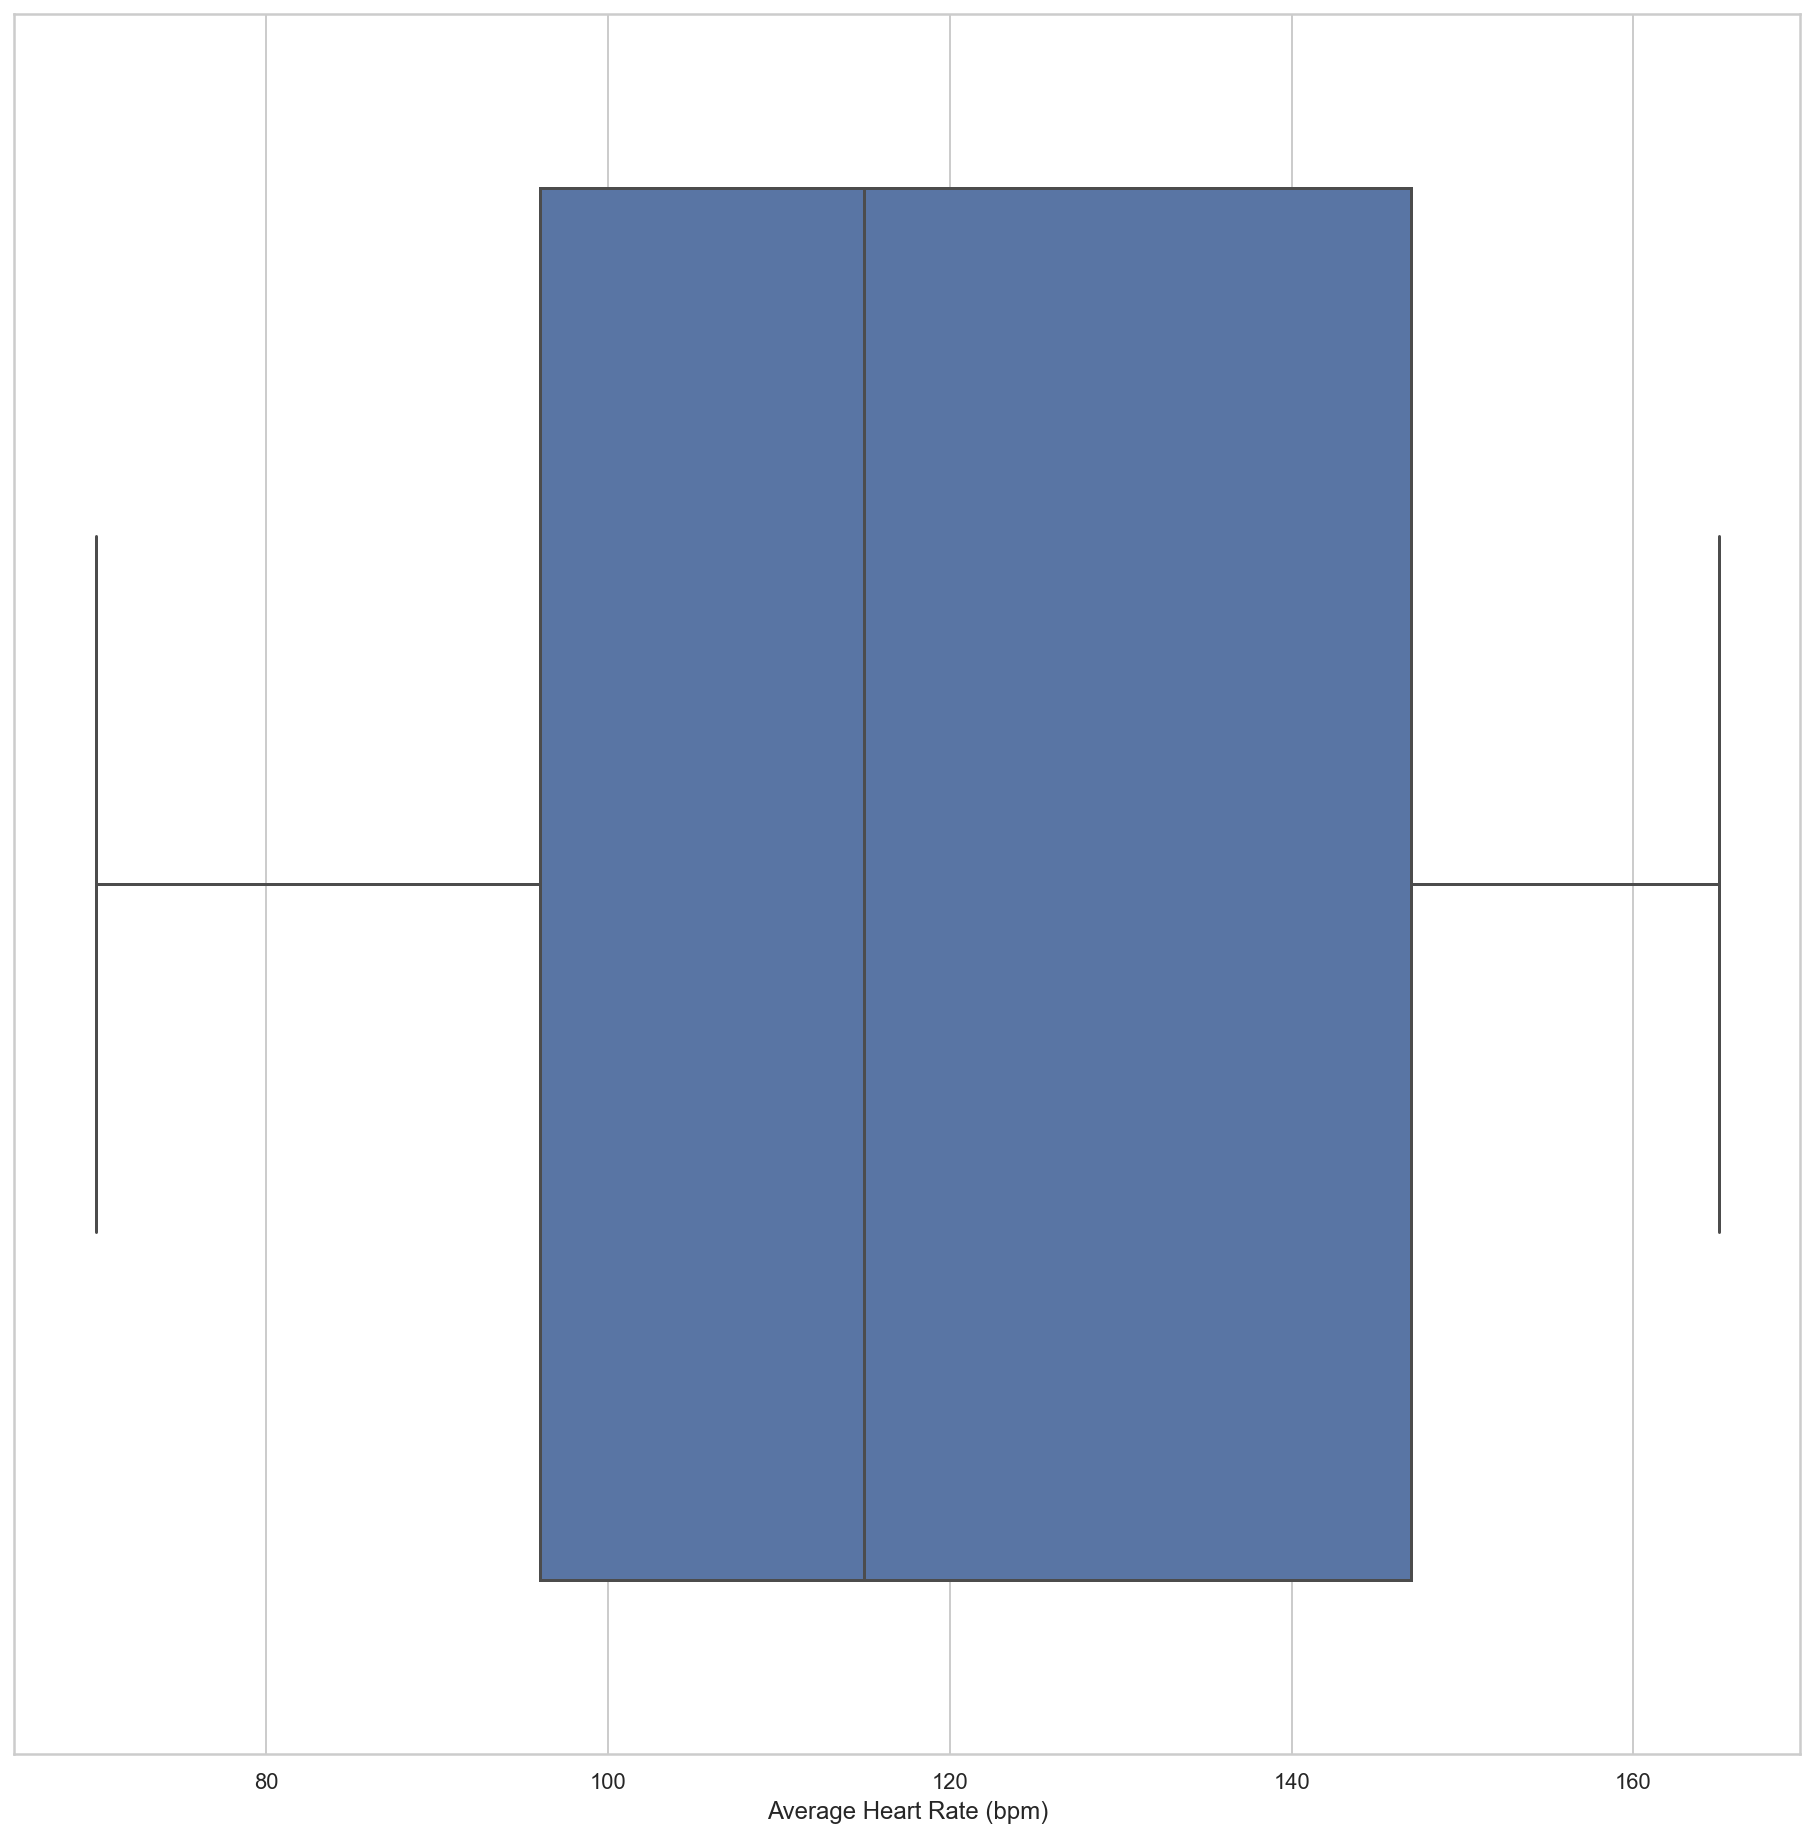

In [97]:
sns.boxplot(x=df2['Average Heart Rate (bpm)'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


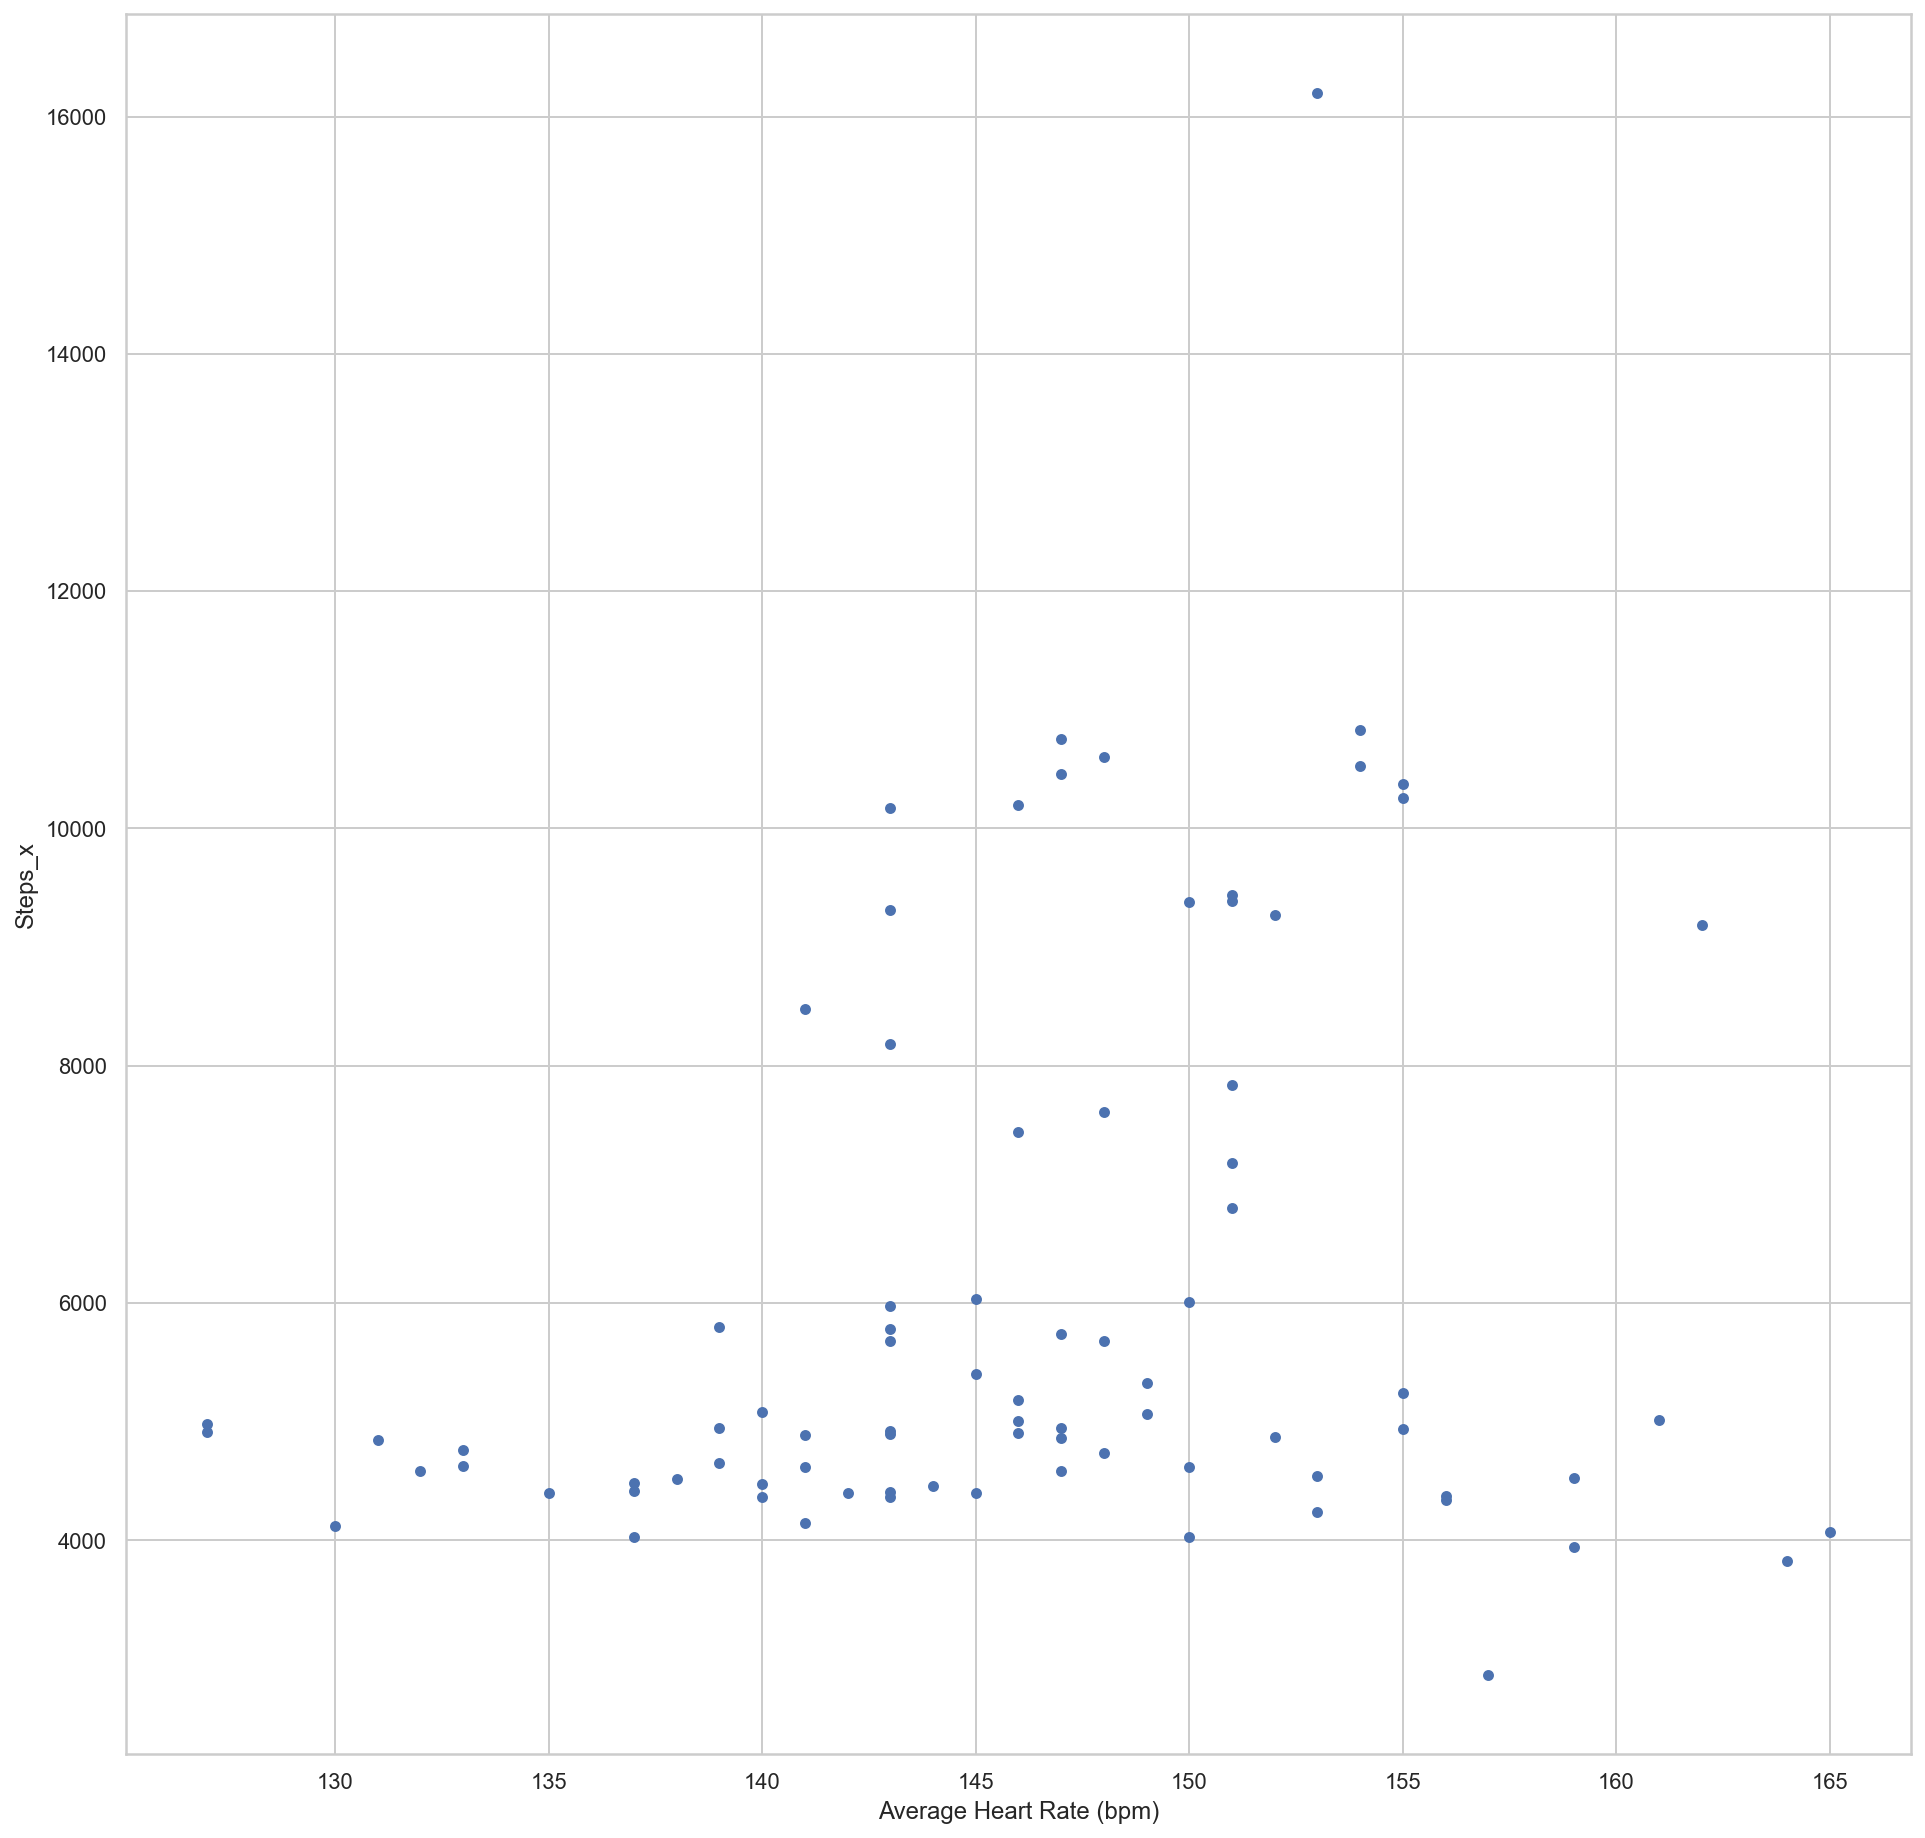

In [98]:
scat_area = rdf2.plot.scatter(x='Average Heart Rate (bpm)',
                      y='Steps_x')

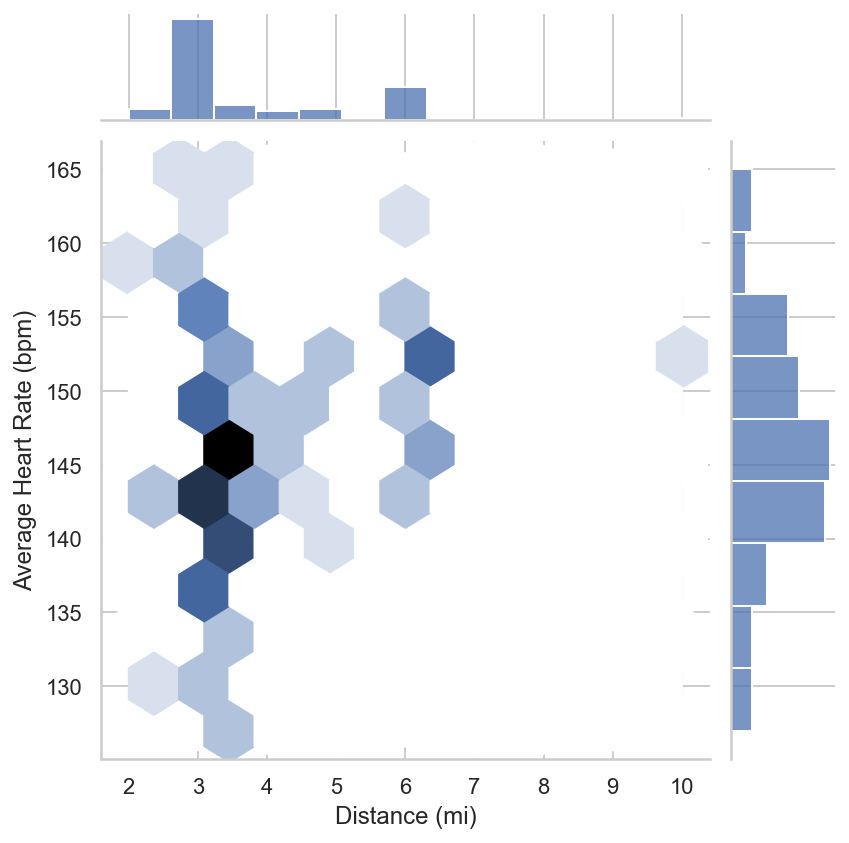

In [99]:
sns.jointplot(x=df2['Distance (mi)'],
y=rdf2['Average Heart Rate (bpm)'], kind='hex')

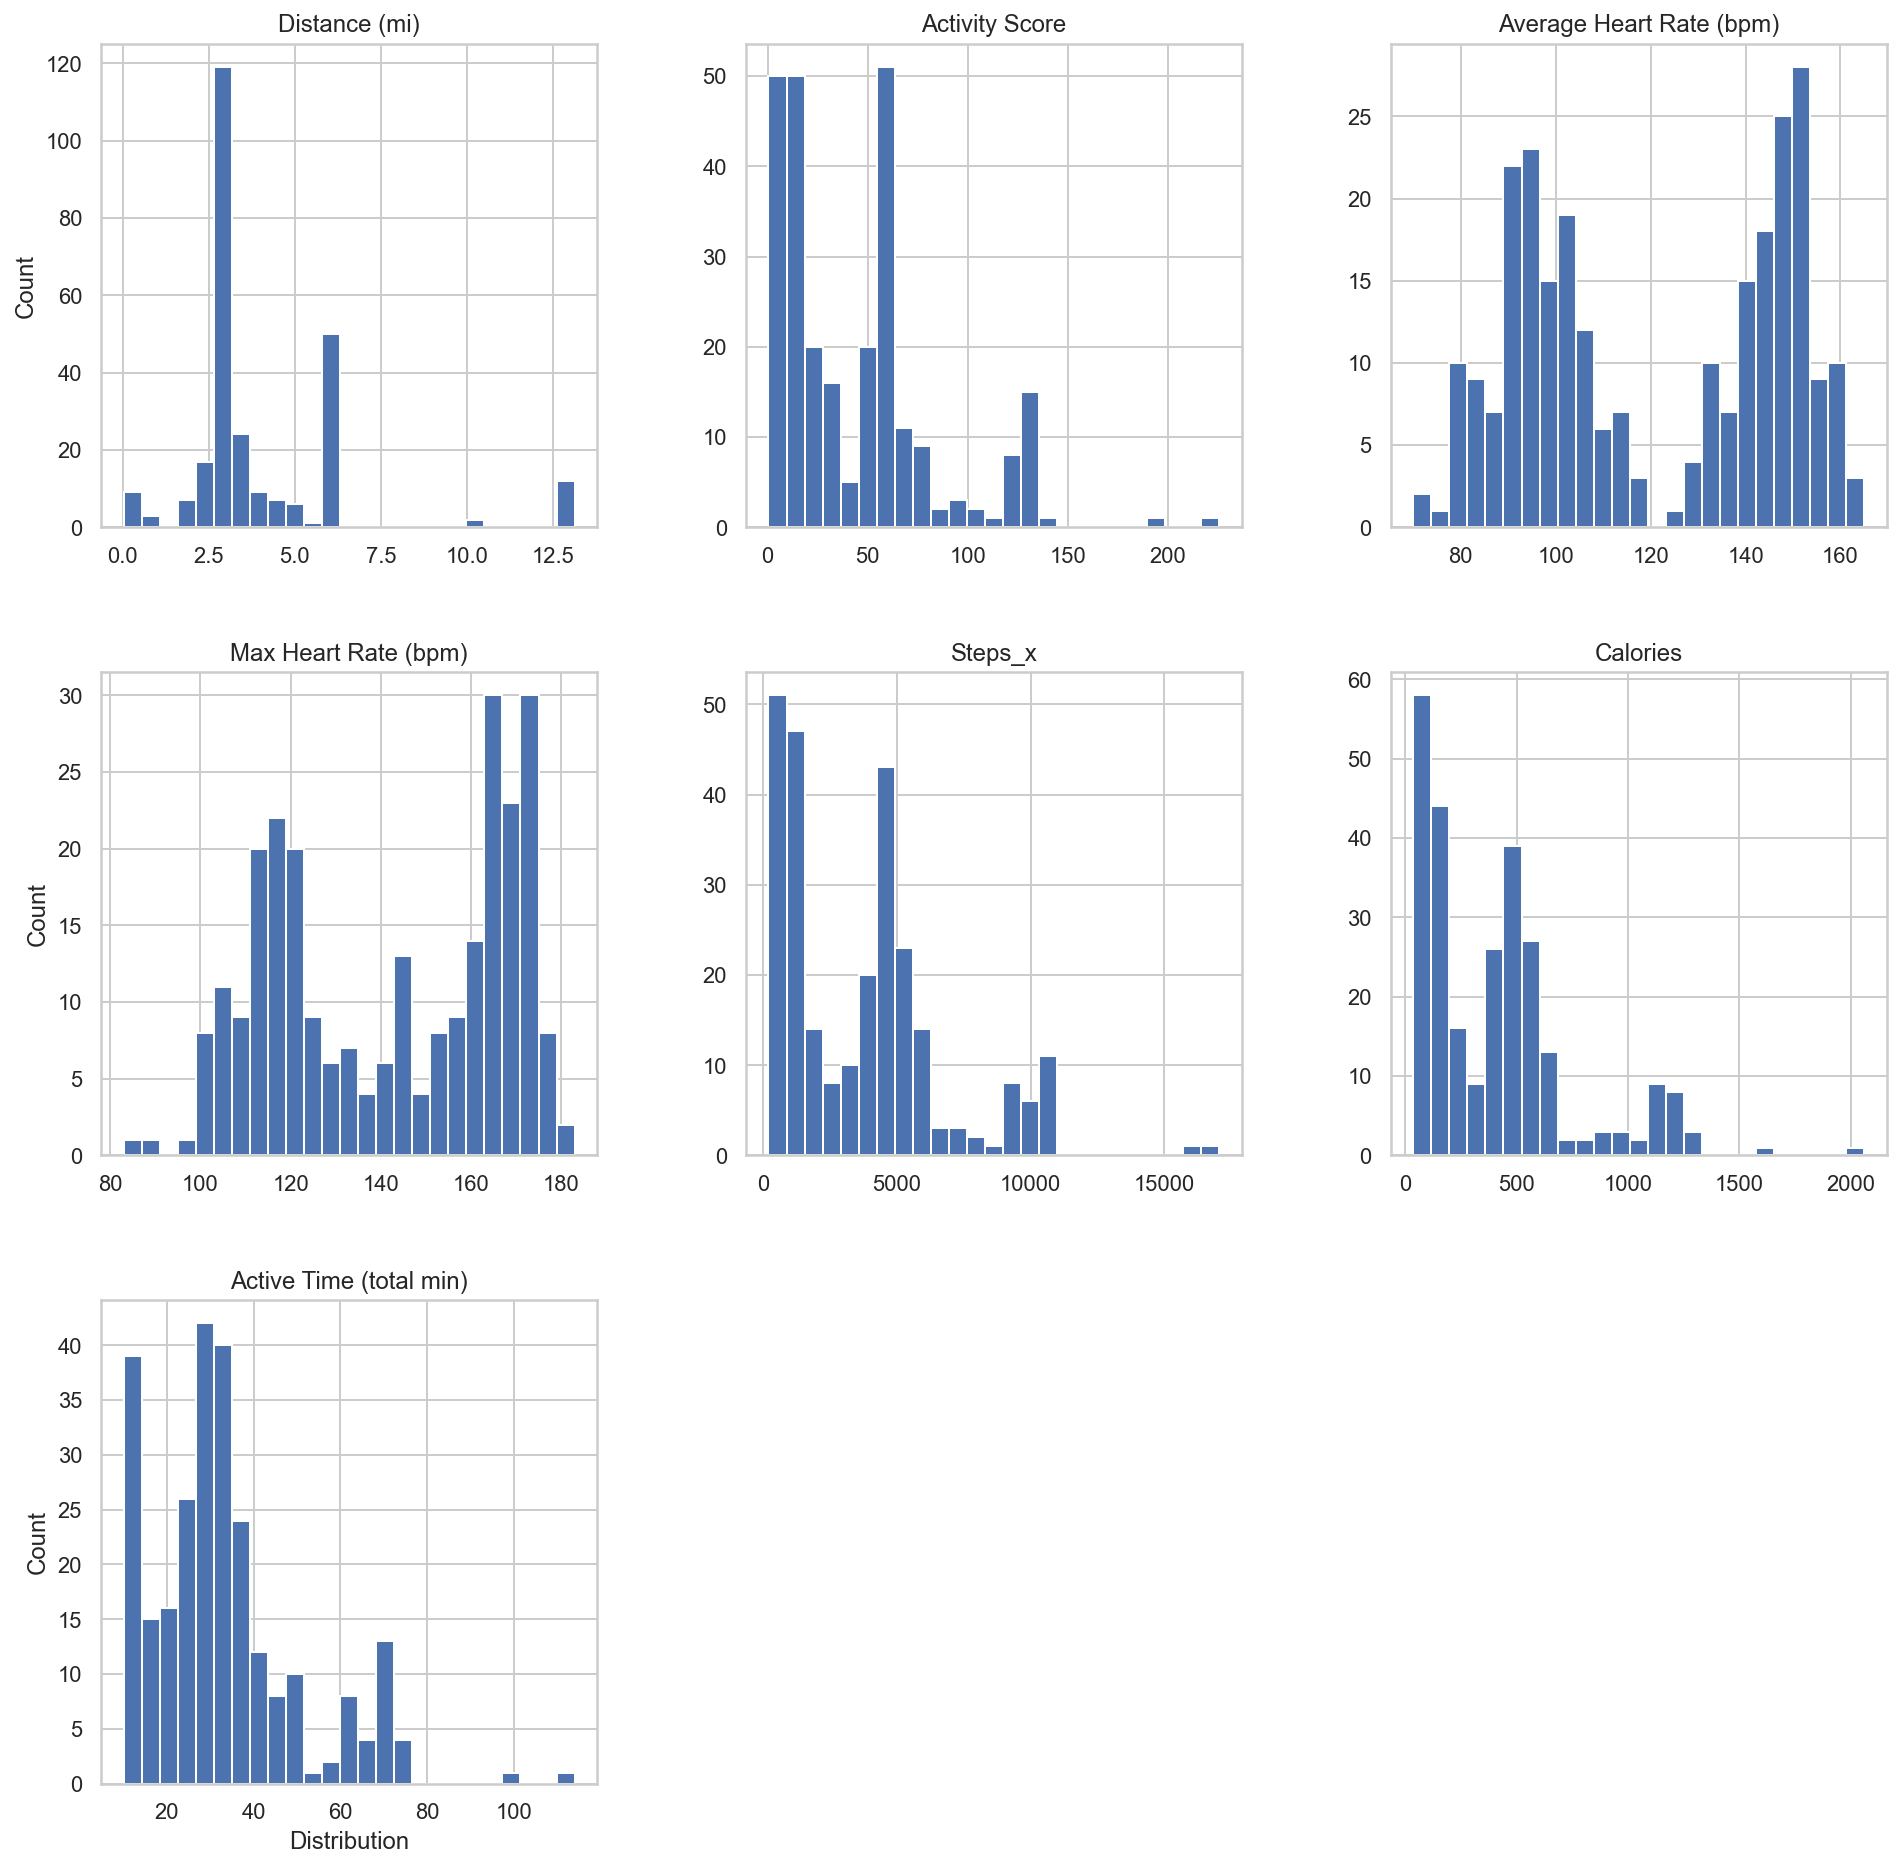

In [100]:
axList = df2.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Distribution')
        
    if ax.is_first_col():
        ax.set_ylabel('Count')

Text(0.5, 1.0, 'Category Histogram')

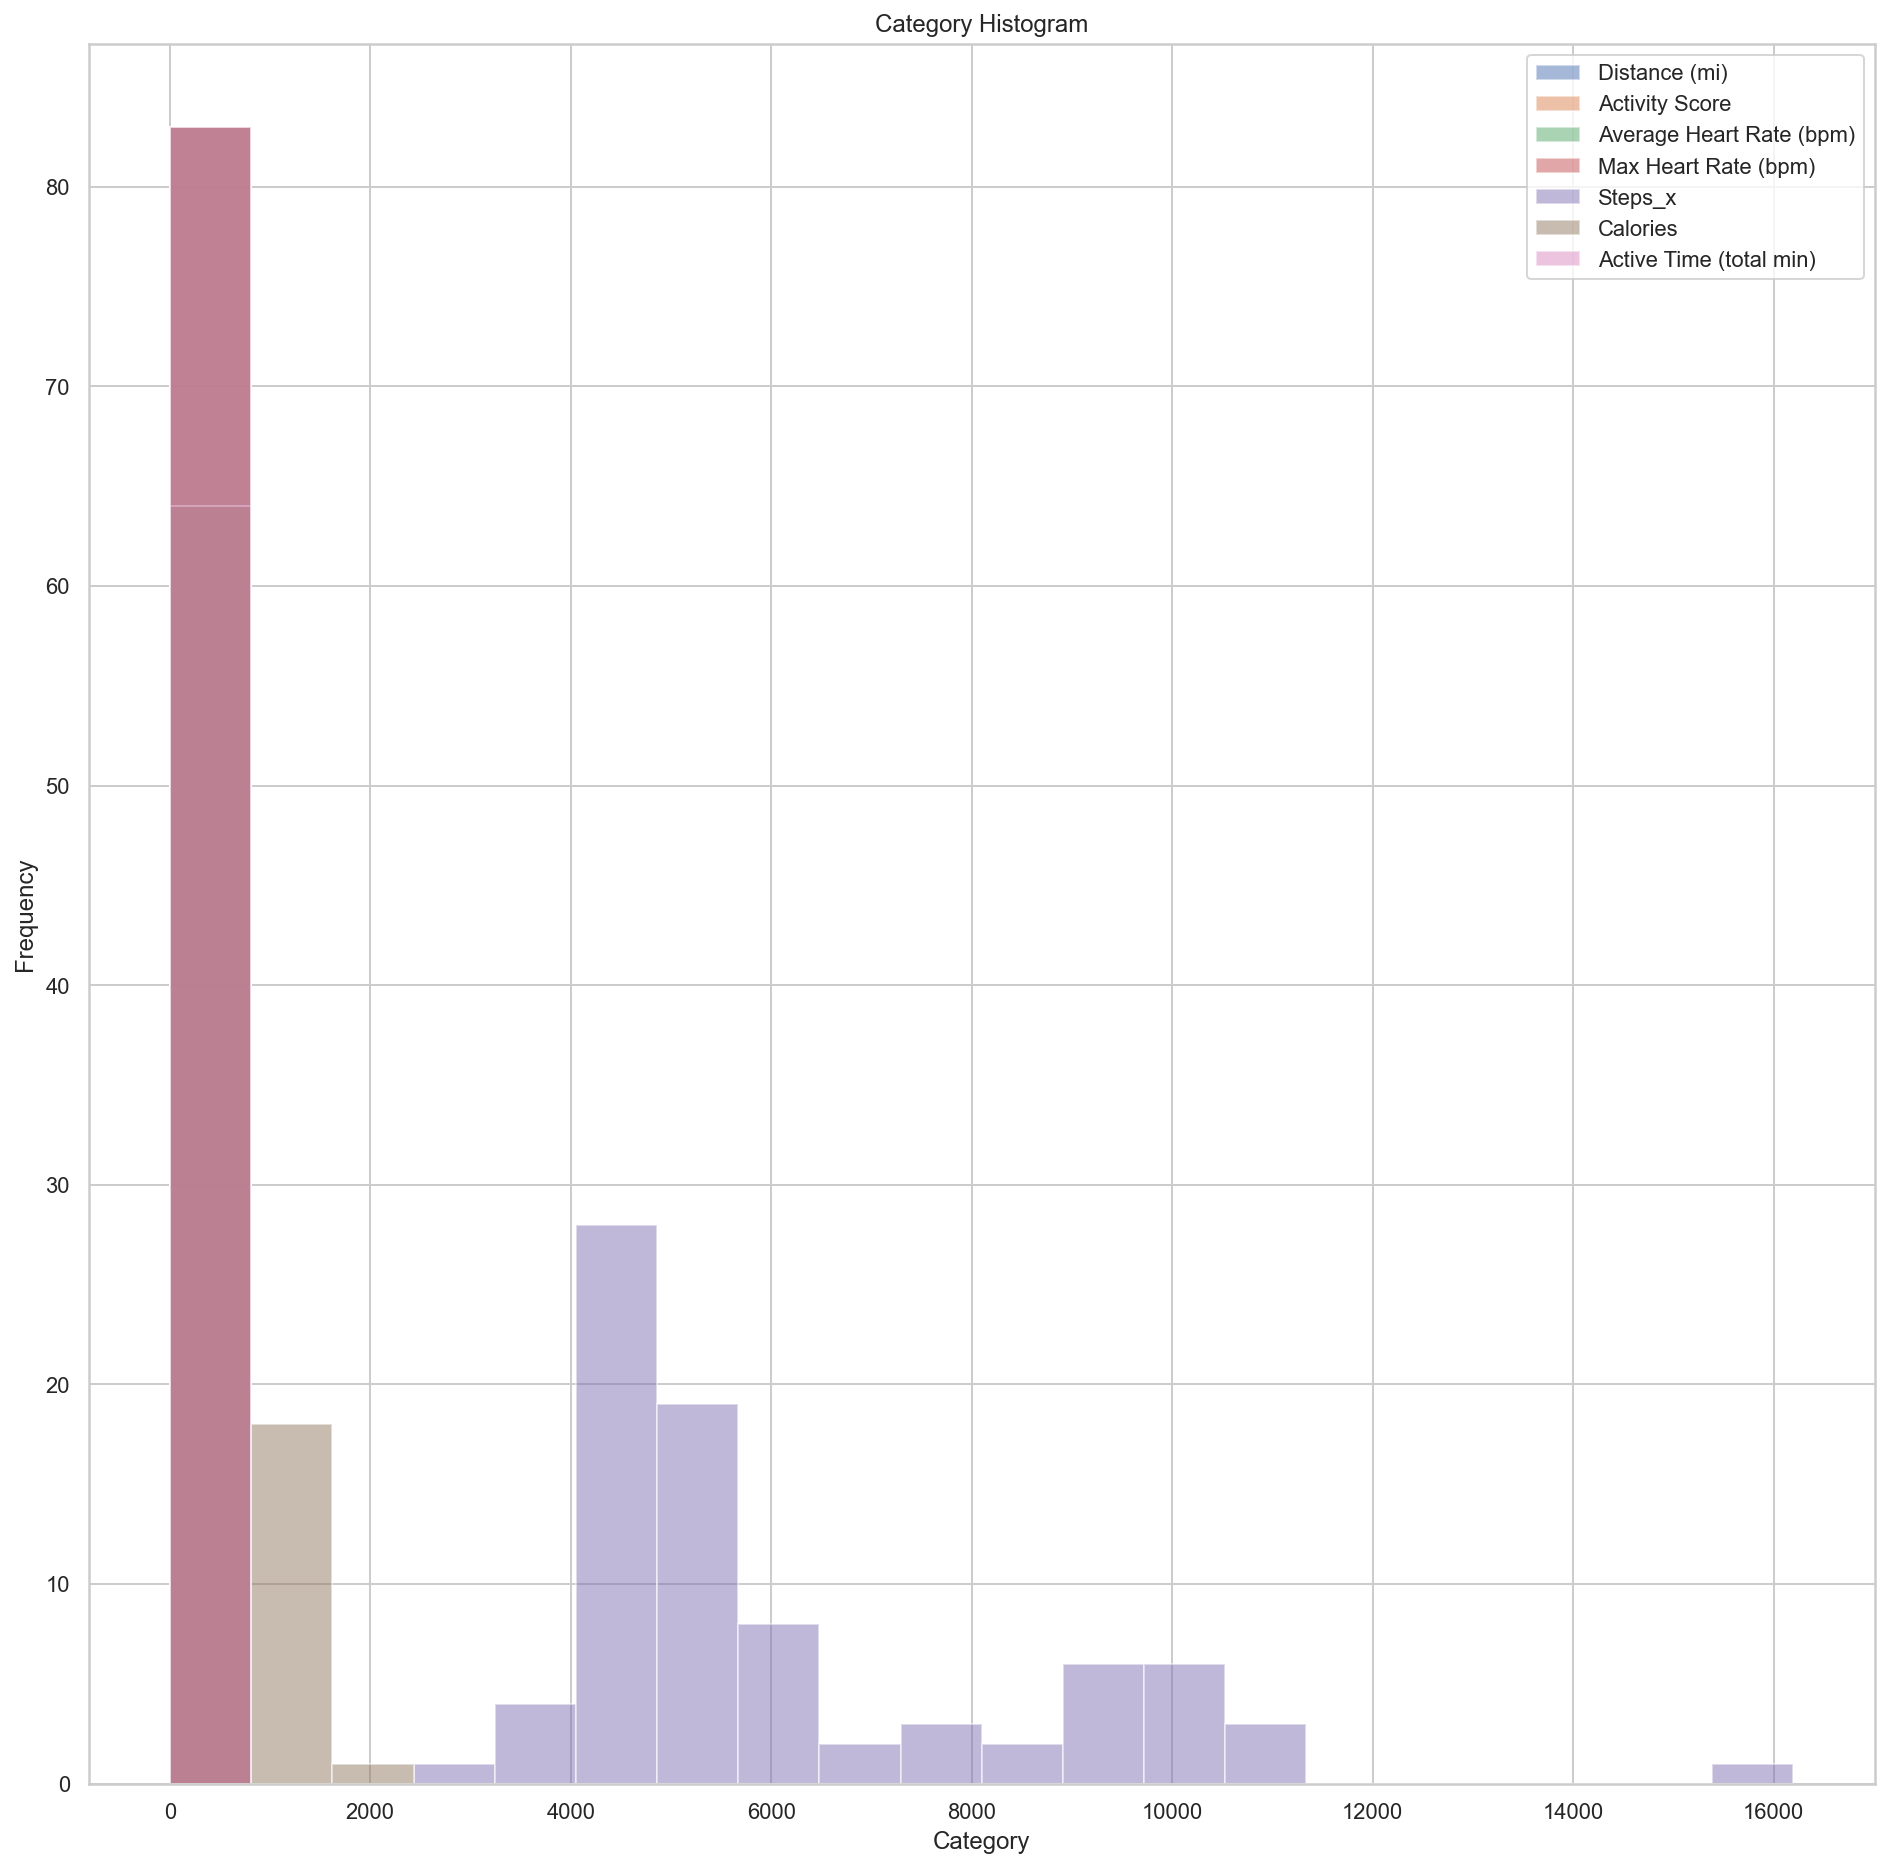

In [101]:
import seaborn as sns
sns.set_context('notebook')
# This uses the `.plot.hist` method
ax = rdf2.plot.hist(bins=20, alpha=0.5)
ax.set_xlabel('Category');
plt.title('Category Histogram')

Text(0.5, 1.0, 'Avg_Distance by Day')

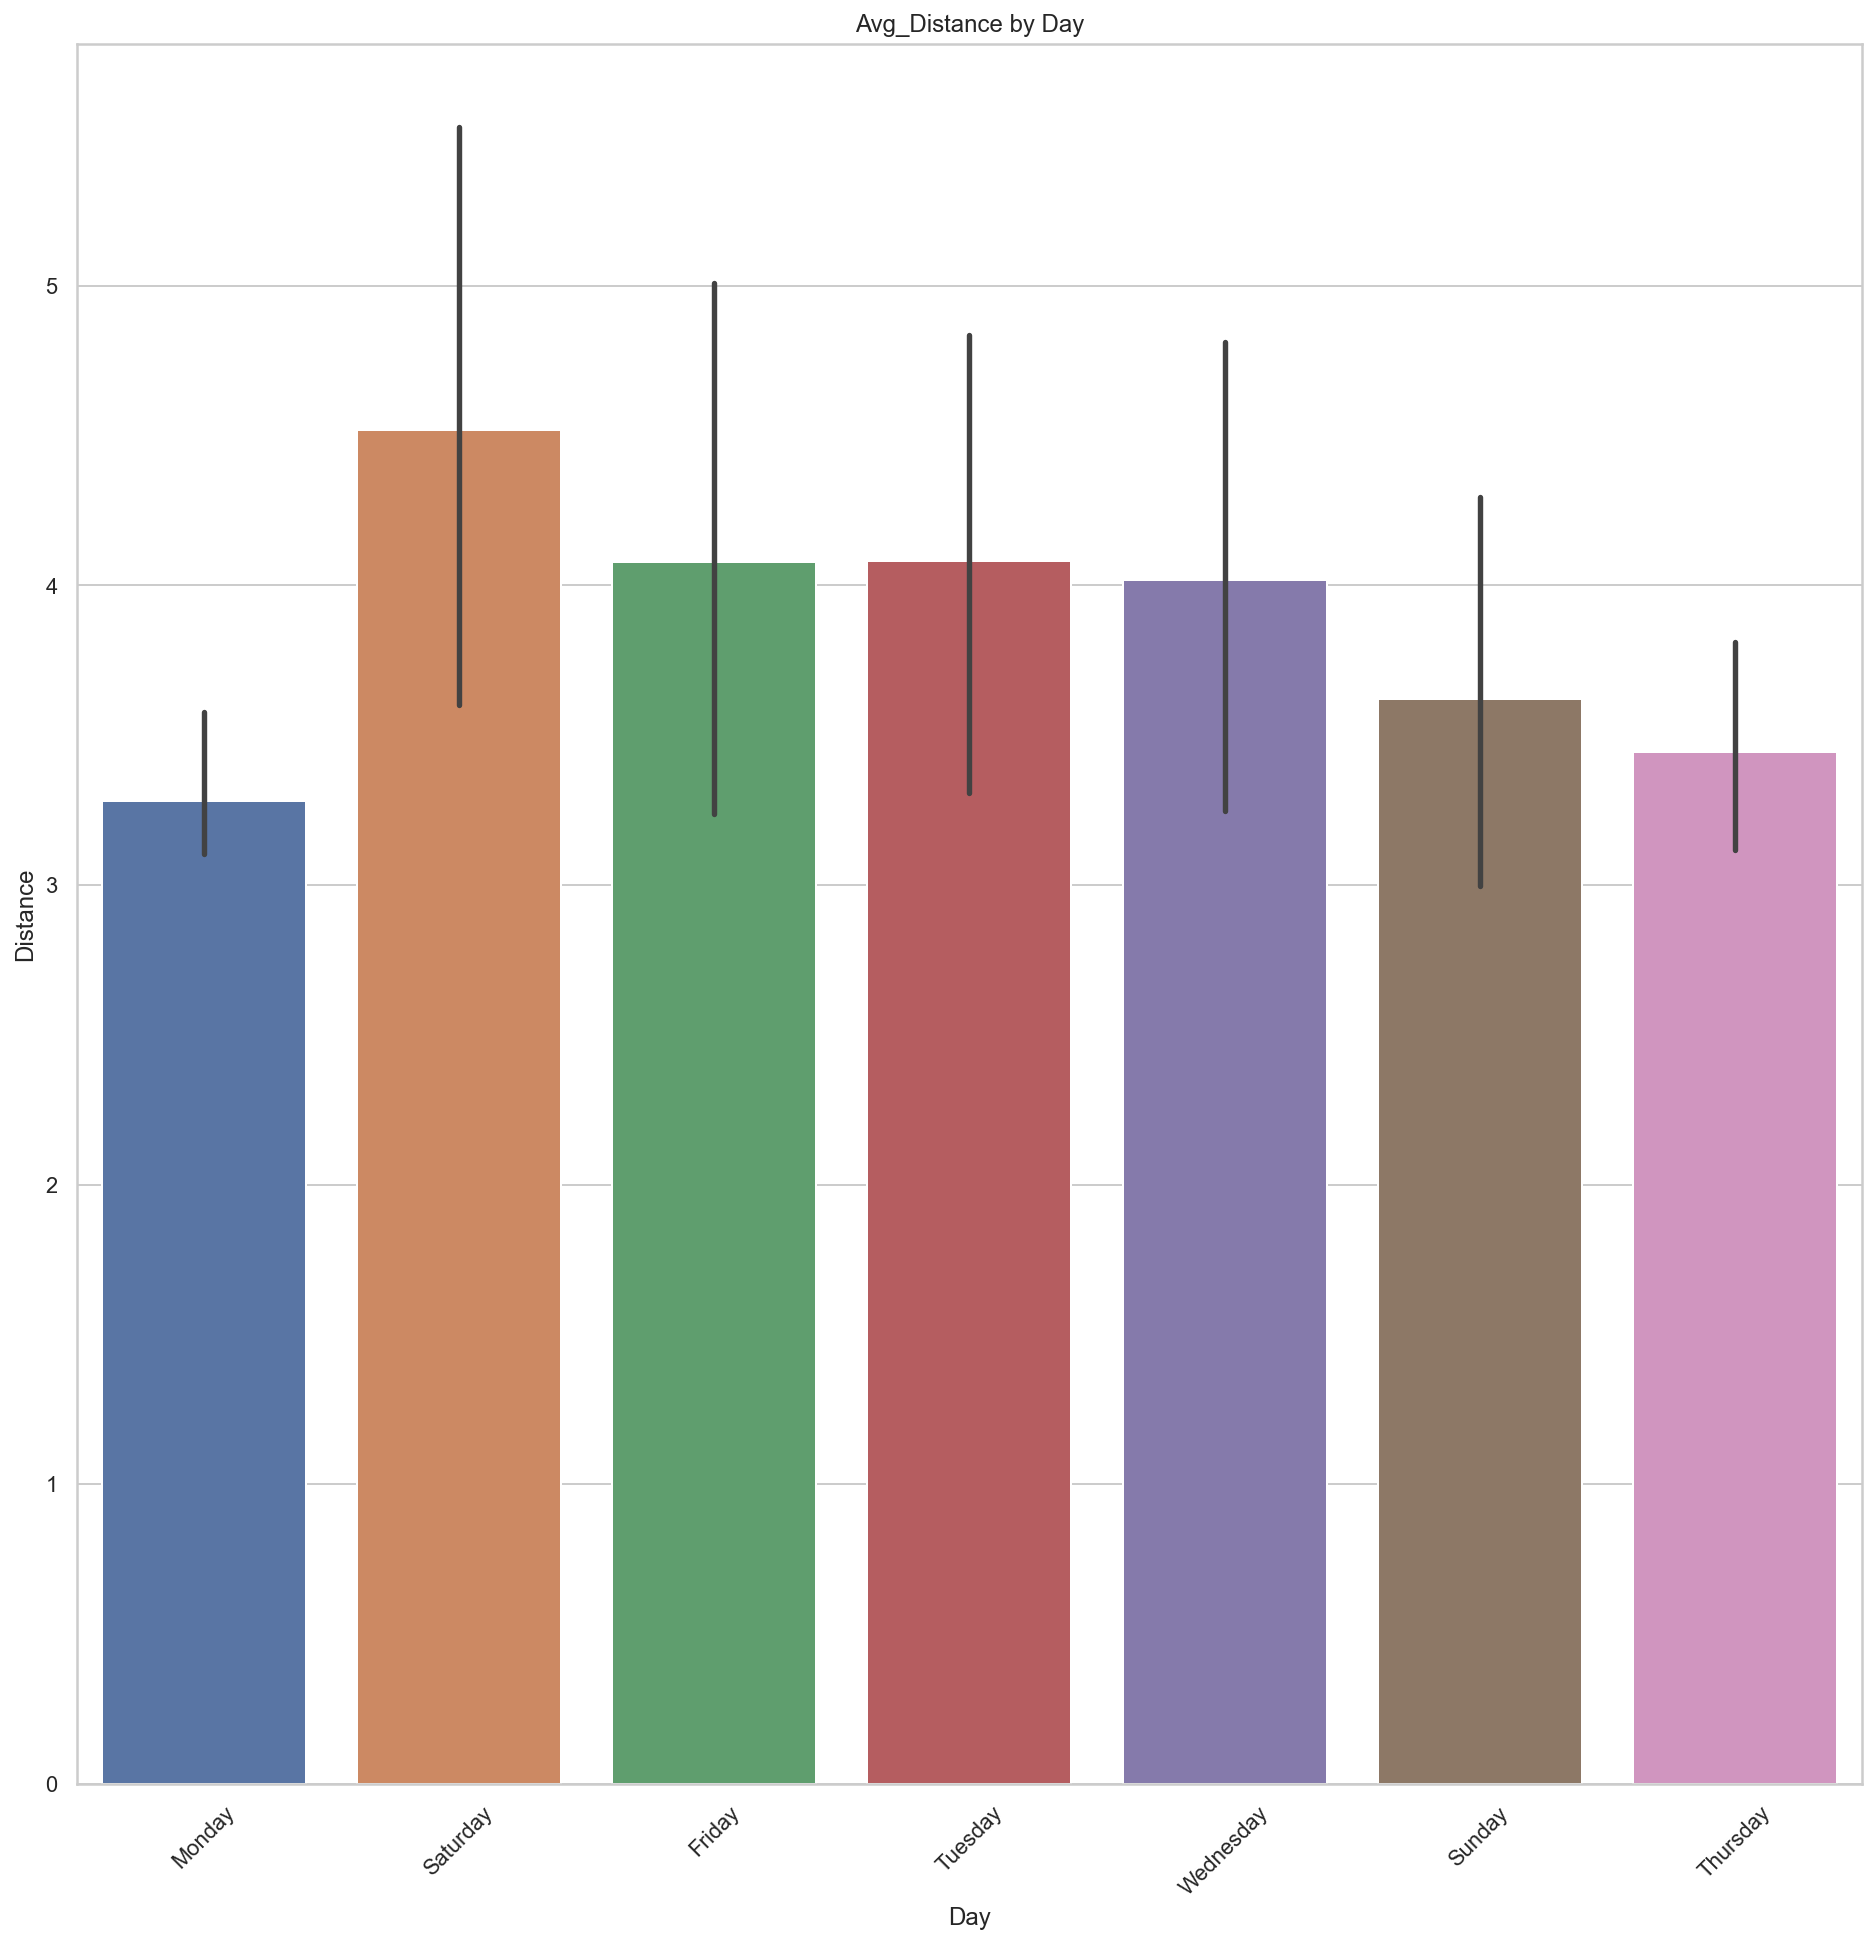

In [102]:
days = sns.barplot(x='day_of_week_start',y='Distance (mi)', data=rdf2)
plt.ylabel('Distance')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.title('Avg_Distance by Day')

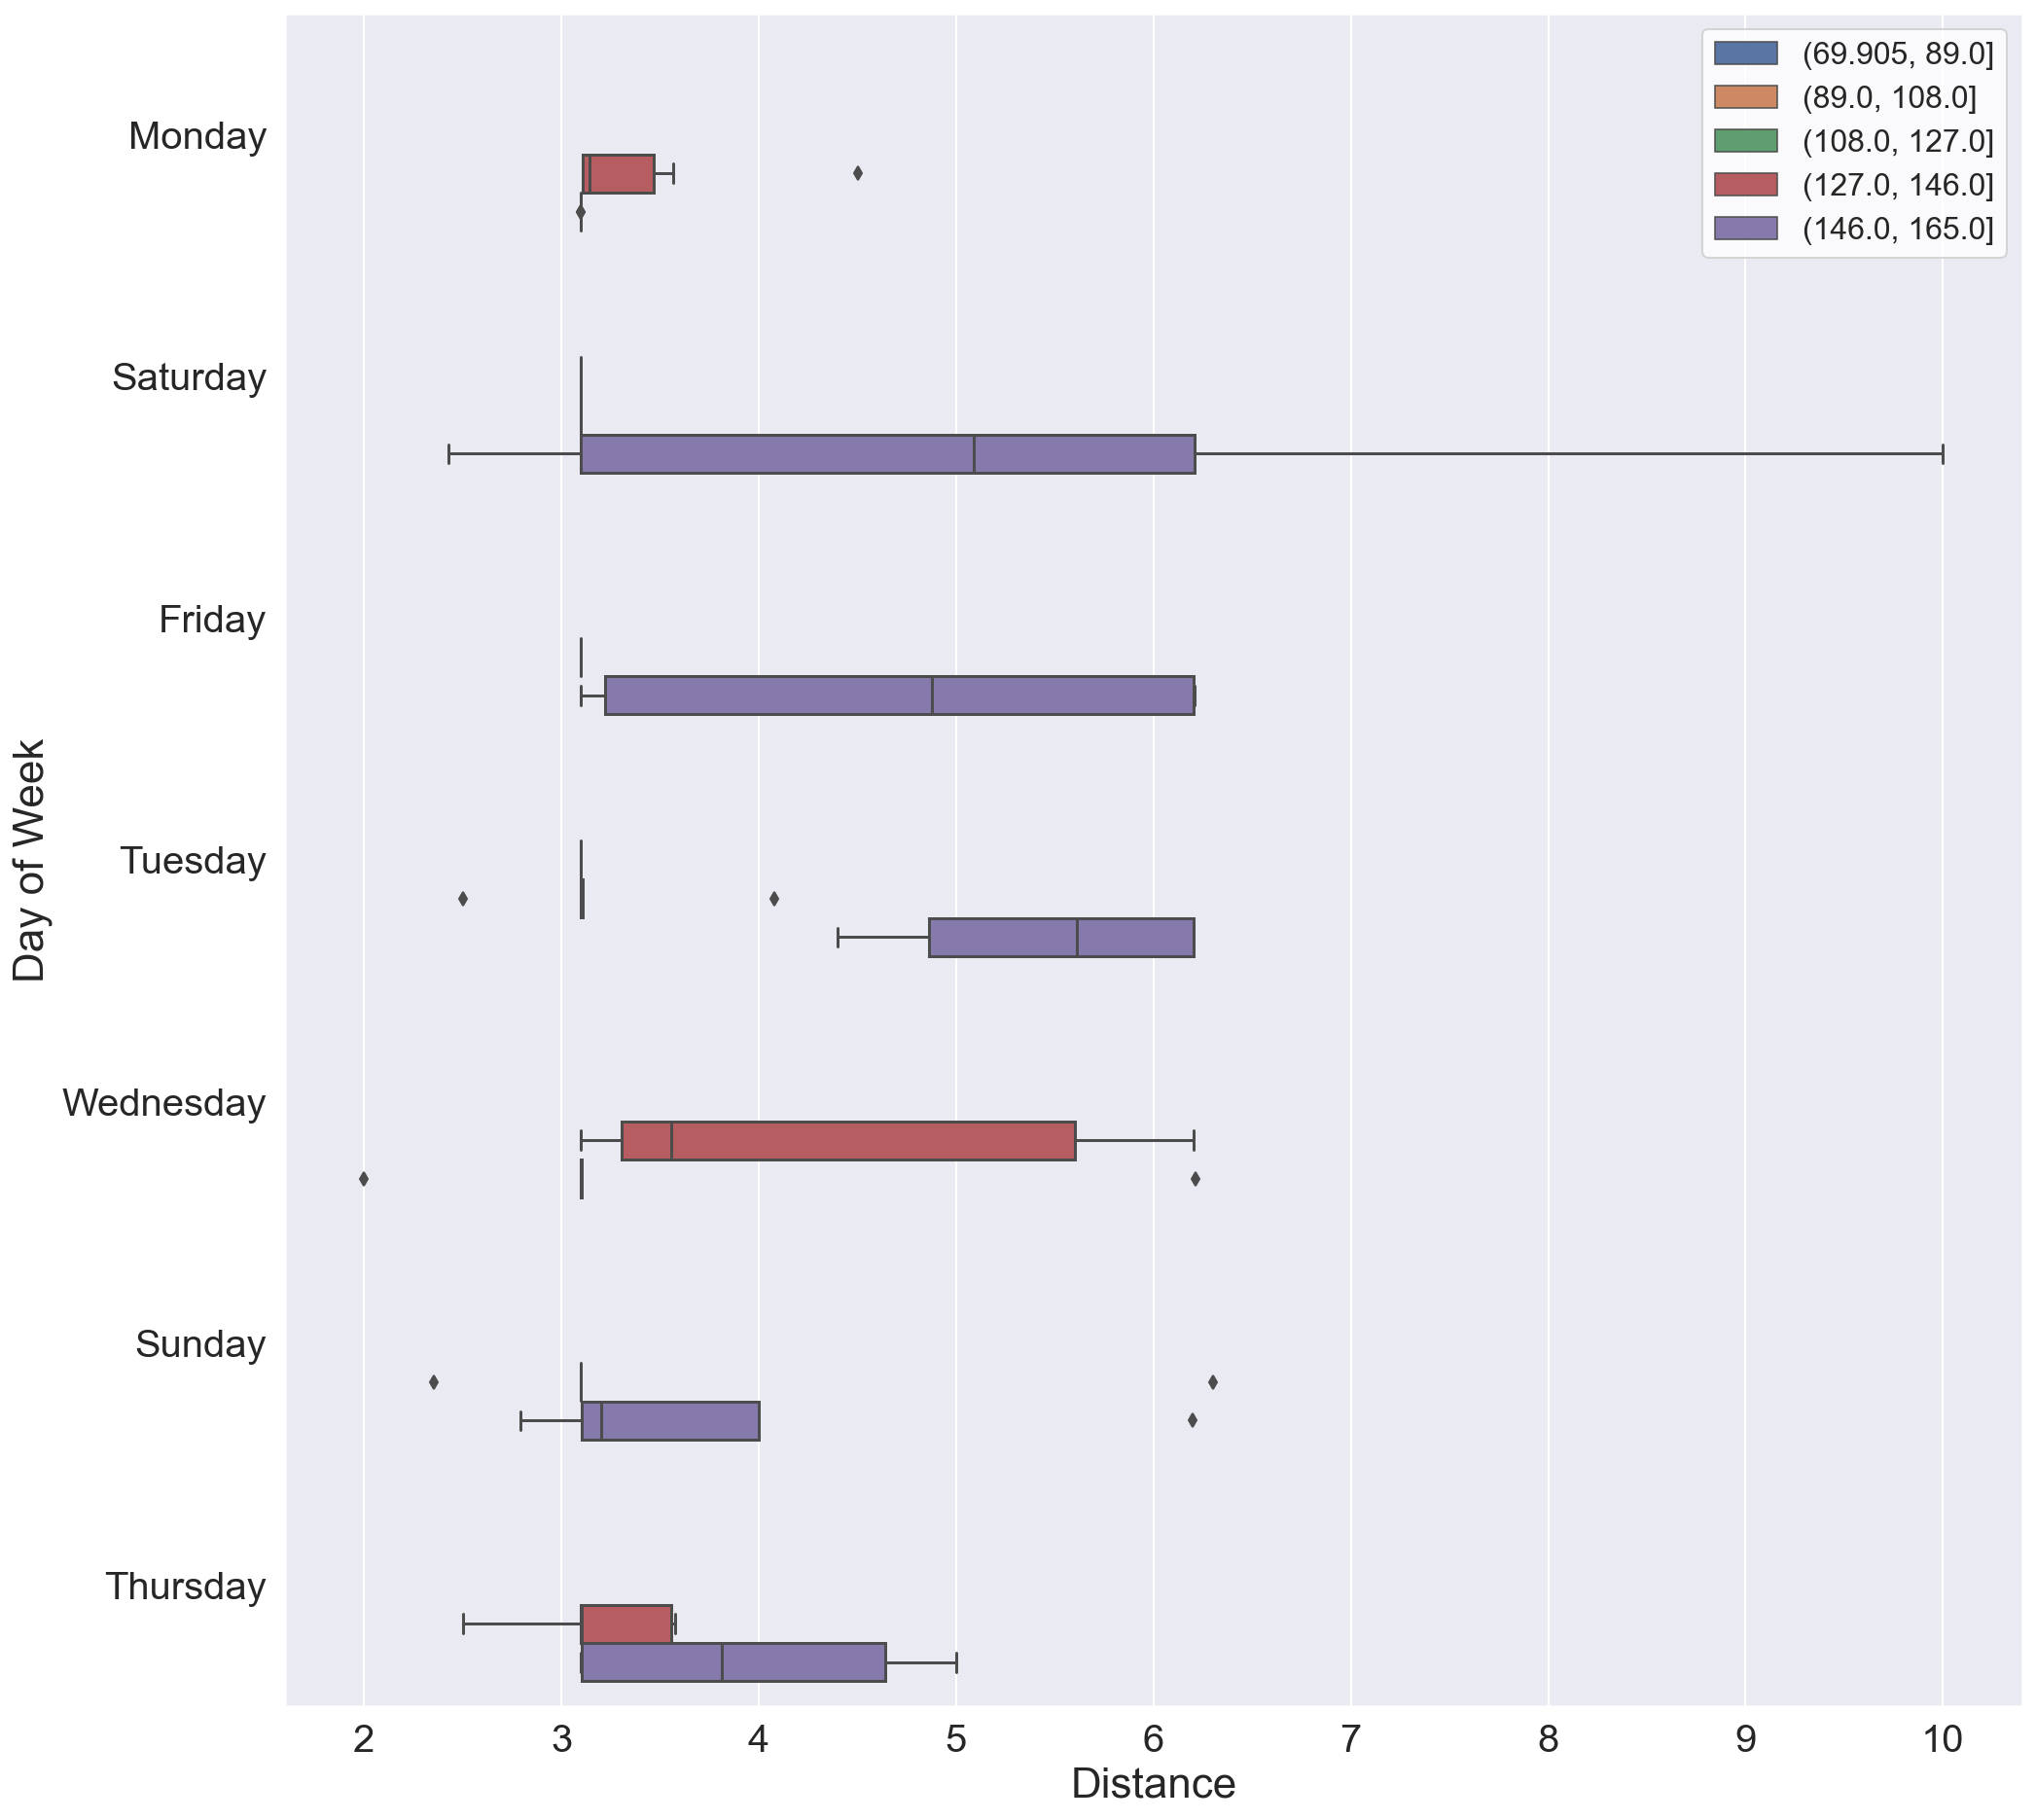

In [103]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4
jbox = sns.boxplot(x = 'Distance (mi)', y='day_of_week_start', data=rdf2, orient = 'h', hue = (pd.cut(df2['Average Heart Rate (bpm)'], bins = 5)))
sns.set_theme(style="whitegrid")
plt.ylabel('Day of Week', fontsize=22)
plt.xlabel('Distance', fontsize=22)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 16)

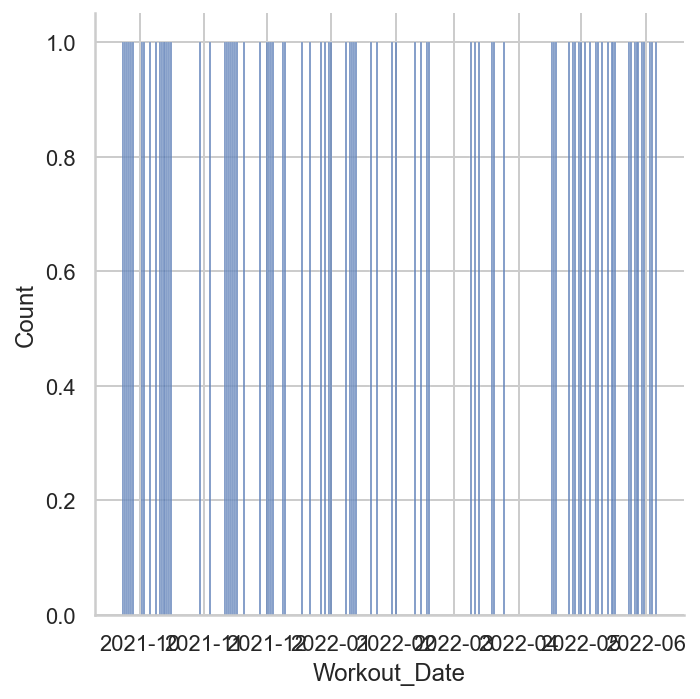

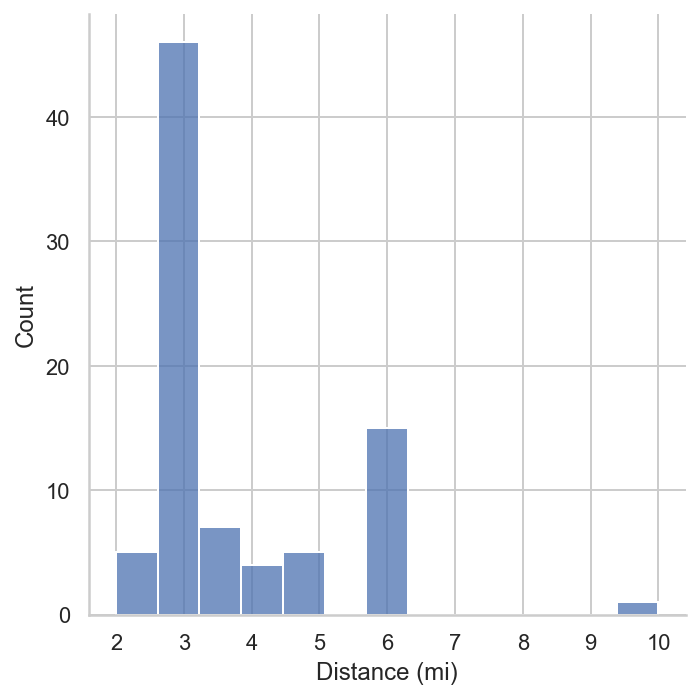

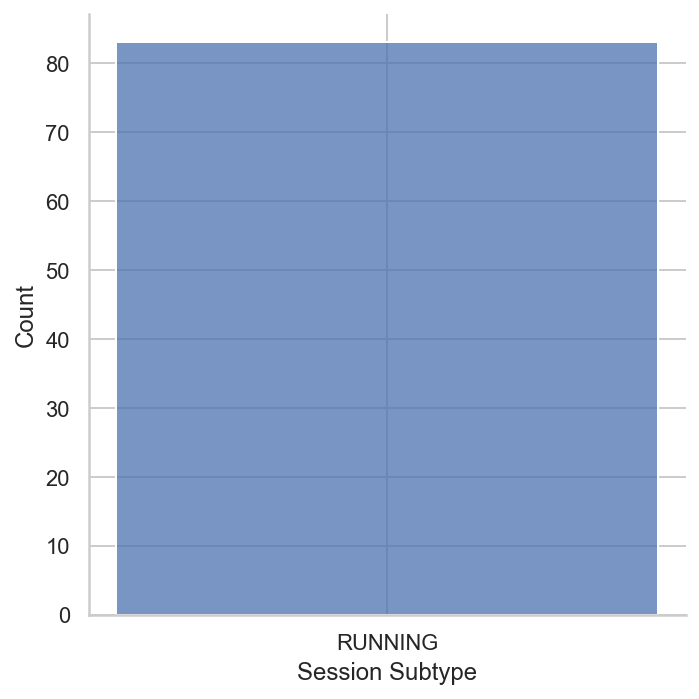

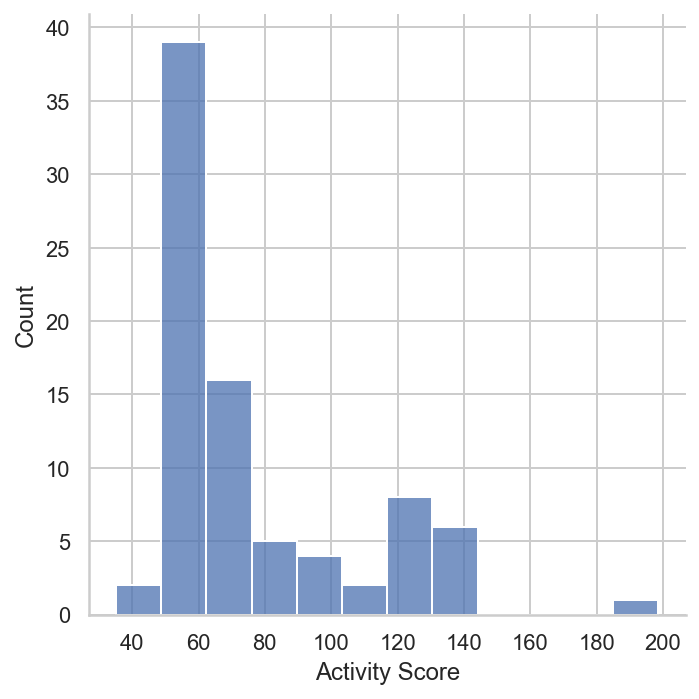

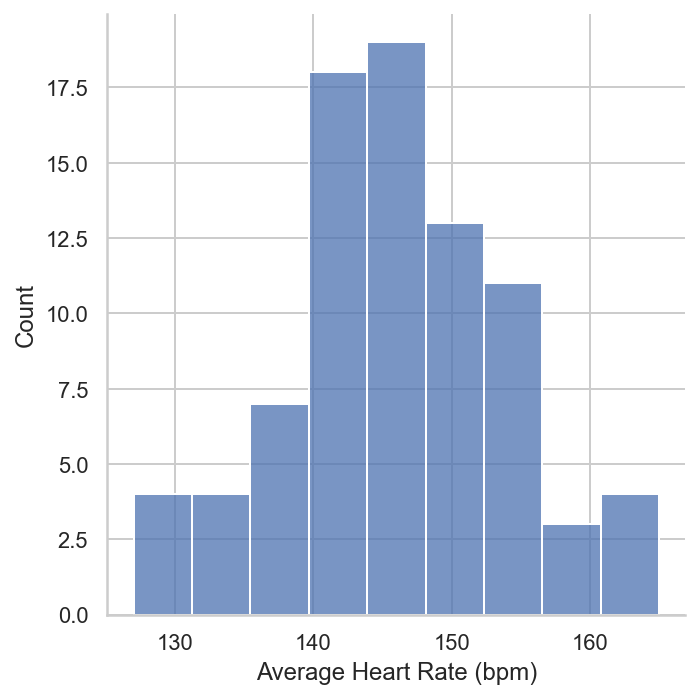

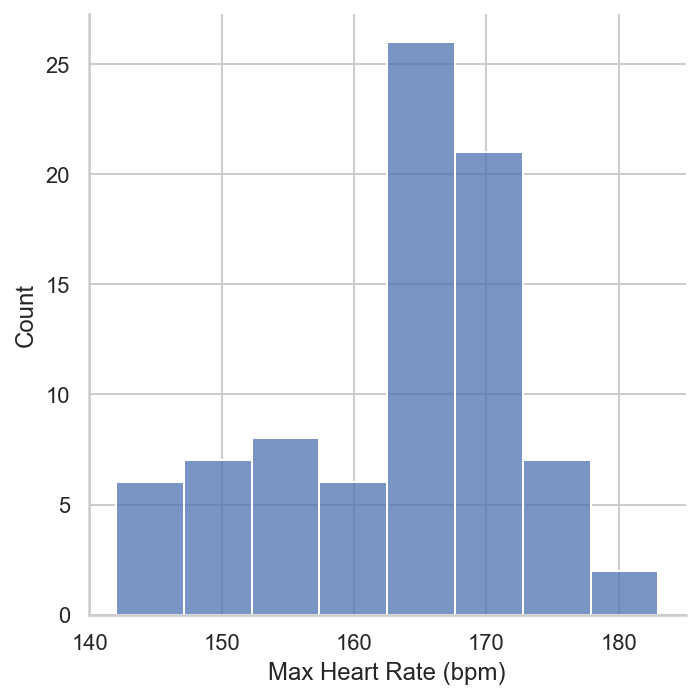

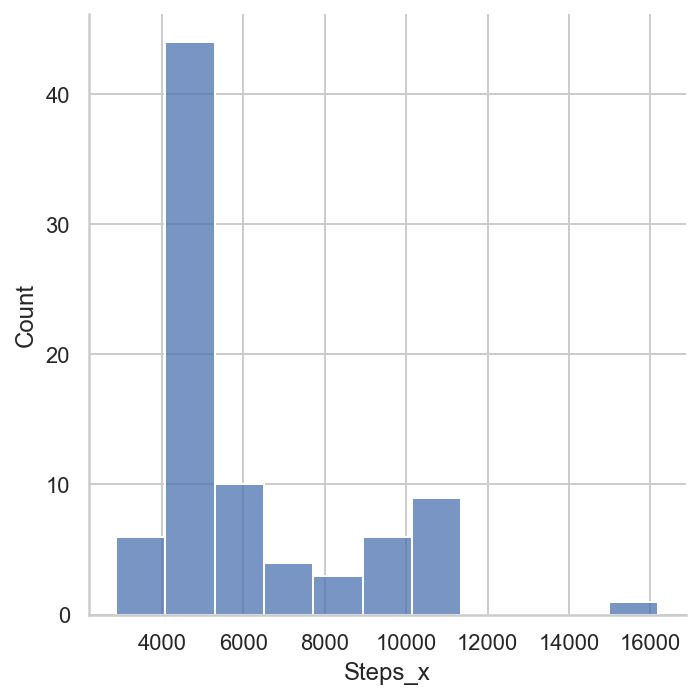

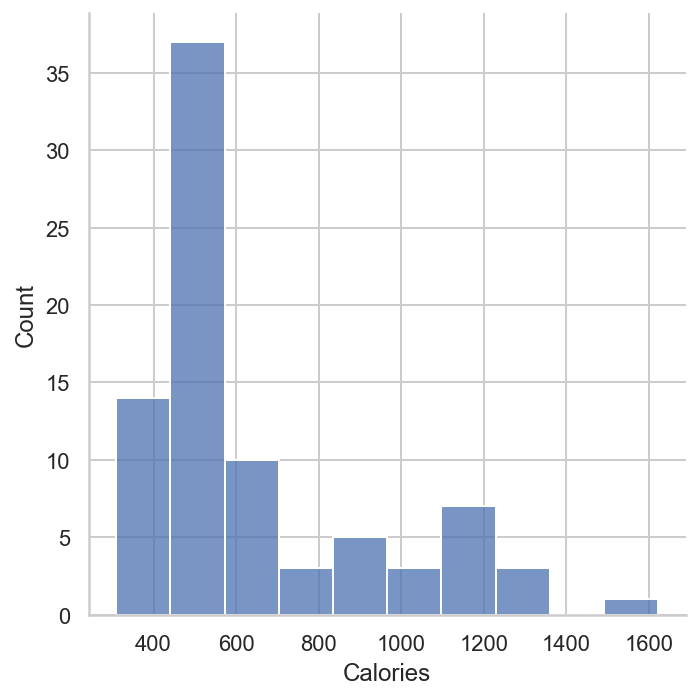

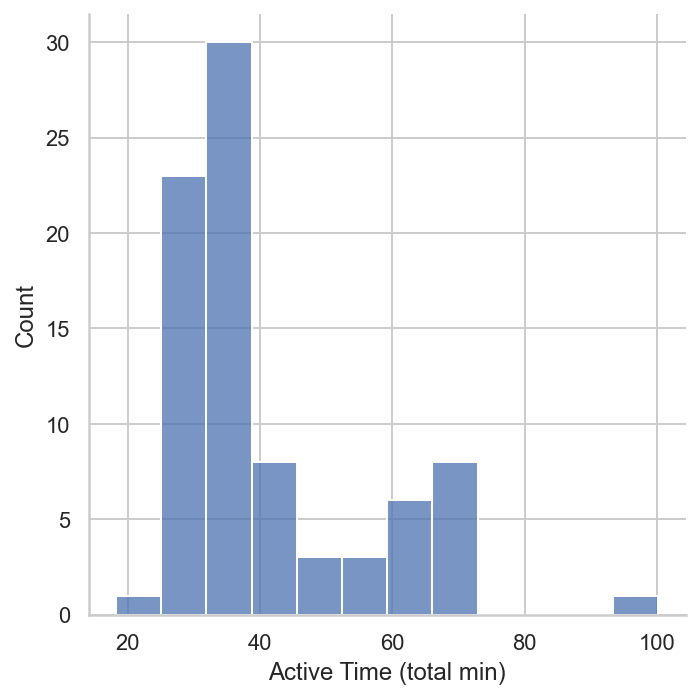

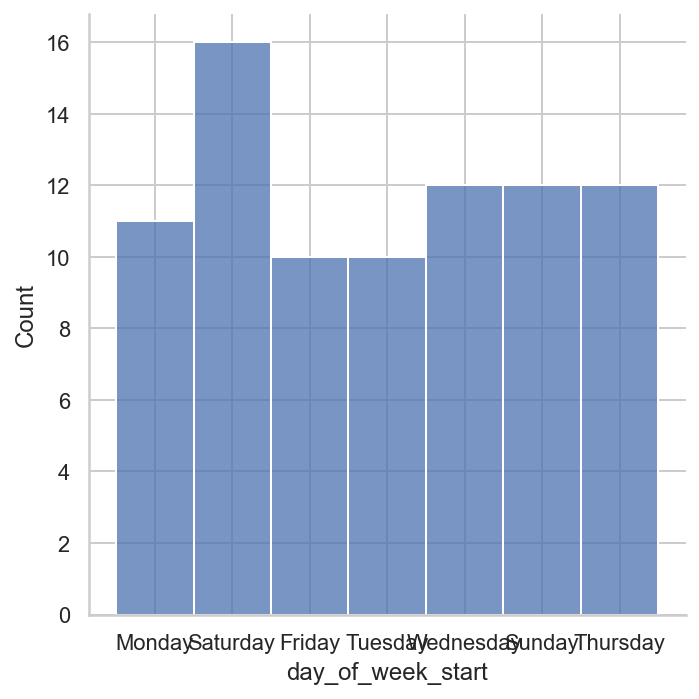

In [104]:
for column in rdf2:
    sns.displot(x=column, data=rdf2)

<AxesSubplot:xlabel='Session Subtype', ylabel='count'>

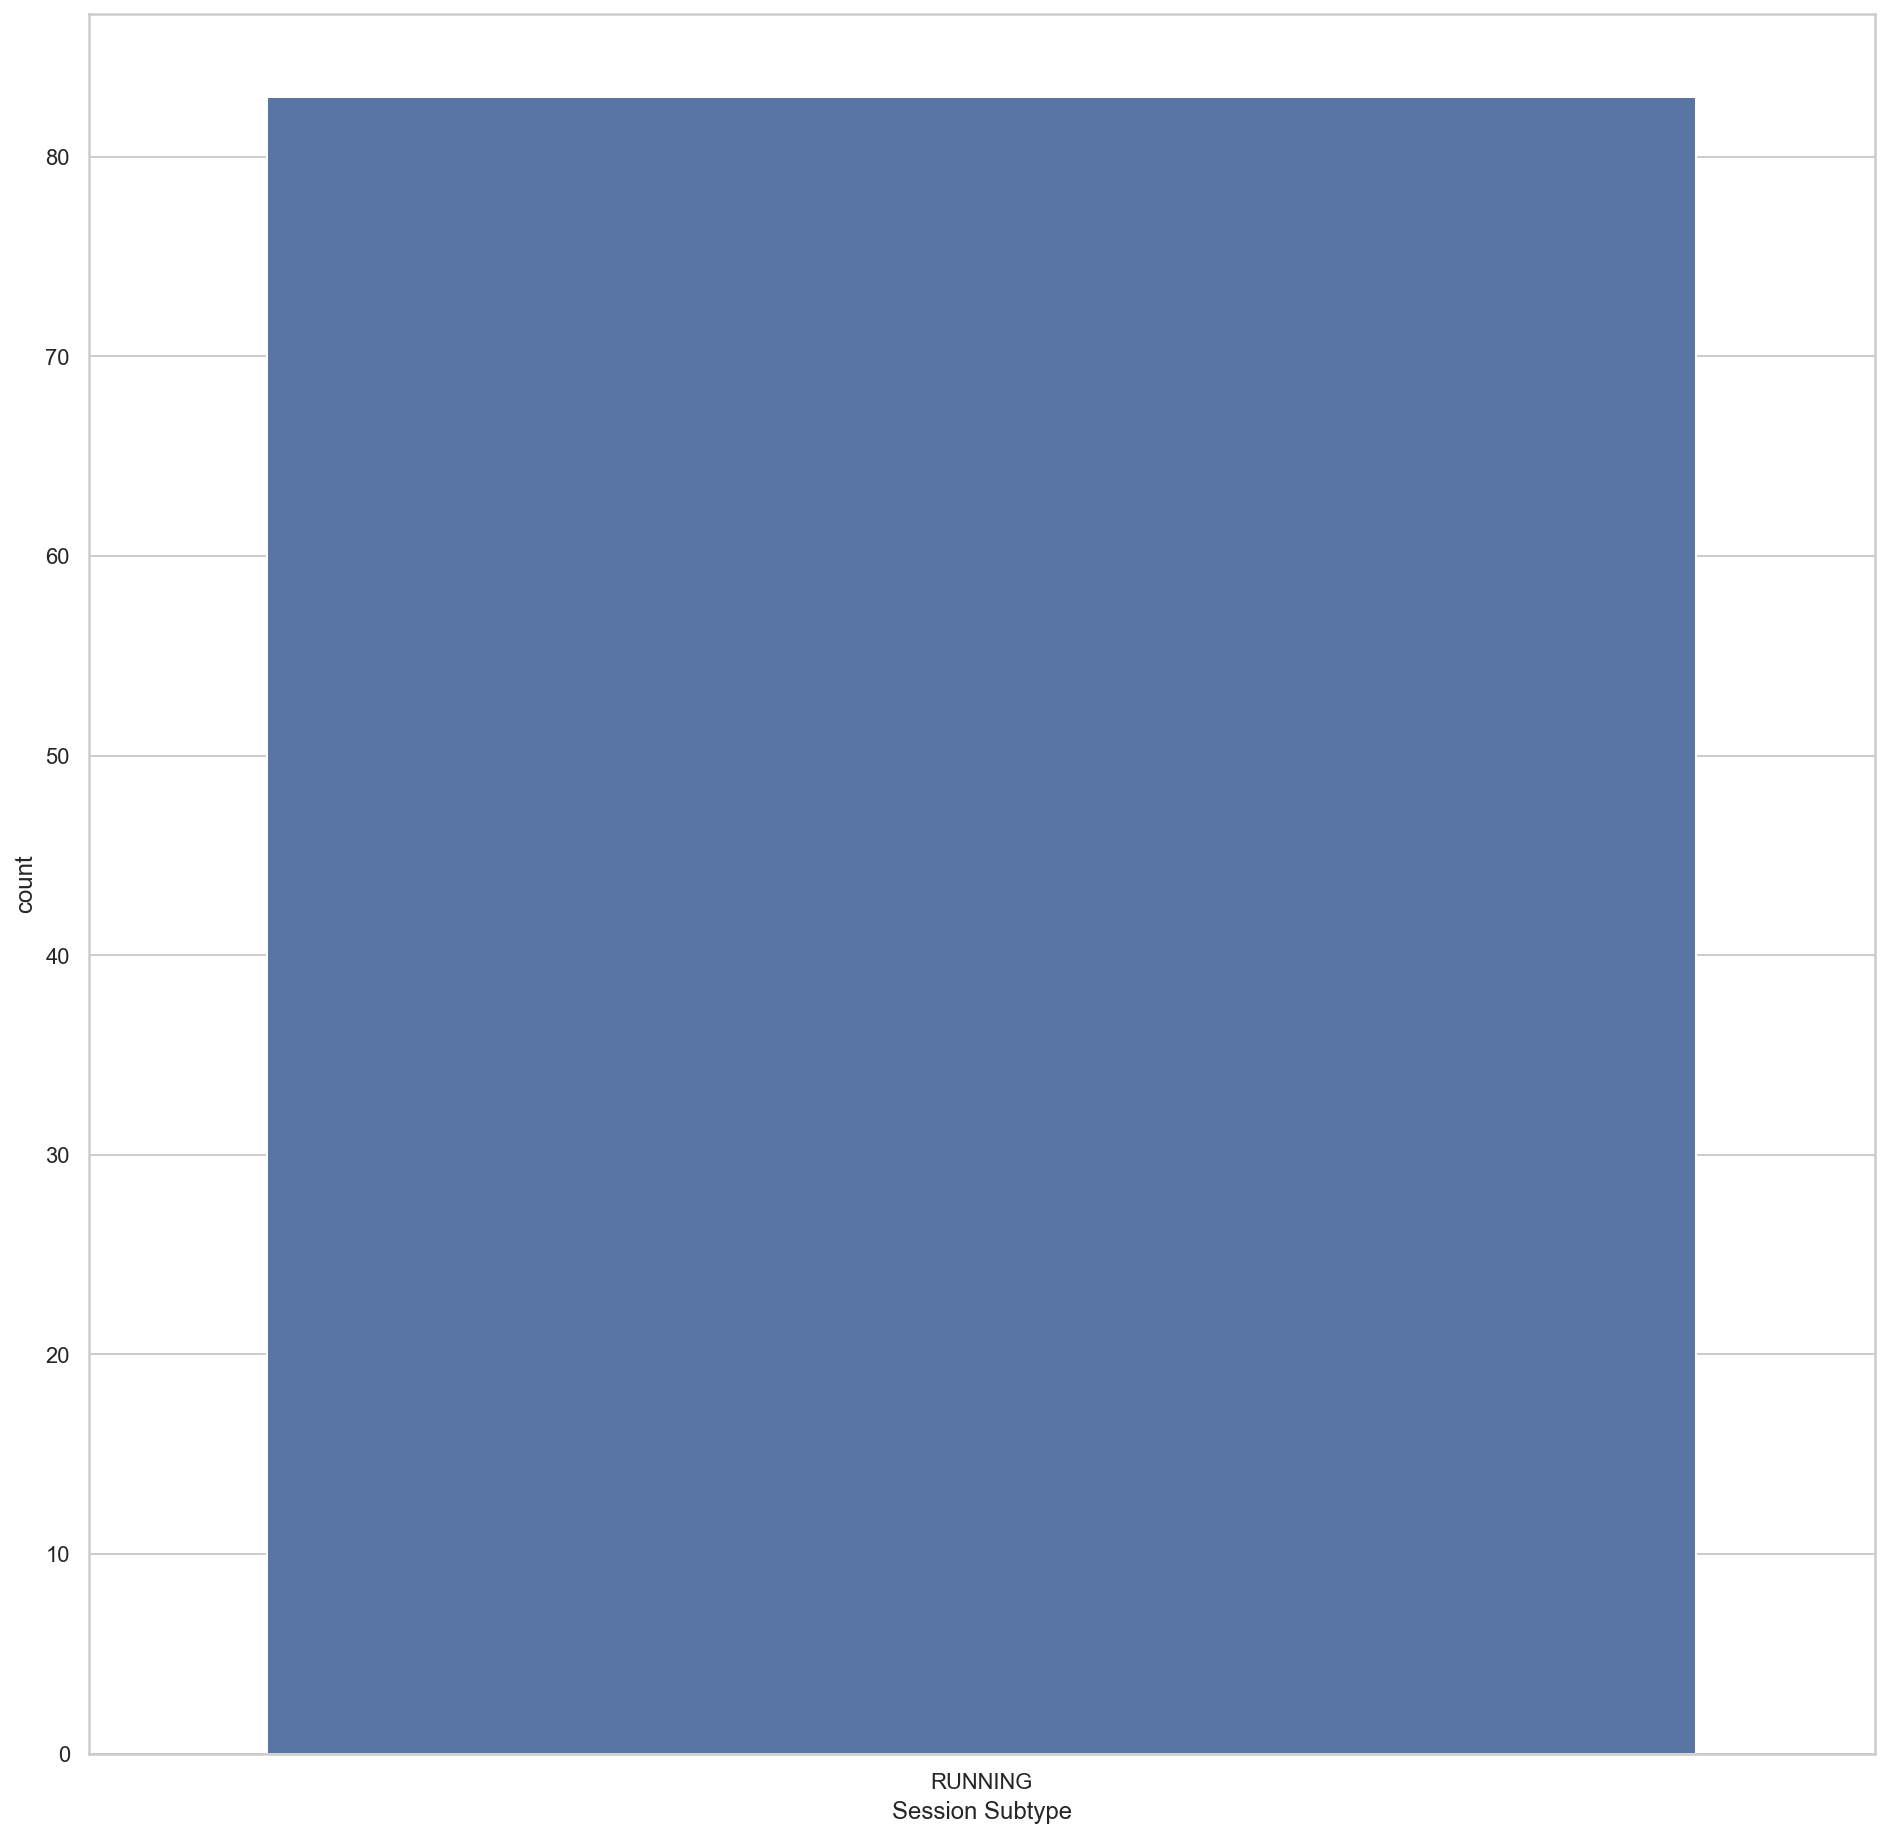

In [105]:
sns.countplot(x='Session Subtype', data=rdf2)

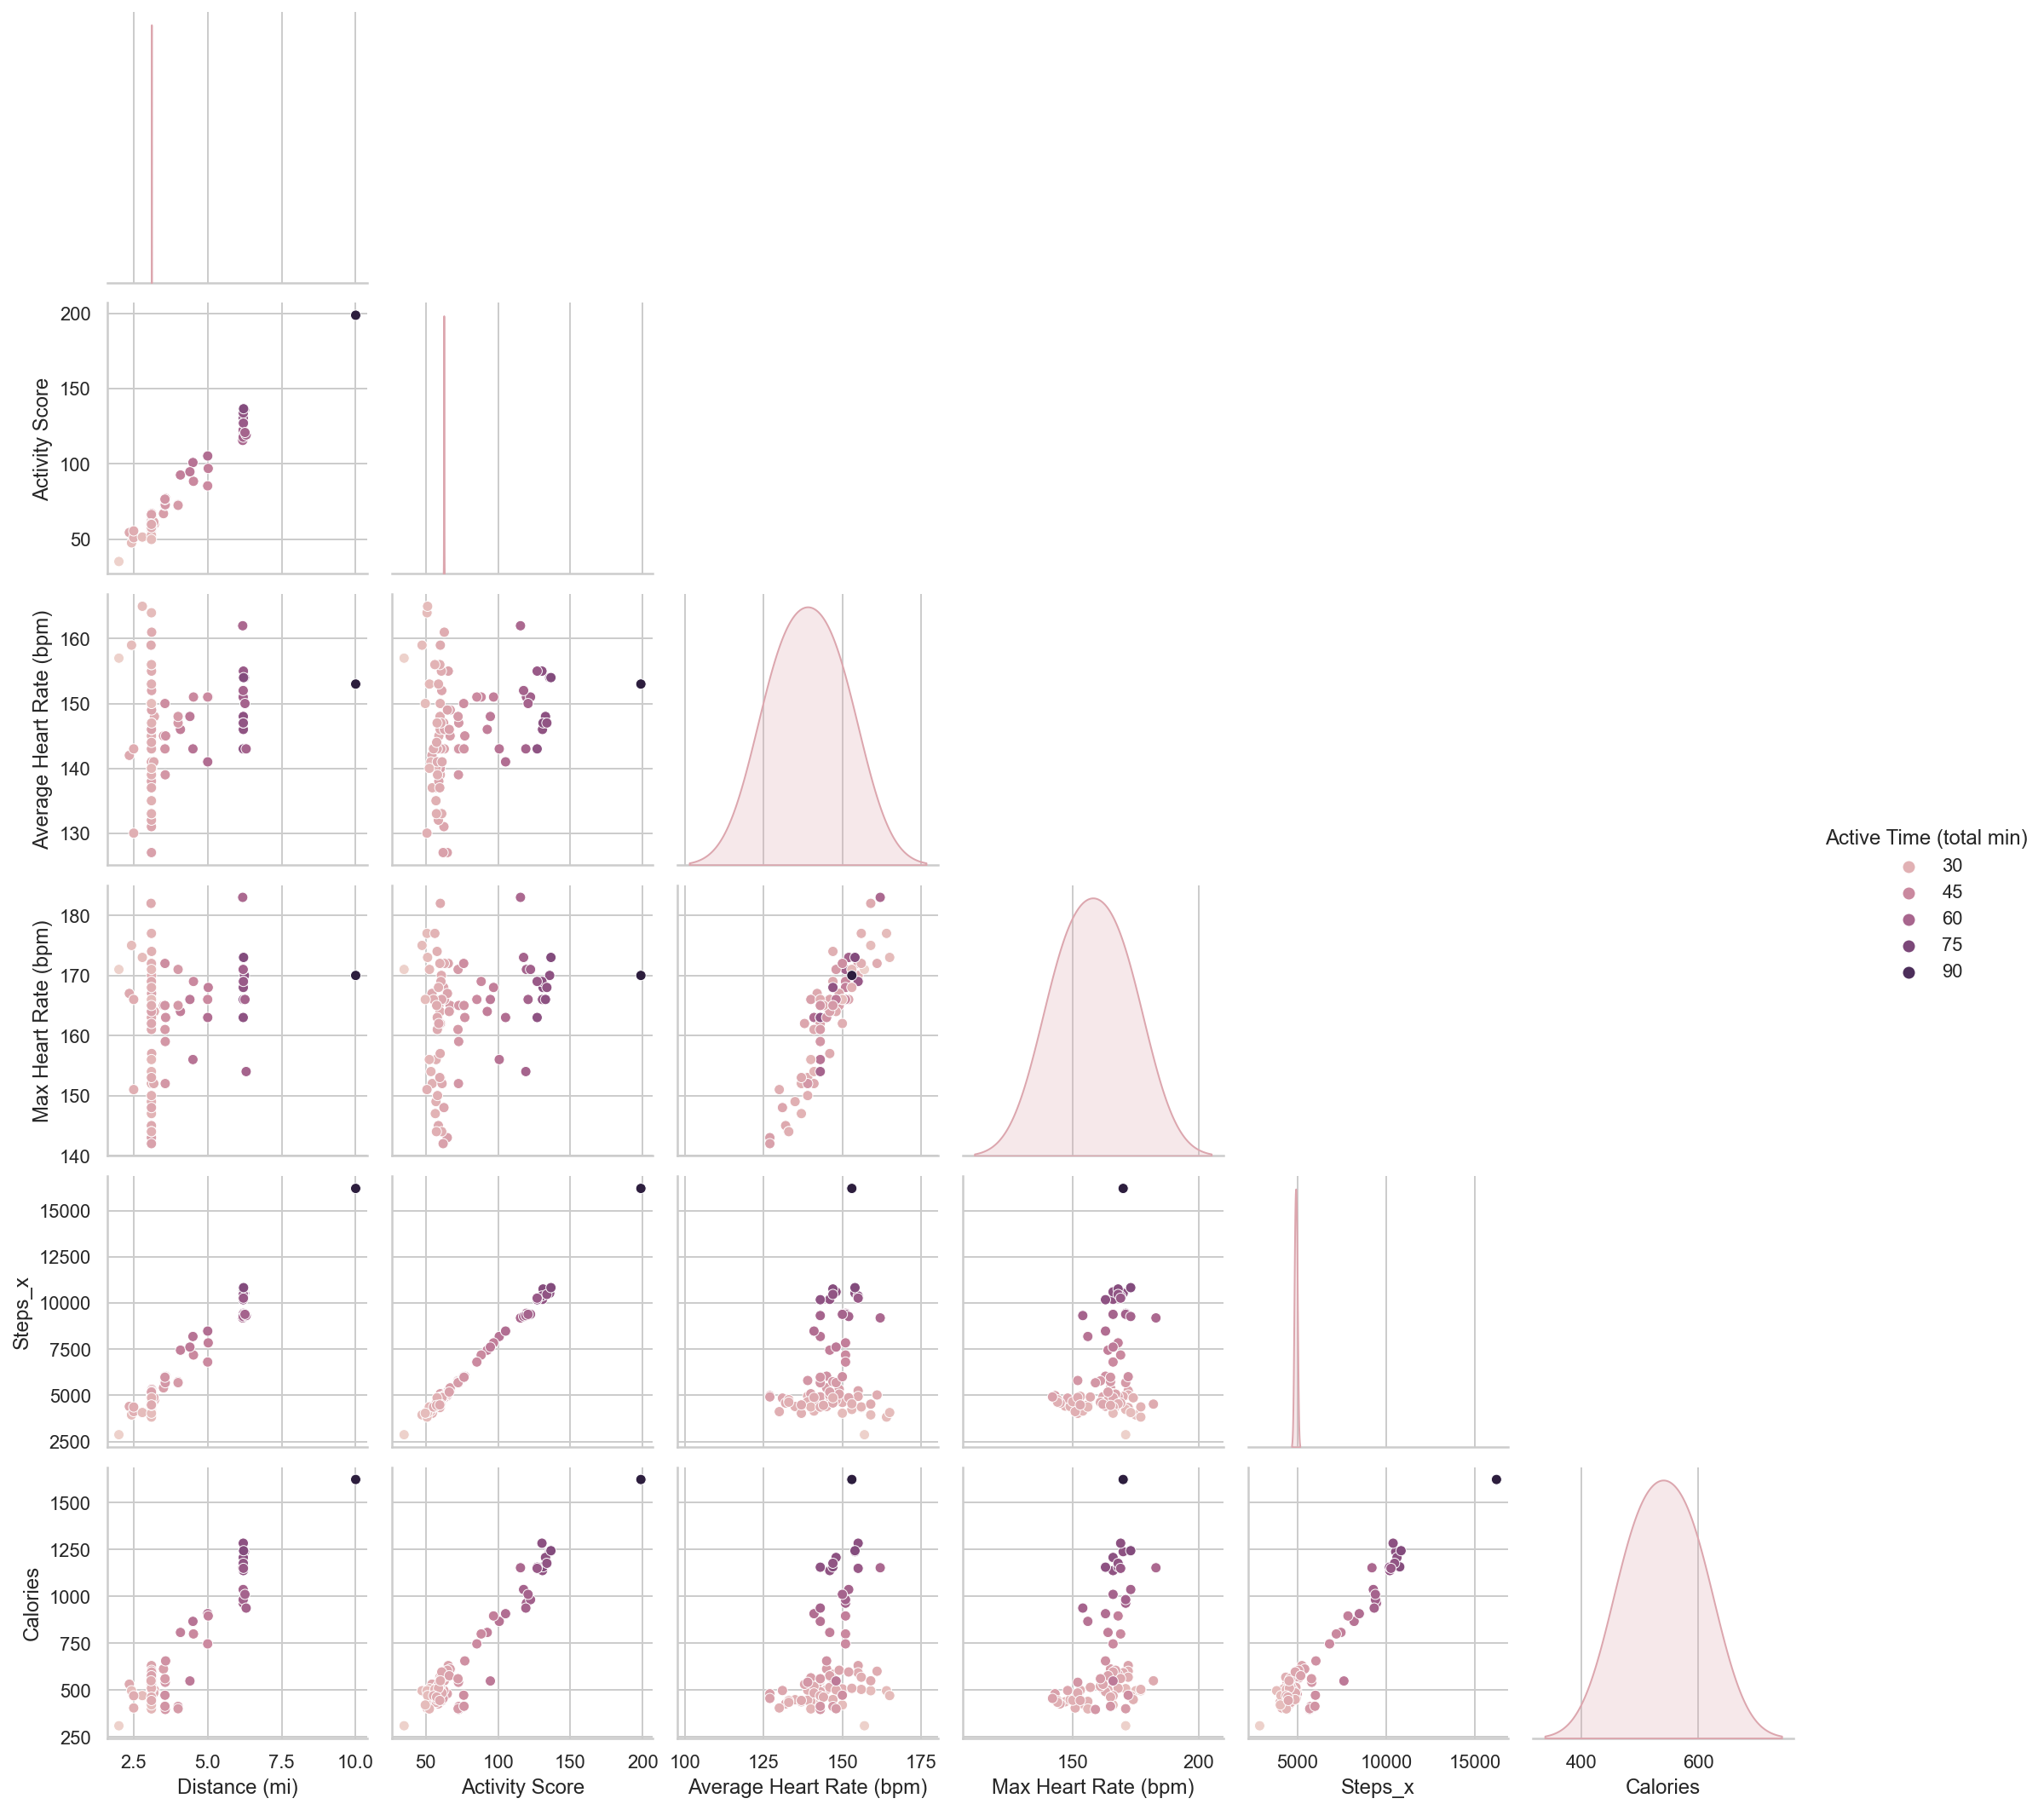

In [106]:
sns.pairplot(rdf2, corner=True, hue = 'Active Time (total min)')

# Train / Test Models

In [107]:
df4 = df2[['Distance (mi)','Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories']]

In [108]:
mask = df4.dtypes == np.object
categorical_cols = df4.columns[mask]

In [109]:
import numpy as np
num_ohc_cols = (df4[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

0.0

In [110]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = df4

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [111]:
data_ohc.shape[1] - df2.shape[1]
df4 = df4

In [112]:
from sklearn.model_selection import train_test_split

y_col = 'Distance (mi)'

# Split the data that is not one-hot encoded
feature_cols = [x for x in df4.columns if x != y_col]
X_data = df4[feature_cols]
y_data = df4[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [113]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()
df4.columns

Index(['Distance (mi)', 'Activity Score', 'Average Heart Rate (bpm)',
       'Max Heart Rate (bpm)', 'Steps_x', 'Calories'],
      dtype='object')

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

no enc  one-hot enc
train  5.725376     5.725376
test   5.565619     5.565619

In [115]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

not_encoded - standardscaling        5.565619
not_encoded - minmaxscaling          5.565619
not_encoded - maxabsscaling          5.565619
one_hot_encoded - standardscaling    5.565619
one_hot_encoded - minmaxscaling      5.565619
one_hot_encoded - maxabsscaling      5.565619
--------------------------------------------------------------------------------
not_encoded - standardscaling 5.565618616813876
not_encoded - minmaxscaling 5.565618616813877
not_encoded - maxabsscaling 5.565618616813877
one_hot_encoded - standardscaling 5.565618616813876
one_hot_encoded - minmaxscaling 5.565618616813877
one_hot_encoded - maxabsscaling 5.565618616813877


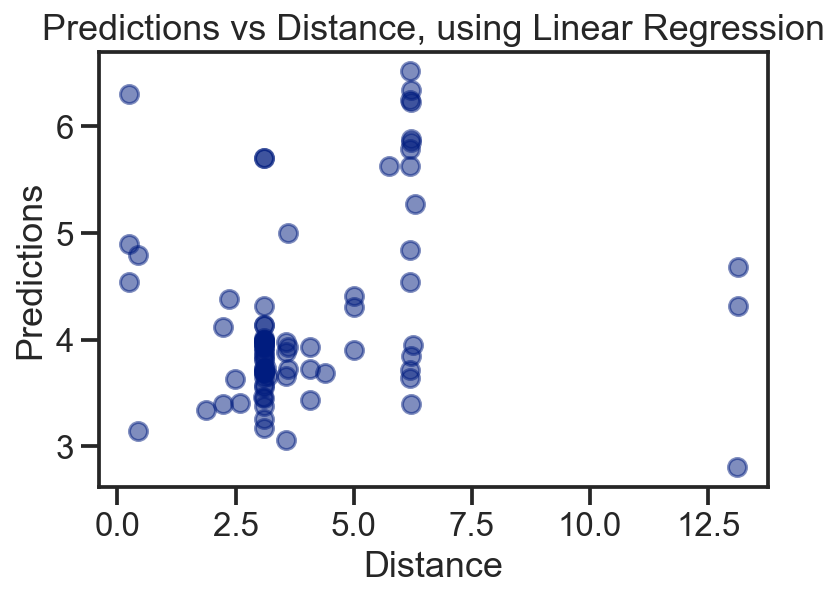

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Distance', 
       ylabel='Predictions',
       title='Predictions vs Distance, using Linear Regression');

# Machine Learning Foundation

## Section 2, Part c: Cross Validation 

In [118]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [119]:
# verify the shape of the array (rows by a single column)
X = df4.drop('Distance (mi)', axis=1)
y = df4['Distance (mi)']

In [120]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [121]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 2  7  8  9 10 11 12 13 14 18] 177
Test index: [ 0  1  3  4  5  6 15 16 17 19] 89

Train index: [ 0  1  2  3  4  5  6  7 10 12] 177
Test index: [ 8  9 11 22 27 30 32 33 34 35] 89

Train index: [ 0  1  3  4  5  6  8  9 11 15] 178
Test index: [ 2  7 10 12 13 14 18 20 21 23] 88



In [122]:
s = StandardScaler()
lr = LinearRegression()

In [123]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [124]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [125]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [126]:
r2_score(y, predictions)

0.023769751061718636

In [214]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [215]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [216]:
list(zip(alphas,scores))

[(1e-09, 0.007527908492173663),
 (1e-08, 0.0075279219734508684),
 (1e-07, 0.007528057293522683),
 (1e-06, 0.007529416146836887),
 (1e-05, 0.007543046062633563),
 (0.0001, 0.007584757925939711),
 (0.001, 0.008891638986663897),
 (0.01, 0.015880327327990718),
 (0.1, 0.020222055652276194),
 (1.0, -0.011644964143384895)]

In [217]:
np.mean(scores) # difference of .08

0.007859016571810328

In [218]:
Lasso(alpha=1e-6).fit(X, y).coef_

array([ 0.01233142, -0.03412163,  0.00079418, -0.00038179,  0.00568443])

In [219]:
Lasso(alpha=1.0).fit(X, y).coef_

array([ 0.        , -0.0265801 , -0.        , -0.00029835,  0.00592941])

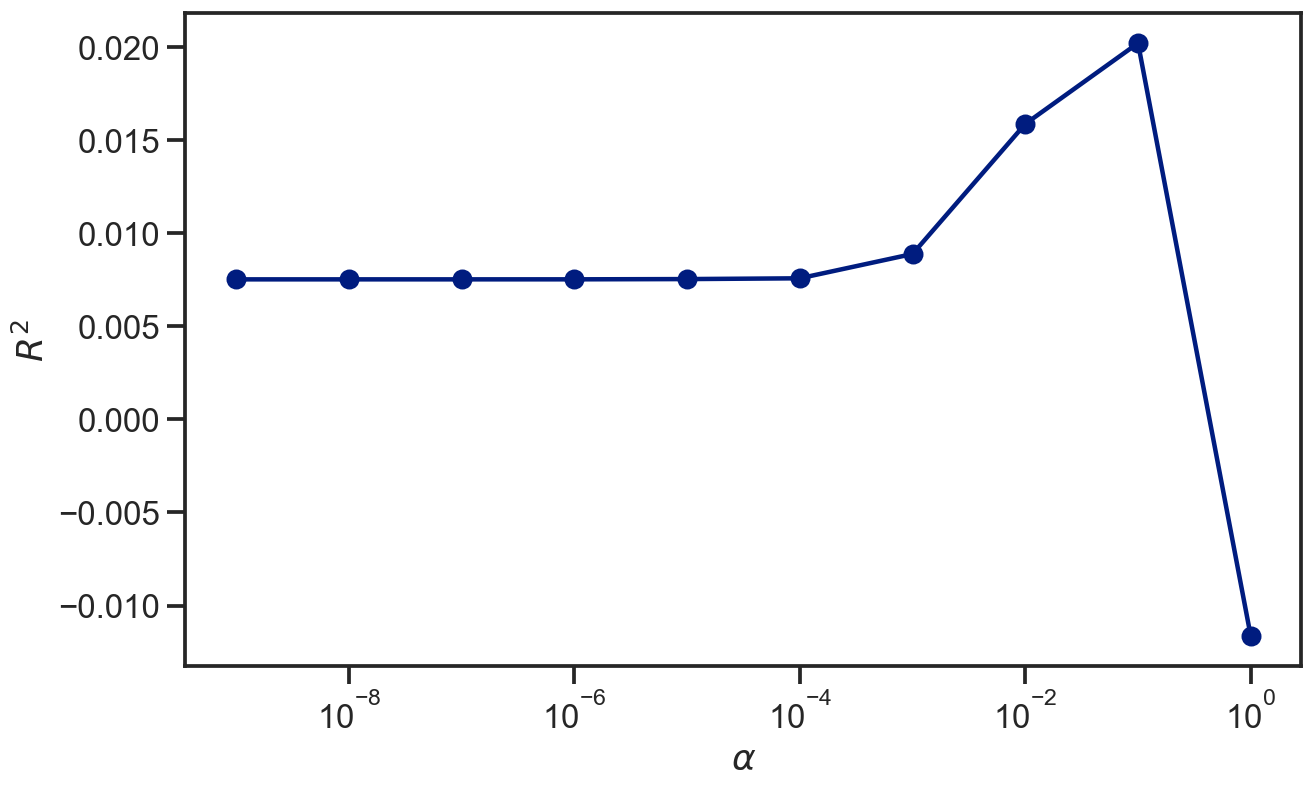

In [220]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [221]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

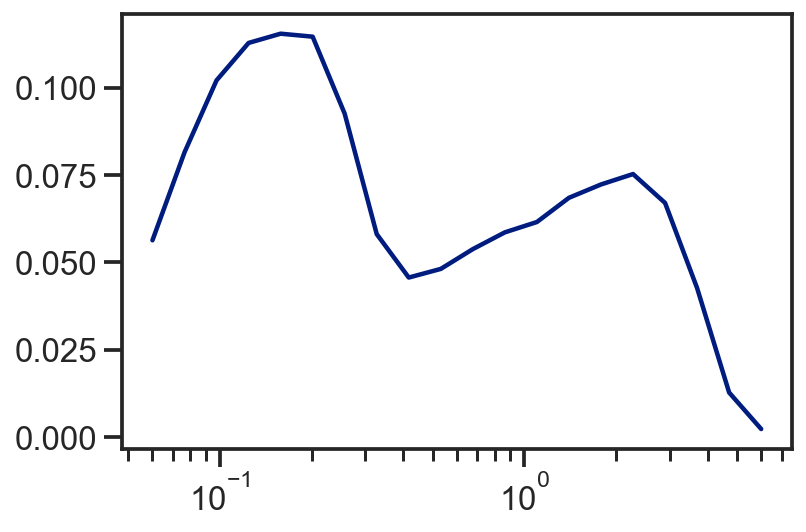

In [222]:
plt.semilogx(alphas, scores);

In [223]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.16165453055403023

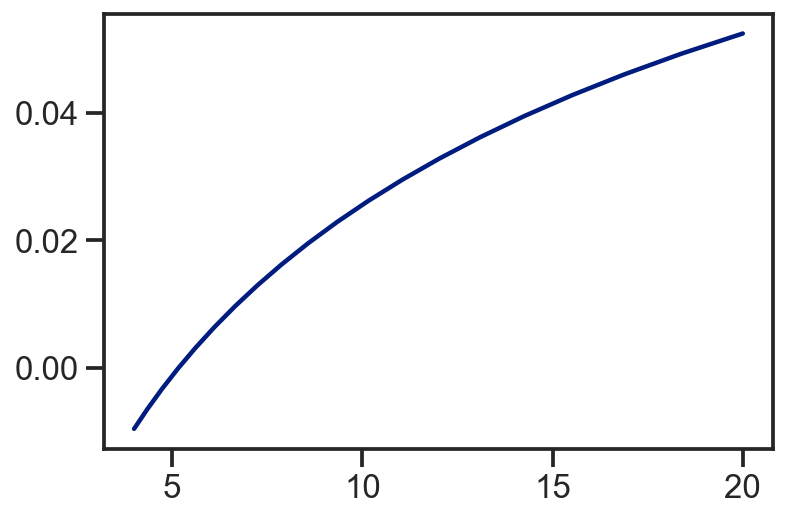

In [224]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [225]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.16165453055403023

In [226]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [227]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [228]:
col_names_dict

{0: 'Activity Score',
 1: 'Average Heart Rate (bpm)',
 2: 'Max Heart Rate (bpm)',
 3: 'Steps_x',
 4: 'Calories'}

In [229]:
df_importances.sort_values(by=1)

0         1
15   x2^2 -0.292307
1      x0 -0.227176
20   x4^2 -0.097811
16  x2 x3 -0.007389
..    ...       ...
9   x0 x3  0.000000
10  x0 x4 -0.000000
12  x1 x2  0.048546
6    x0^2  0.669796

[21 rows x 2 columns]

In [230]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [231]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [232]:
grid.best_score_, grid.best_params_

(0.06037715215533731,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 20.0})

In [233]:
y_predict = grid.predict(X)

In [234]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

0.17252718072207252

In [235]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.        , -0.33620996, -0.13053695,  0.10140047, -0.11067321,
        0.25686677,  0.51578315, -0.02933158,  0.05890495,  0.28347776,
        0.12886277, -0.1893841 ,  0.34560176, -0.03822218,  0.02378499,
       -0.38119423, -0.18332302,  0.02964047, -0.04187307, -0.0817427 ,
       -0.19962003])

In [236]:
grid.cv_results_

{'mean_fit_time': array([0.0029815 , 0.00199501, 0.00264247, 0.00199493, 0.00166249,
        0.00200621, 0.00232848, 0.00231942, 0.00266767, 0.00199644,
        0.00199437, 0.00232808, 0.00199143, 0.00231679, 0.0023241 ,
        0.00231886, 0.00200542, 0.00199572, 0.00199421, 0.00199382,
        0.00199533, 0.00232697, 0.00166241, 0.00199334, 0.00199111,
        0.00166225, 0.00199501, 0.00166257, 0.00199477, 0.00200582,
        0.00198428, 0.00199437, 0.00265924, 0.0023272 , 0.00232673,
        0.00199477, 0.0026602 , 0.00299223, 0.00232681, 0.00299184,
        0.00232681, 0.00299279, 0.00199405, 0.00199469, 0.00199493,
        0.00199437, 0.00265908, 0.00299231, 0.00232752, 0.00199429,
        0.00265972, 0.00199501, 0.00166217, 0.00299231, 0.00232665,
        0.00233857, 0.00232784, 0.00232577, 0.00233666, 0.00231544,
        0.00232665, 0.00199469, 0.00200693, 0.00231822, 0.00199485,
        0.00265988, 0.00266059, 0.00232704, 0.00232665, 0.00199533,
        0.00232649, 0.00199525,

InvalidIndexError: (slice(None, None, None), None)

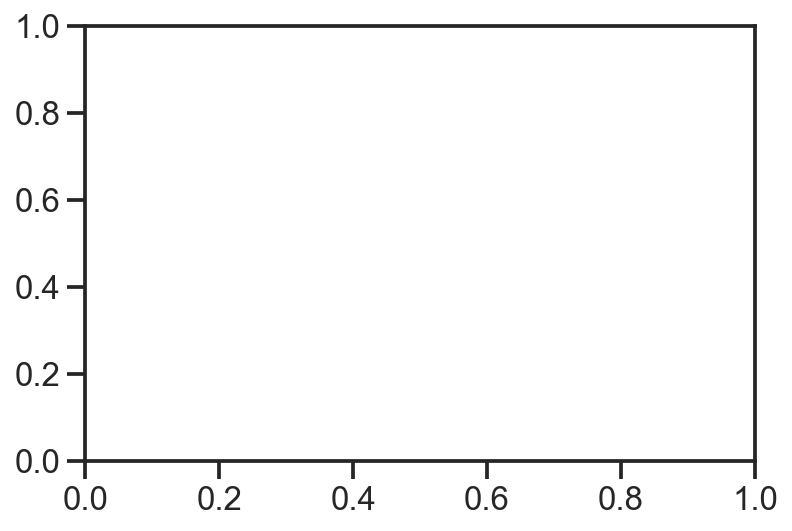

In [237]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = df4[['Distance (mi)']]
Y_data = df4['Steps_x']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');


InvalidIndexError: (slice(None, None, None), None)

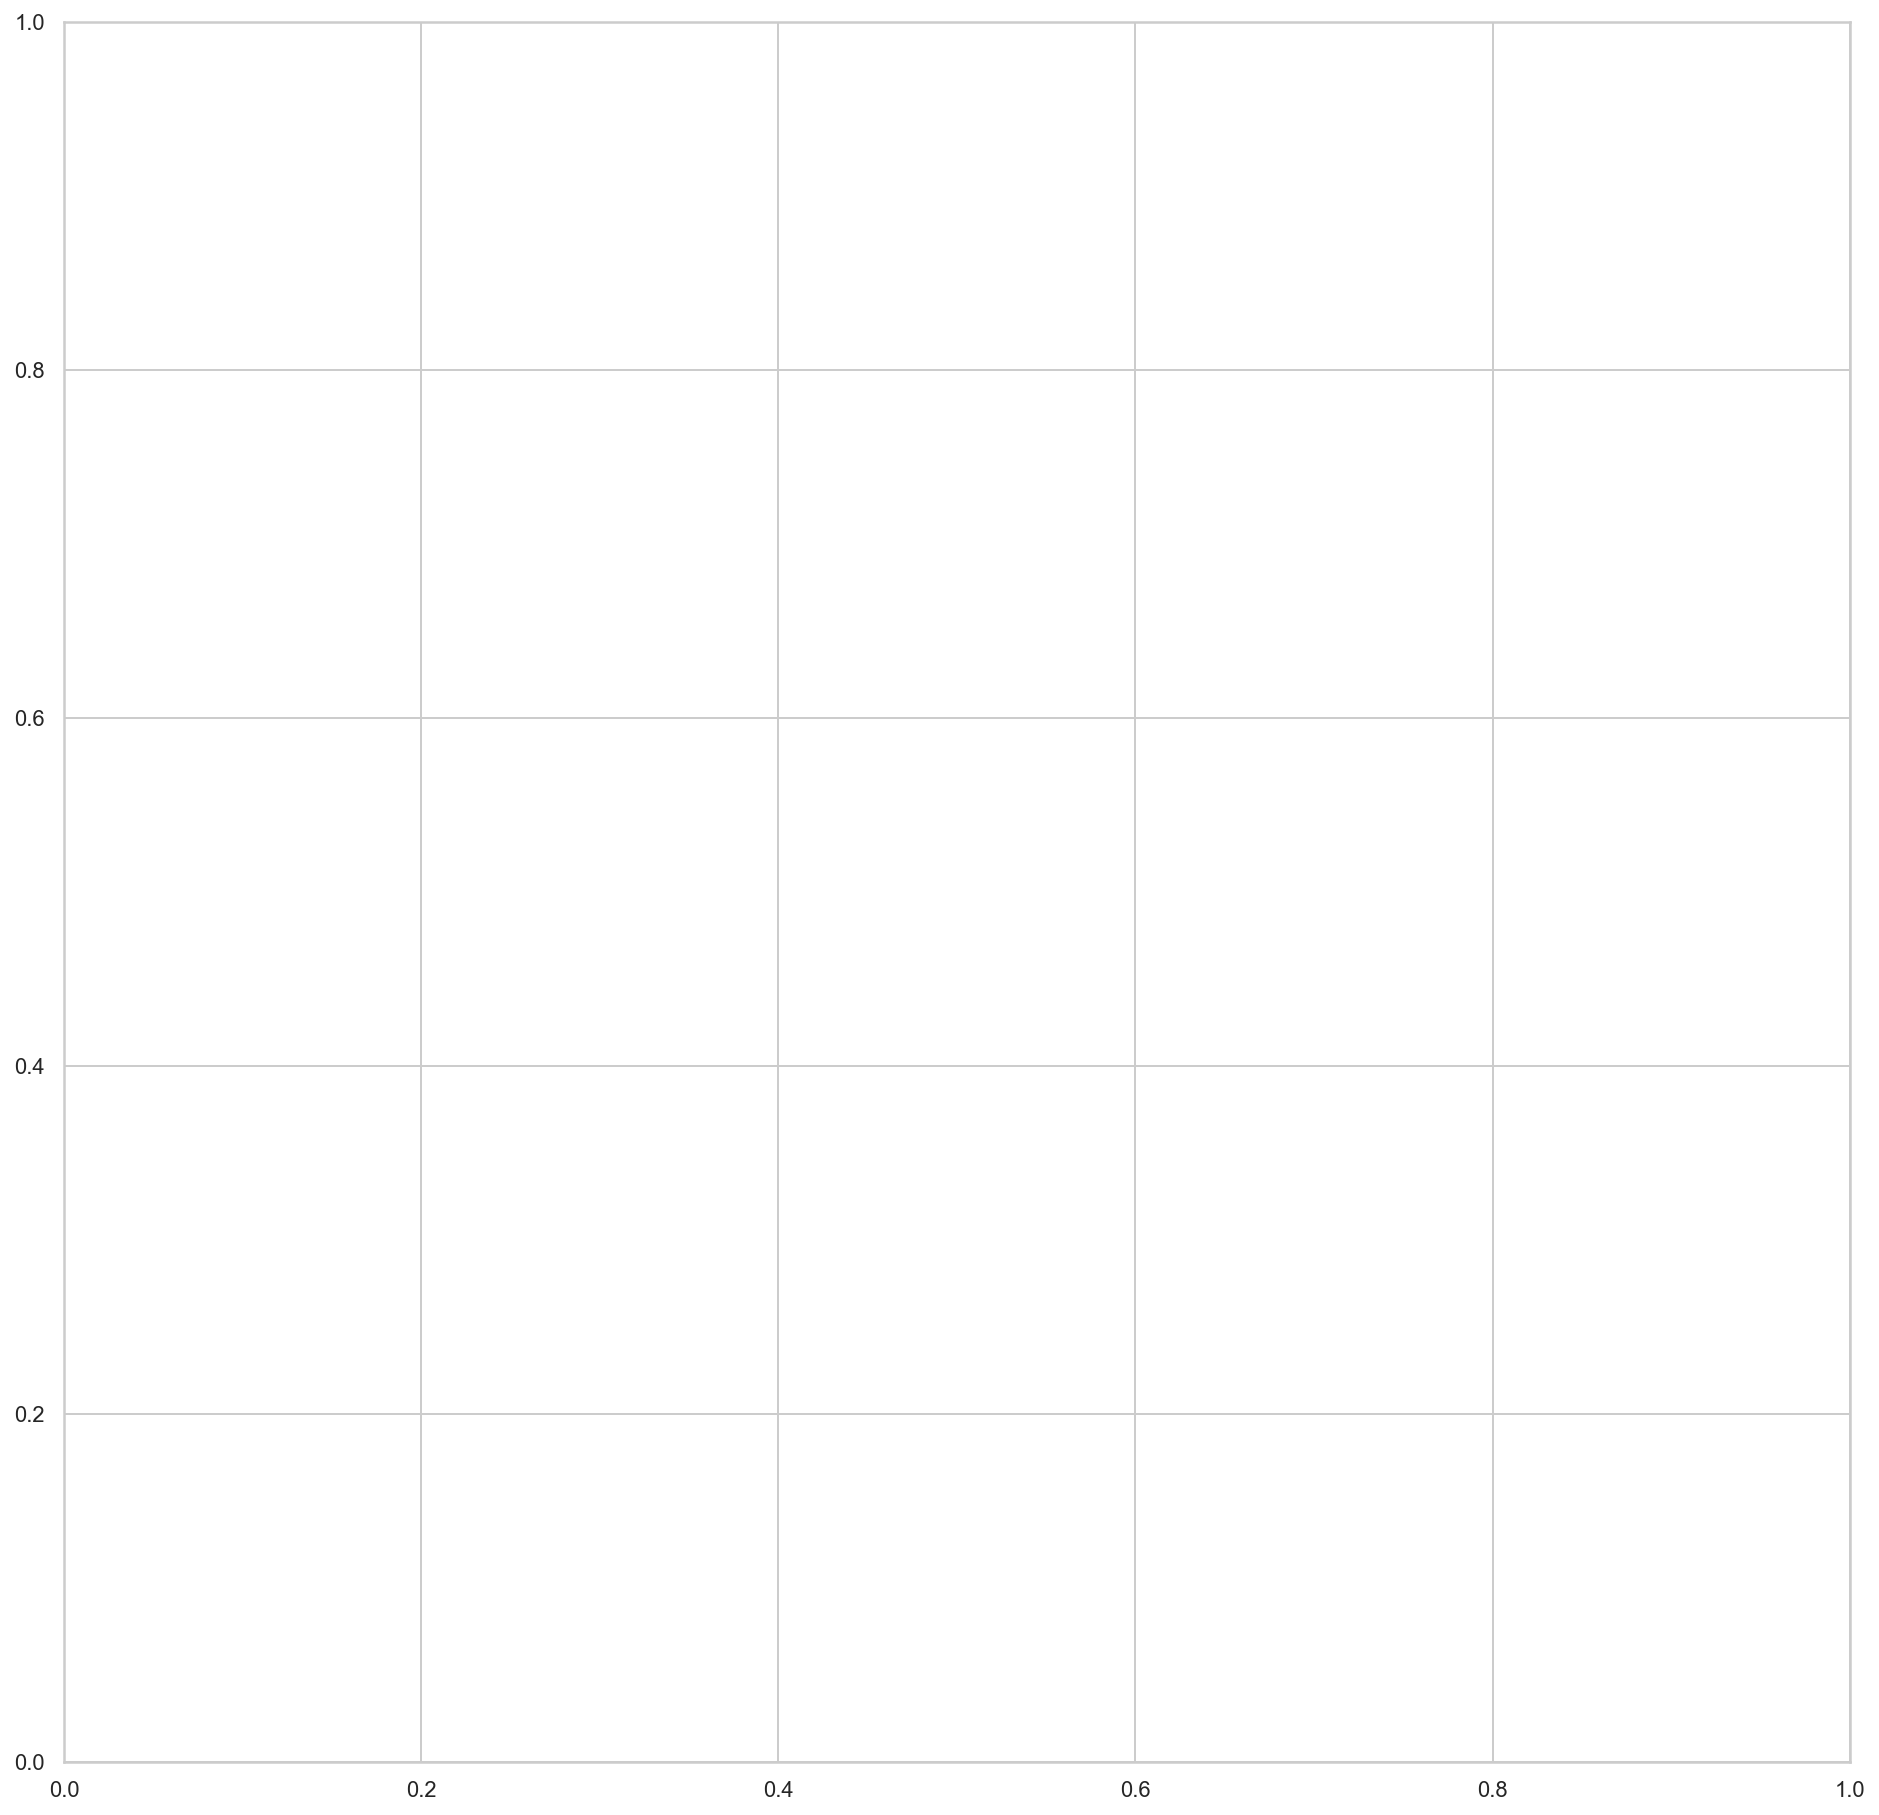

In [246]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [247]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

linear regression  ridge regression  lasso regression
count       2.100000e+01         21.000000      2.100000e+01
mean        5.243716e-07       3406.888201      4.019870e+01
std         9.869619e-07       5311.648660      1.580010e+02
min         0.000000e+00          0.000000      0.000000e+00
25%         6.665003e-11          0.190653      3.917116e-16
50%         9.431007e-09        478.016385      8.923127e-10
75%         5.382913e-07       6134.001437      5.516256e-04
max         2.970983e-06      20458.294786      7.202222e+02

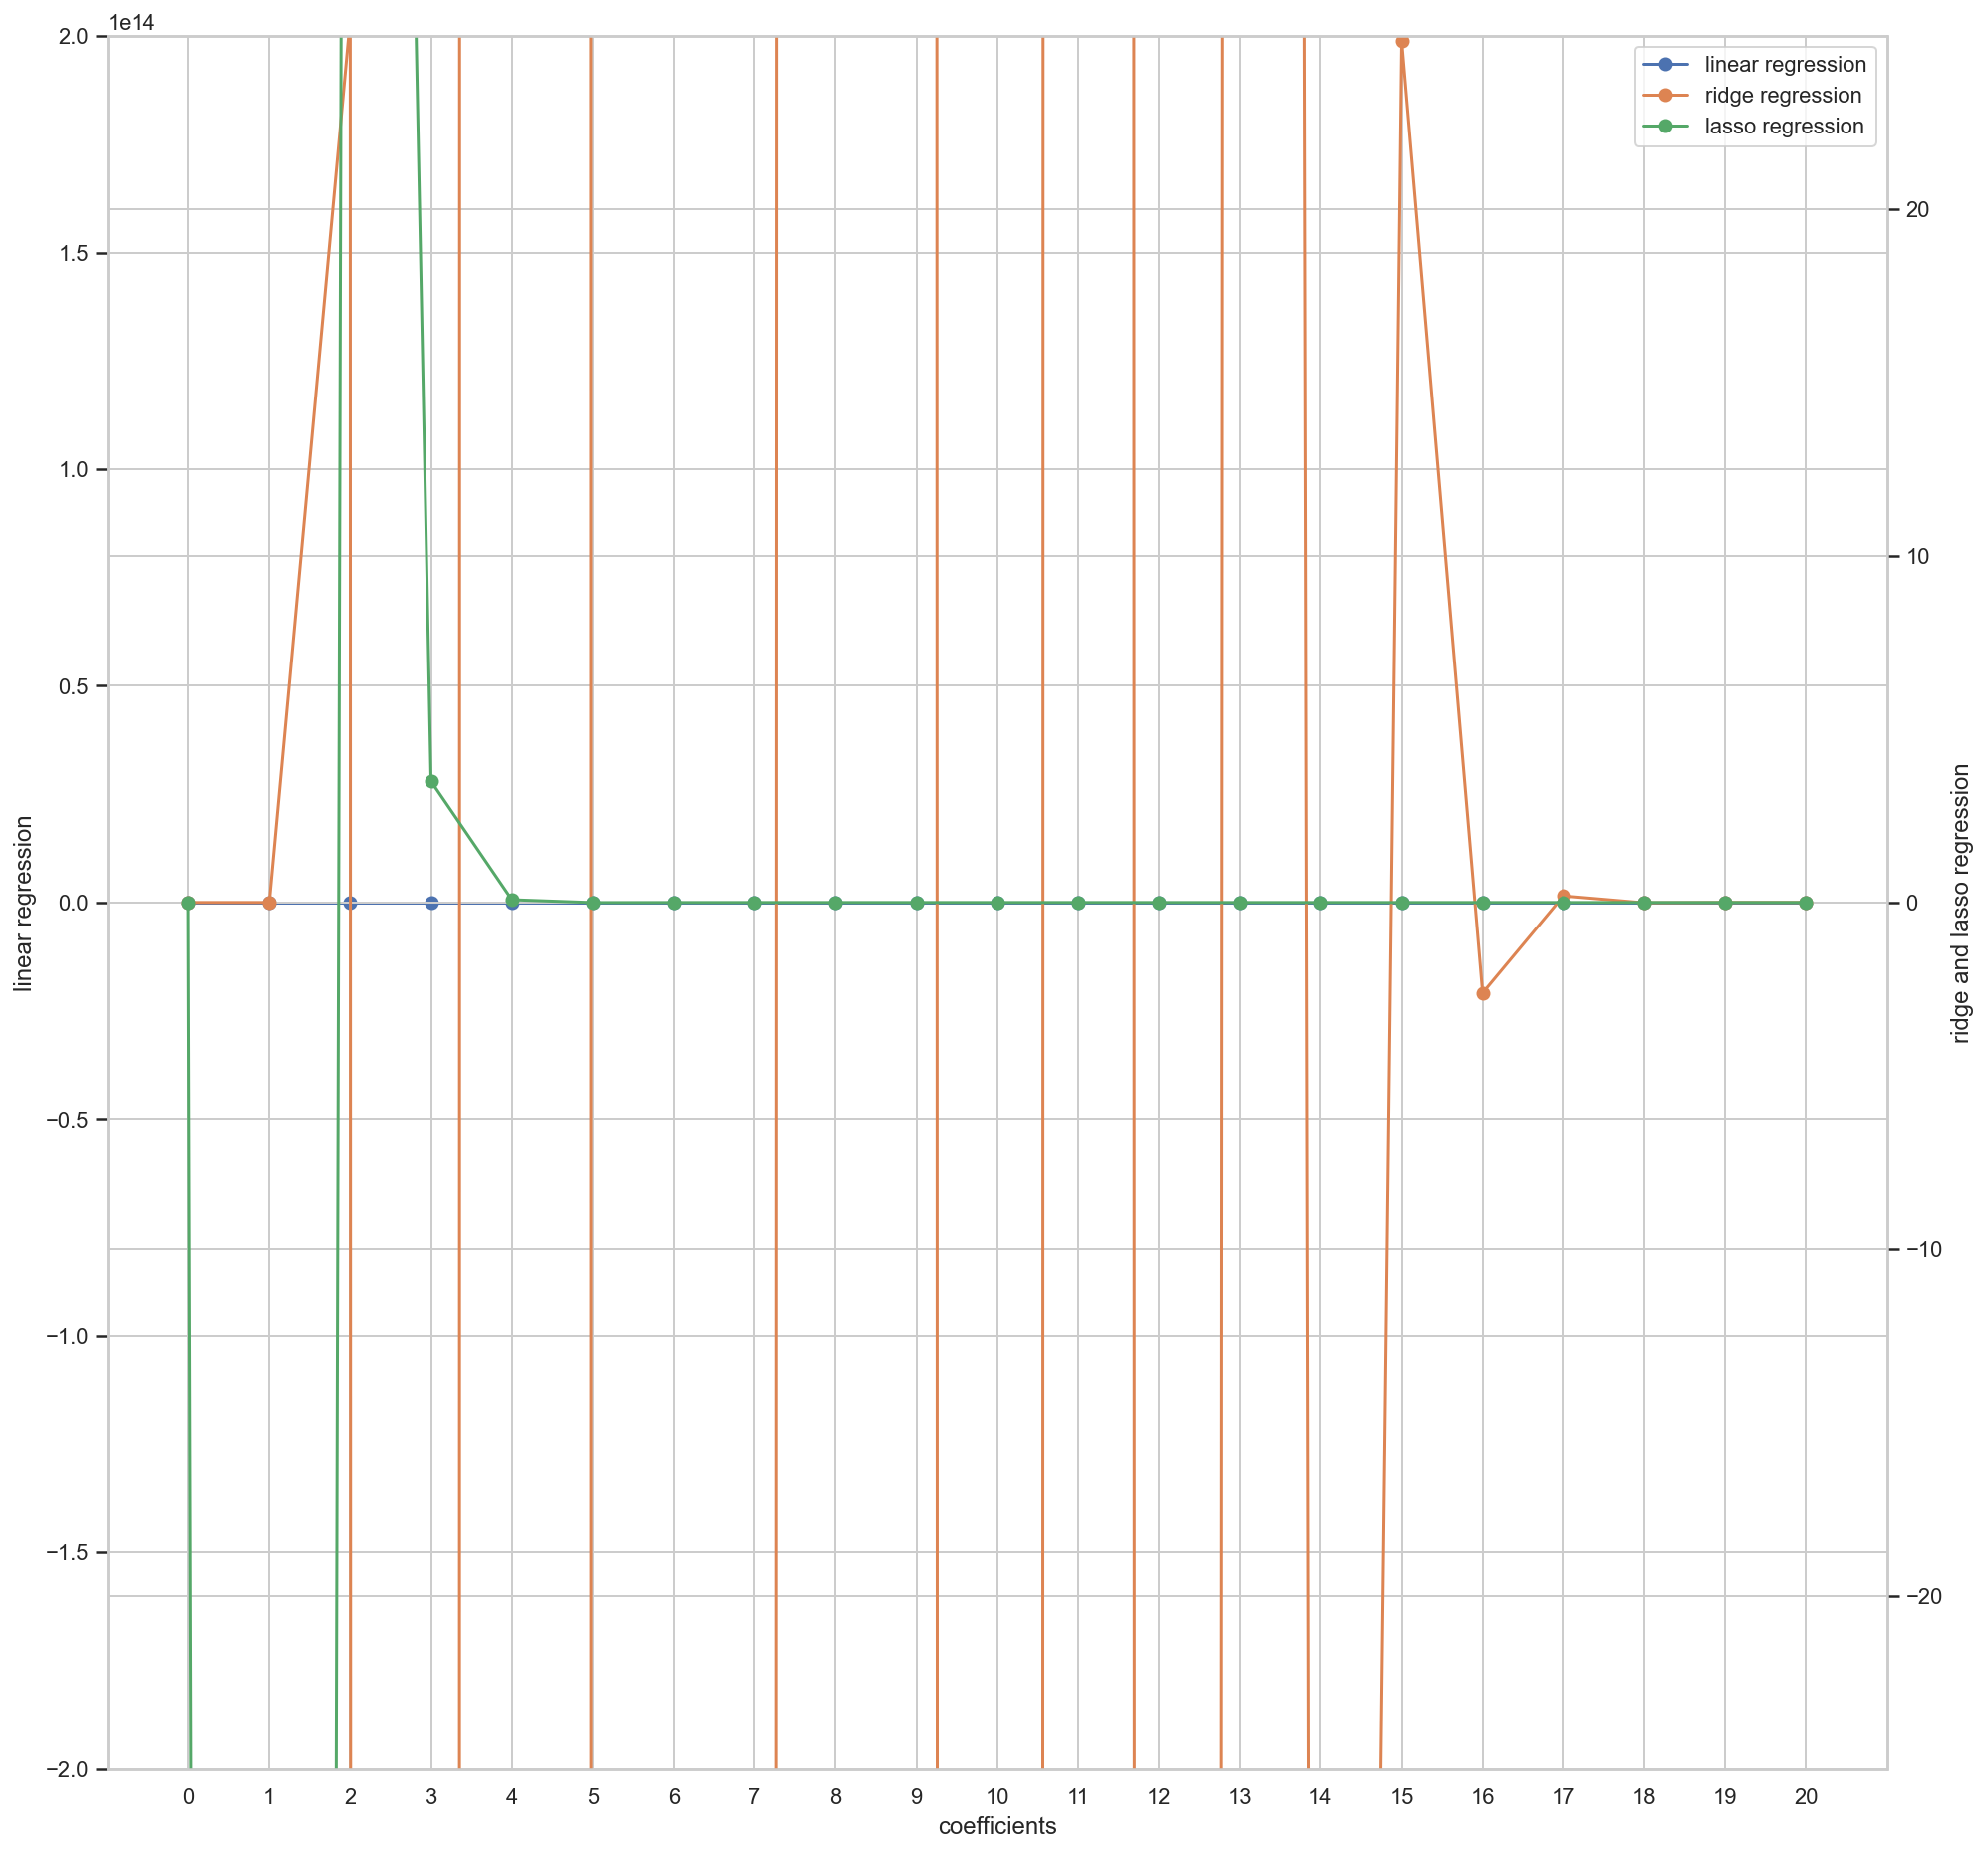

In [248]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25
            )

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

In [249]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [250]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

2.9128263089060917


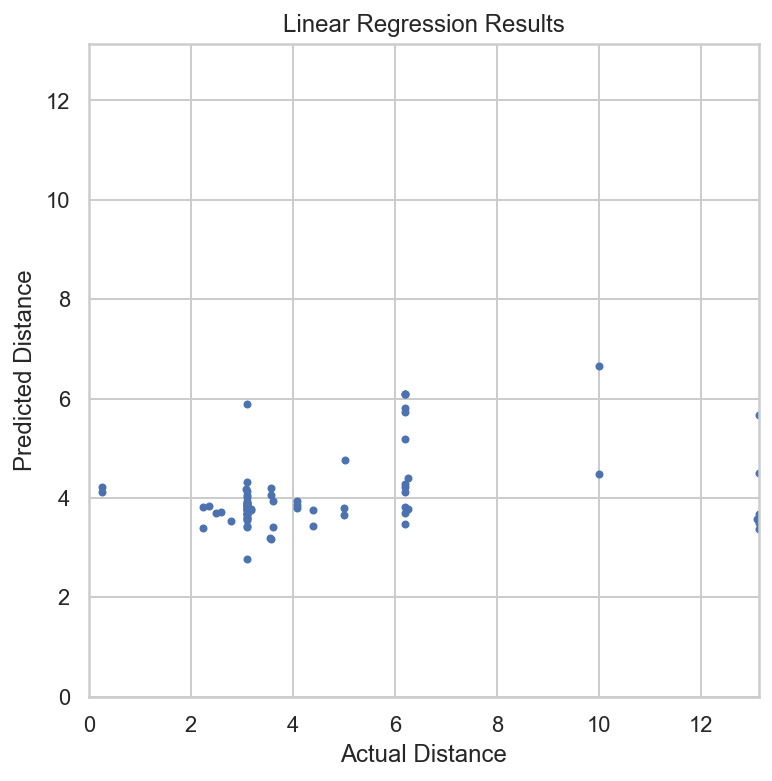

In [251]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [252]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

2.9128263089060917


In [253]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

80.0 2.912779122580463


In [254]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

0.0005 2.9128235385282117


In [255]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.2 2.9128256544585356


In [256]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

RMSE
Linear      2.912826
Ridge       2.912779
Lasso       2.912824
ElasticNet  2.912826

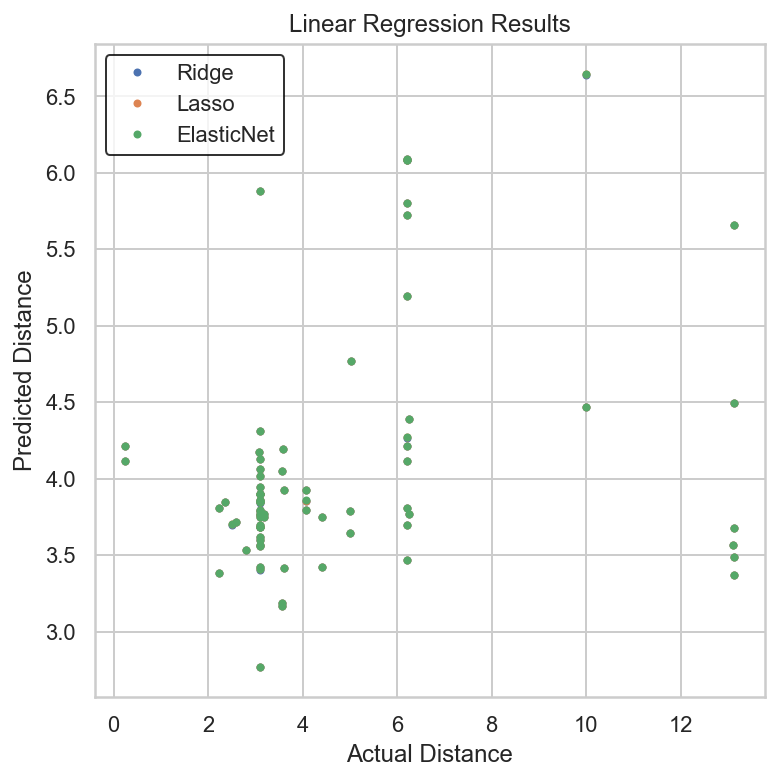

In [257]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       title='Linear Regression Results');

In [258]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

RMSE      RMSE-SGD
Linear      2.912826  2.178318e+16
Ridge       2.912779  8.505974e+15
Lasso       2.912824  1.651512e+16
ElasticNet  2.912826  5.427195e+16

In [259]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

RMSE      RMSE-SGD  RMSE-SGD-learningrate
Linear      2.912826  2.178318e+16               3.286953
Ridge       2.912779  8.505974e+15               3.341515
Lasso       2.912824  1.651512e+16               3.353831
ElasticNet  2.912826  5.427195e+16               3.259659

In [260]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

RMSE      RMSE-SGD  RMSE-SGD-learningrate  RMSE-SGD-scaled
Linear      2.912826  2.178318e+16               3.286953         3.001436
Ridge       2.912779  8.505974e+15               3.341515         3.061201
Lasso       2.912824  1.651512e+16               3.353831         3.000483
ElasticNet  2.912826  5.427195e+16               3.259659         2.999158

In [261]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

RMSE      RMSE-SGD  RMSE-SGD-learningrate  RMSE-SGD-scaled
Linear      2.912826  2.178318e+16               3.286953         2.995769
Ridge       2.912779  8.505974e+15               3.341515         3.060930
Lasso       2.912824  1.651512e+16               3.353831         2.998163
ElasticNet  2.912826  5.427195e+16               3.259659         2.999533

In [262]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = df4.columns[:-1]
corr_values = df4[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

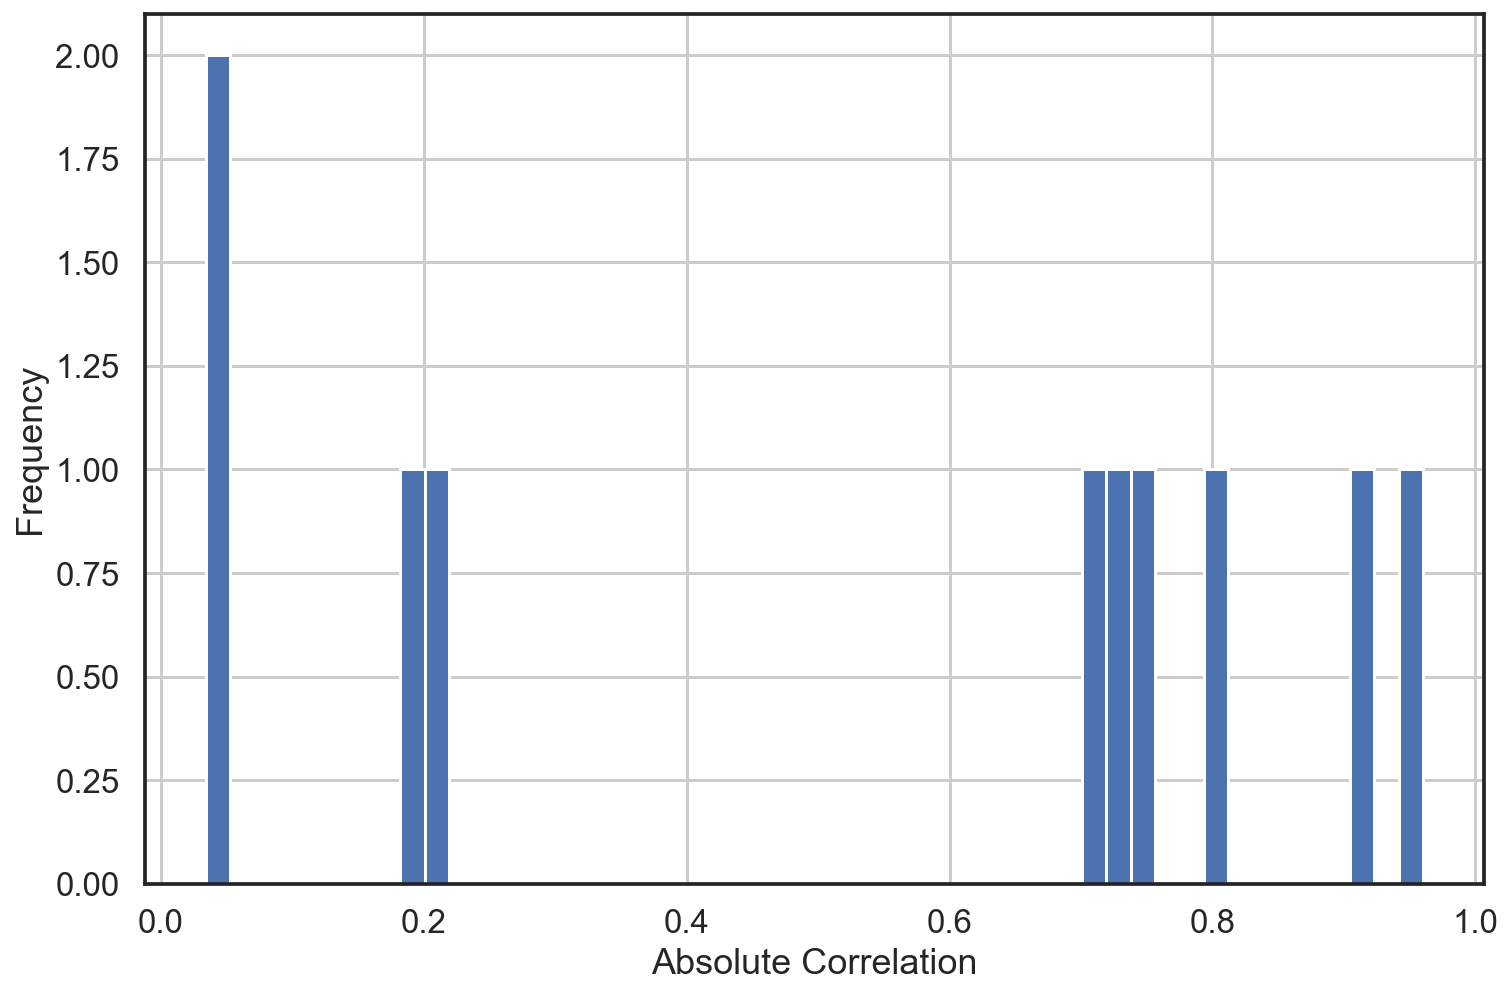

In [263]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [264]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

feature1                  feature2  correlation  \
6            Activity Score                   Steps_x     0.960147   
7  Average Heart Rate (bpm)      Max Heart Rate (bpm)     0.921326   
4            Activity Score  Average Heart Rate (bpm)     0.809883   

   abs_correlation  
6         0.960147  
7         0.921326  
4         0.809883

In [265]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df4['Distance (mi)'] = le.fit_transform(df4['Distance (mi)'])
df4['Distance (mi)'].sample(5)
### END SOLUTION

108    71
5      32
103    18
61     18
43     18
Name: Distance (mi), dtype: int64

In [266]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = df4.columns[:-1]
corr_values = df4[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

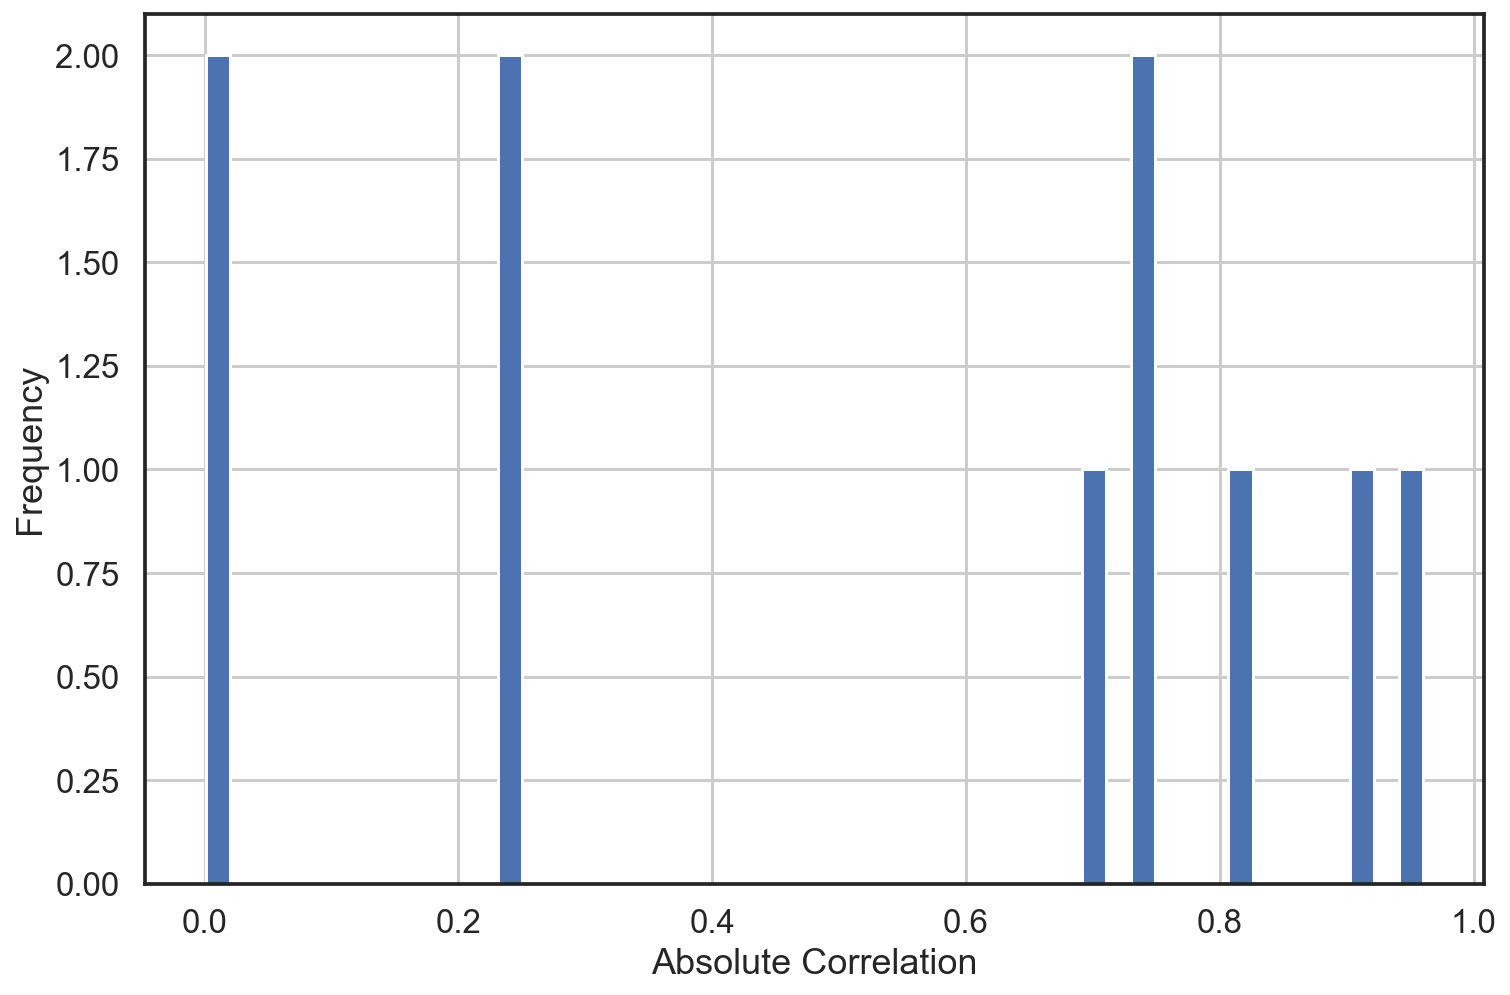

In [267]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [268]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

feature1                  feature2  correlation  \
6            Activity Score                   Steps_x     0.960147   
7  Average Heart Rate (bpm)      Max Heart Rate (bpm)     0.921326   
4            Activity Score  Average Heart Rate (bpm)     0.809883   

   abs_correlation  
6         0.960147  
7         0.921326  
4         0.809883

In [269]:
df2.head(2)

Workout_Date  Distance (mi) Session Subtype  Activity Score  \
0   2022-05-31           4.08           OTHER           24.85   
1   2022-05-31           4.08         RUNNING           92.57   

   Average Heart Rate (bpm)  Max Heart Rate (bpm)  Steps_x  Calories  \
0                      94.0                 117.0   1645.0     253.0   
1                     146.0                 164.0   7446.0     807.0   

   Active Time (total min) day_of_week_start  
0                    44.00           Tuesday  
1                    48.67           Tuesday

# Machine Learning Attempt 2

In [270]:
#data.target is our target data for machine learning - we will need this
dfml = pd.DataFrame(df2)
dfml['target'] = dfml['Distance (mi)']
dfml.head()

Workout_Date  Distance (mi) Session Subtype  Activity Score  \
0   2022-05-31        4.08000           OTHER           24.85   
1   2022-05-31        4.08000         RUNNING           92.57   
2   2022-05-30        3.10044         WALKING           10.97   
3   2022-05-30        3.10044         RUNNING           65.65   
5   2022-05-28        3.10717           OTHER           16.70   

   Average Heart Rate (bpm)  Max Heart Rate (bpm)  Steps_x  Calories  \
0                      94.0                 117.0   1645.0     253.0   
1                     146.0                 164.0   7446.0     807.0   
2                     114.0                 126.0    822.0     117.0   
3                     155.0                 172.0   5246.0     630.0   
5                      96.0                 120.0   1174.0     177.0   

   Active Time (total min) day_of_week_start   target  
0                    44.00           Tuesday  4.08000  
1                    48.67           Tuesday  4.08000  
2                    11.97            Monday  3.10044  
3                    34.79            Monday  3.10044  
5                    34.00          Saturday  3.10717

In [271]:
#df.shape will give us the shape of the dataframe (200 rows and 11 columns)
dfml.shape

(254, 11)

## Linear Regression Model

### Load Packages from SKLearn

In [272]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Two fold - one fold for train and one fold for testing the#
#ML - how to know which is for train which is for testing

### Linear Regression

In [273]:
#check for null values
dfml.isnull().sum()

Workout_Date               0
Distance (mi)              0
Session Subtype            0
Activity Score             0
                          ..
Calories                   0
Active Time (total min)    0
day_of_week_start          0
target                     0
Length: 11, dtype: int64

In [274]:
#we will pull just the "alcohol" values so it is in the form of an array
X = dfml.loc[:, ['Distance (mi)']].values

In [275]:
# verify the shape of the array (rows by a single column)
X.shape

(254, 1)

In [276]:
#repeat the same process to get our y values
y = dfml.loc[:, 'Calories'].values

In [277]:
#verify the shape of the y array
y.shape

(254,)

In [278]:
#load the linear regression value
reg = LinearRegression(fit_intercept=True)

In [279]:
#set our fit with our arrays
reg.fit(X,y)

LinearRegression()

In [280]:
reg.predict(X[0].reshape(-1,1))

array([401.41468179])

In [281]:
reg.predict(X[0:2])

array([401.41468179, 401.41468179])

In [282]:
score = reg.score(X, y)
print(score)

0.05133815437496558


In [283]:
reg.coef_

array([30.01818673])

In [284]:
reg.intercept_

278.94047992082255

In [285]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

formula: y = 30.02x + 278.94


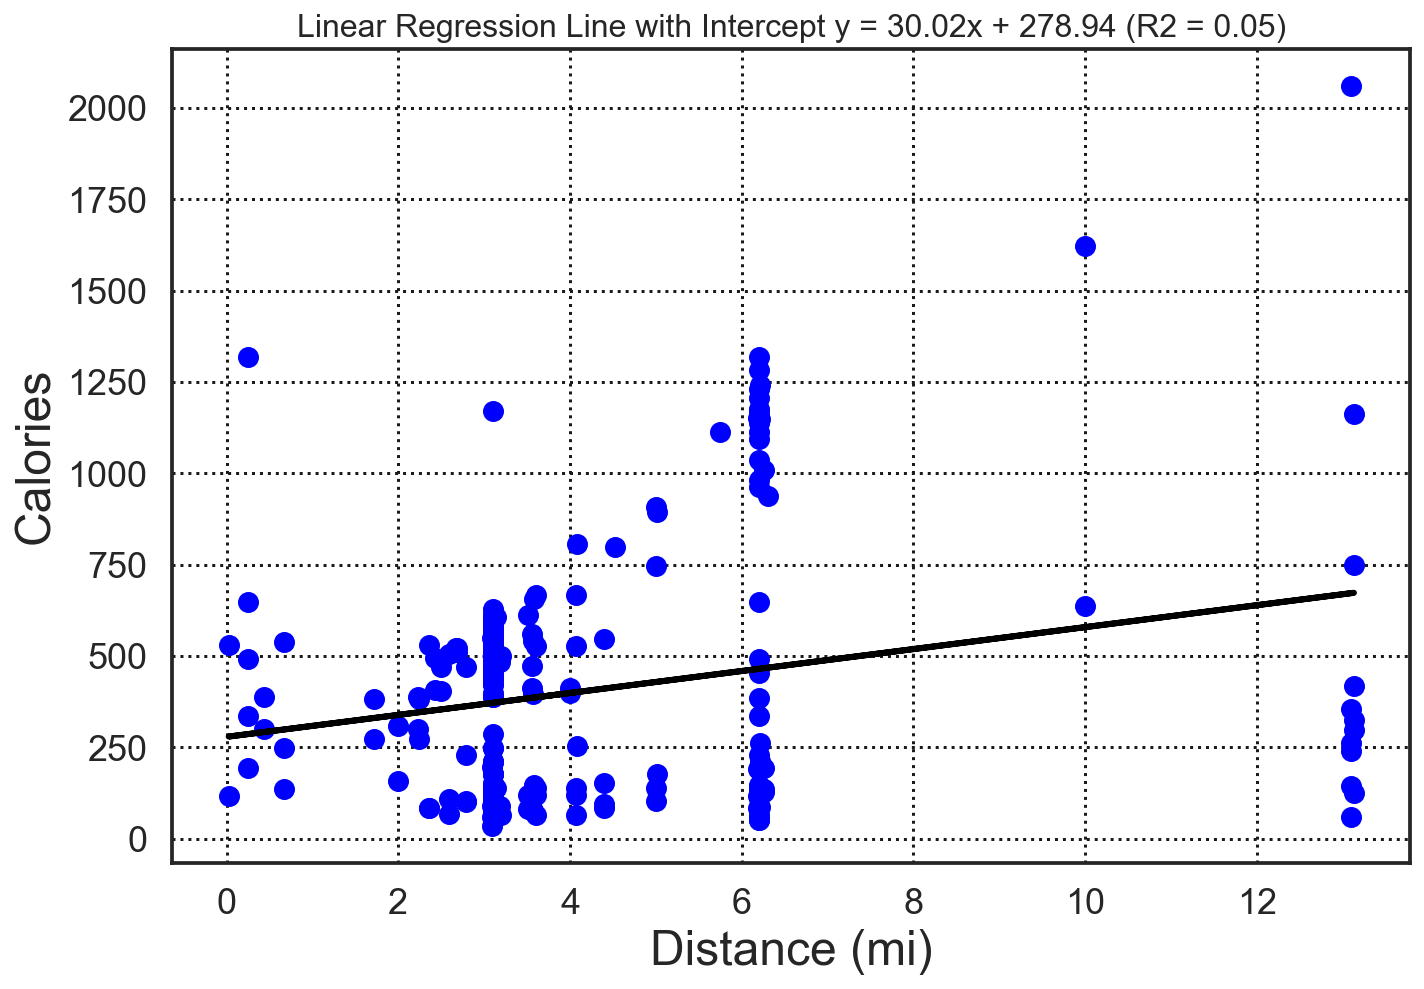

In [286]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='blue');
ax.plot(X, reg.predict(X), color='black',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Distance (mi)', fontsize = 24)
ax.set_ylabel('Calories', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

### Plotting with and without intercept

In [287]:
# Model with Intercept (like earlier in notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

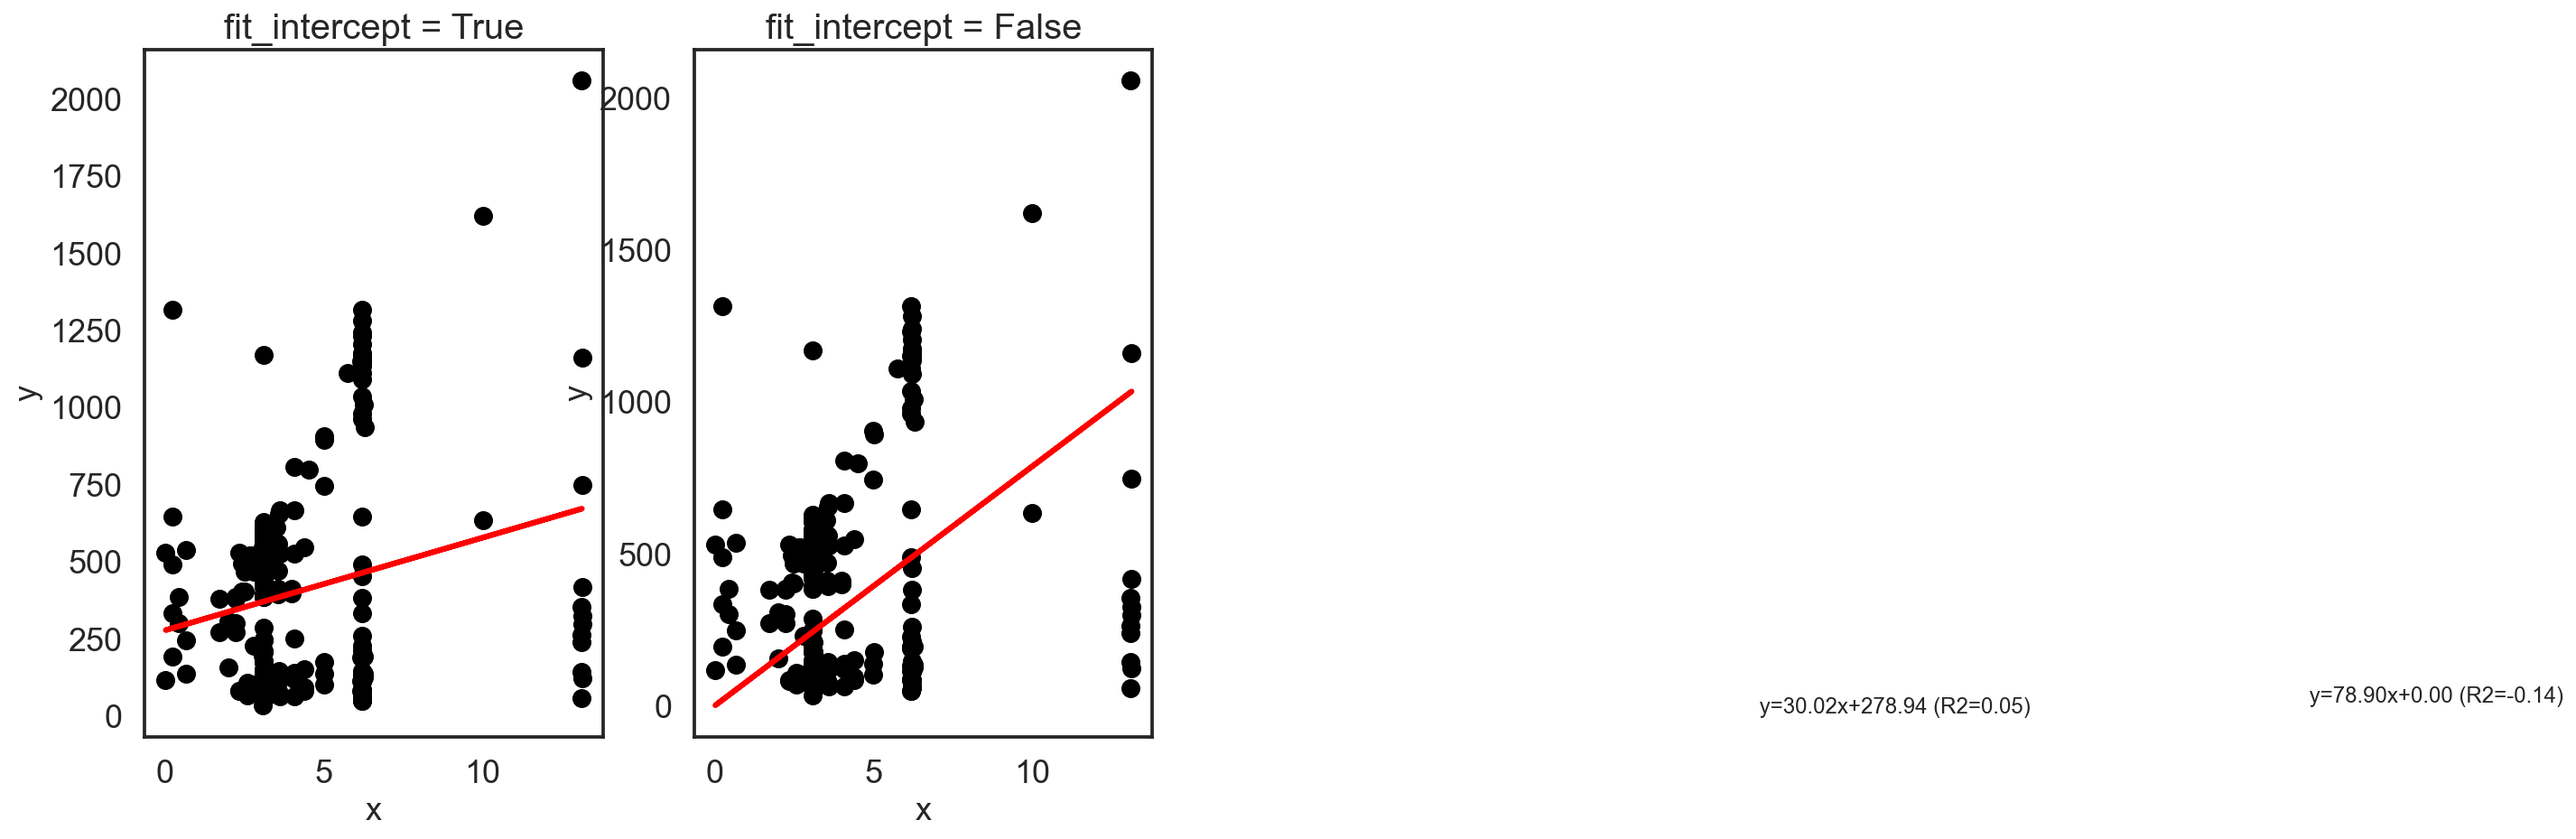

In [288]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    #ax[index].set_xlim(left = 0, right = 150)
   # ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()

### Train Test Split

In [289]:
X_train, X_test, y_train, y_test = train_test_split(dfml[['Calories']], dfml['target'], random_state=0)

In [290]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression()

In [291]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

0.026417939942935953


## Logistic Regression

### Load Packages

In [292]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Regression

In [293]:
scaler = StandardScaler()


from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
classifier = LogisticRegression()
classifier.fit(X, y_transformed)

# Fit on training set only.
scaler.fit(X)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X)
X_test = scaler.transform(X)

In [294]:
clf = LogisticRegression()

In [295]:
#I need to set my values to run log reg
clf.fit(X, y_transformed)

LogisticRegression()

In [296]:
X_test[0].reshape(1,-1)

array([[-0.03473559]])

In [297]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0])
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

prediction 83
probability [[2.80741030e-03 6.97254663e-05 6.97254663e-05 6.95777635e-05
  1.23724702e-04 2.75579580e-03 8.81221983e-04 2.40153011e-03
  2.46848729e-03 1.11884101e-02 2.75579580e-03 3.18327021e-03
  6.95234531e-05 3.36950341e-03 1.37704567e-02 1.42486541e-03
  6.95234531e-05 6.92954988e-05 6.97254663e-05 1.15798541e-02
  1.76218998e-02 7.10805080e-03 2.35692910e-03 2.75579580e-03
  4.21001876e-03 2.73693060e-03 1.20710660e-02 4.21001876e-03
  2.38937032e-04 1.67704358e-02 6.08034876e-04 7.09940636e-03
  2.75579580e-03 7.07145431e-05 5.99438423e-02 3.72964573e-03
  3.77646552e-07 2.75579580e-03 5.82909389e-04 2.75579580e-03
  6.97254663e-05 2.73715667e-03 7.57821771e-03 6.87267517e-03
  1.46351799e-03 2.03968872e-03 6.94215522e-05 3.92420694e-07
  1.43792430e-03 6.95825407e-05 2.35692910e-03 1.16960740e-02
  7.06148849e-03 1.44351551e-03 2.76168214e-03 7.07145431e-05
  6.97254663e-05 6.95055612e-05 6.62539013e-05 5.69726815e-03
  2.80741030e-03 2.75579580e-03 2.74511859e-

In [298]:
clf = LogisticRegression()

In [299]:
clf.fit(X_train, y_transformed)

LogisticRegression()

In [300]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0])
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

prediction 20
probability [[0.00419896 0.00403614 0.00403614 0.00403551 0.01084145 0.00420139
  0.0127756  0.00421866 0.00421532 0.00799534 0.00420139 0.00848967
  0.00403528 0.00847471 0.0078807  0.01290229 0.00403528 0.0040343
  0.00403614 0.01212323 0.01587615 0.00821164 0.00855545 0.00420139
  0.00413928 0.00420229 0.01208873 0.00413928 0.0042635  0.0117912
  0.0085416  0.00821216 0.00420139 0.0040403  0.01362153 0.01280065
  0.00145657 0.00420139 0.00853265 0.00420139 0.00403614 0.00420228
  0.01243767 0.00822599 0.0086104  0.00857873 0.00403484 0.00146747
  0.00427038 0.00403553 0.00855545 0.00392304 0.00821446 0.00861104
  0.00420112 0.0040403  0.00403614 0.0040352  0.00402067 0.00830183
  0.00419896 0.00420139 0.0042019  0.00420139 0.00403292 0.00403614
  0.00413928 0.00146747 0.00686472 0.00420139 0.00430436 0.0040343
  0.00146747 0.00699043 0.00420139 0.00145657 0.00609166 0.00392304
  0.00145657 0.00830183 0.00146747 0.00699043 0.00403484 0.01266809
  0.00426908 0.00420139 0

In [301]:
log_df = pd.DataFrame()
log_df.loc[:, 'Distance (mi)'] = X_test.reshape(-1)
log_df.loc[:, 'Calories'] = y_transformed.values
log_df['logistic_preds'] = pd.DataFrame(clf.predict_proba(X_test))[1]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

## Confusion Matrix

In [302]:
dfml.head(1)
dfml2 = dfml[['Distance (mi)', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Active Time (total min)', 'target']]

In [303]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

from sklearn.datasets import load_wine
X_train, X_test, y_train, y_test = train_test_split(
    dfml2, dfml2.target, random_state=11)  # random_state for reproducibility

In [304]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
                             

In [305]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
classifier = LogisticRegression()
classifier.fit(X, y_transformed)

LogisticRegression()

In [306]:
clf.fit(X, y_transformed)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [307]:
clf.predict(X[0:10])

array([15, 15, 20, 20, 20, 20, 20, 20, 20, 15], dtype=int64)

In [308]:
score = clf.score(X, y_transformed)
print(score)

0.04330708661417323


In [309]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X, y_transformed)

    score = clf.score(X, y_transformed)
    accuracy.append(score)

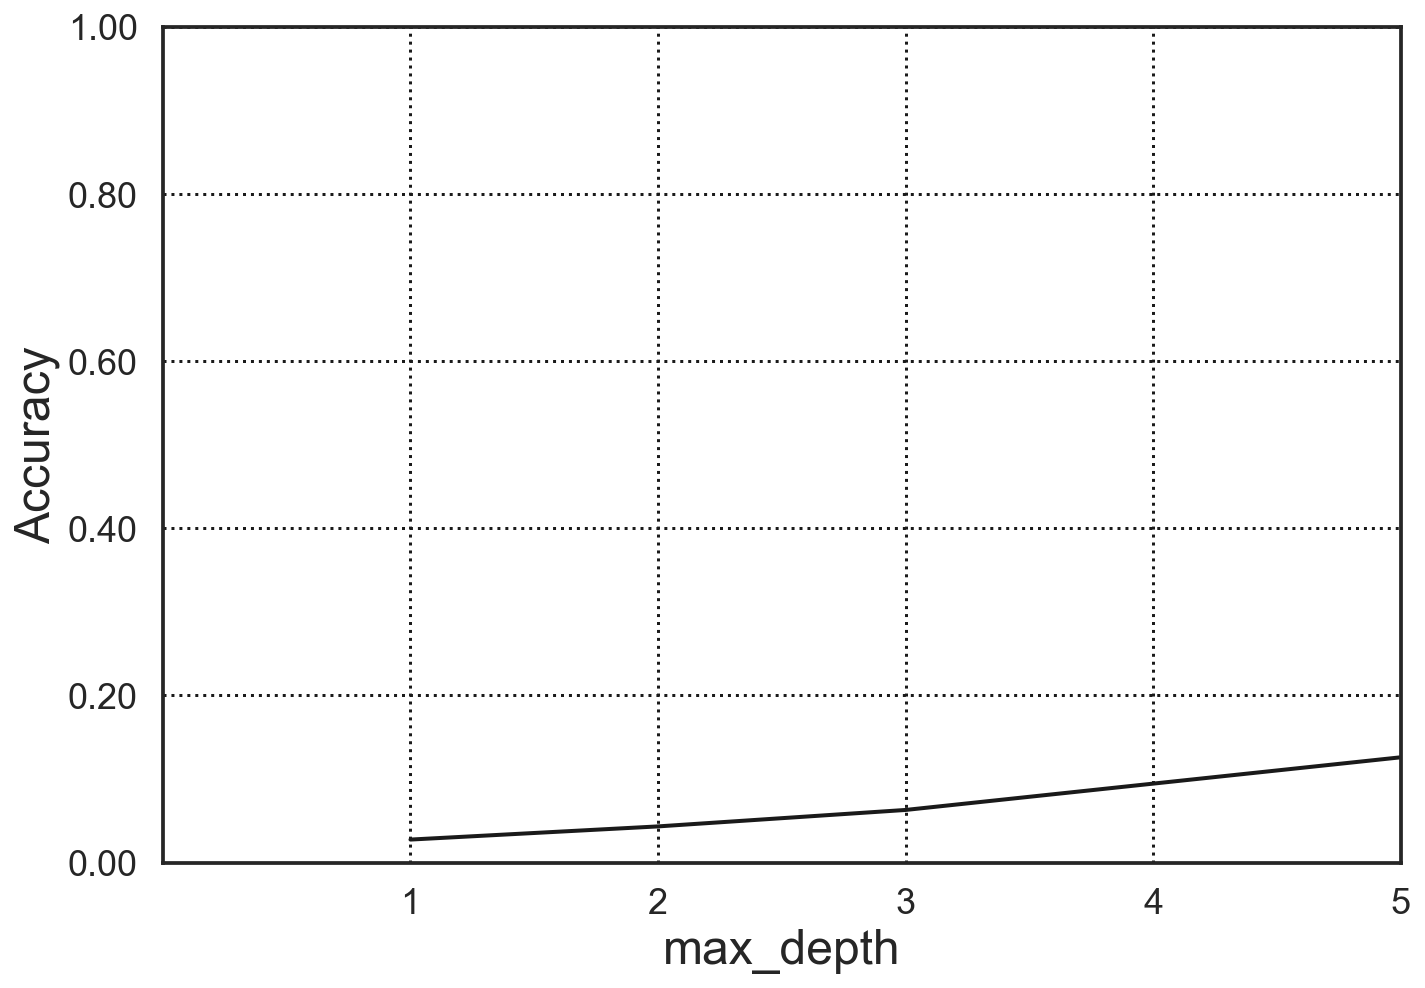

In [310]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([0, 5])
ax.set_ylim([0, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

In [311]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [312]:
clf.fit(X, y_transformed)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [313]:
clf.predict(X.iloc[0].values.reshape(1, -1))

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [314]:
clf.predict(X[0:2])

array([15, 15], dtype=int64)

In [315]:
score = clf.score(X, y_transformed)
print(score)

0.04330708661417323


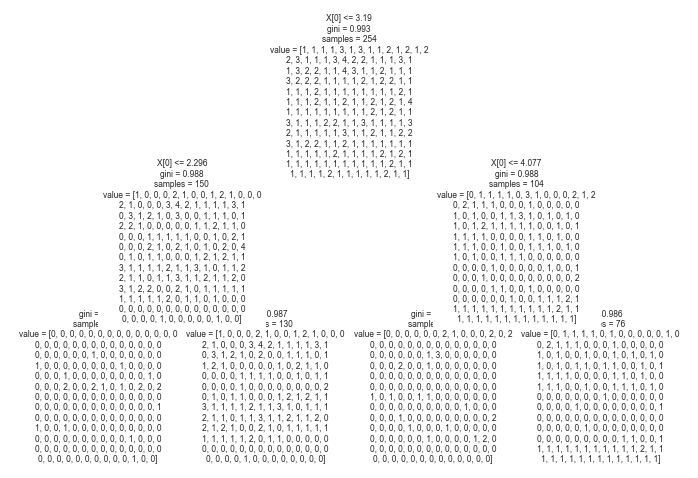

In [316]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

tree.plot_tree(clf);